# Influence Spacer 3

In [1]:
## Imports:

import sys
import glob

import numpy as np
from numpy import exp
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
from matplotlib.image import NonUniformImage
from matplotlib.patches import Rectangle
%matplotlib inline

import pandas as pd
import math

from scipy import optimize
from scipy.optimize import curve_fit
from scipy.optimize import minimize
from scipy import stats
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from scipy.interpolate import spline
from scipy.interpolate import make_interp_spline, BSpline
from scipy.interpolate import griddata
from scipy.stats import chisquare
from scipy.stats import power_divergence

## General Definitions and Parameters

In [2]:
## General function definitions:

def f_polar_R(cartesian_x, cartesian_y):
    return np.sqrt(cartesian_x * cartesian_x + cartesian_y * cartesian_y)

def f_polar_Phi(cartesian_x, cartesian_y):
    return np.arctan2(cartesian_y, cartesian_x)

def f_distance(x_a, y_a, x_b, y_b):
    return np.sqrt((x_b - x_a)**2 + (y_b - y_a)**2)


def flatten_tuples(tup):
    return np.array([element for tupl in tup for element in tupl])

def sum_tuple_subentries(tup):
    return [np.sum(tupl) for tupl in tup]

def nth_tuple_subentries(tup, n):
    return [tupl[n] for tupl in tup]


def from_np_array(array_string):
    array_string = ','.join(array_string.replace('[ ', '[').split())
    return np.array(ast.literal_eval(array_string))

In [3]:
## PMT properties
R8520_body_width = 25.7
R8520_body_cornerradius = 2.
R8520_photocathode_width = 20.5
R8520_photocathode_cornerradius = 1.
PMT_ID = np.array([1,2,3,4,5,6,7])
PMT_position_x = np.array([-14.,-28,-14.,14.,28.,14.,0.])      # x-position PMTs in mm in cartesian coordinates
PMT_position_y = np.array([-28.,0.,28.,28.,0.,-28.,0.])        # y-position PMTs in mm in cartesian coordinates
PMT_position_R = f_polar_R(PMT_position_x, PMT_position_y)     # radial position PMTs in mm in polar coordinates
PMT_position_Phi = f_polar_Phi(PMT_position_x, PMT_position_y) # angular position PMTs in rad in polar coordinates
PMT_positions = pd.DataFrame(index=PMT_ID, data={'PMT_ID': PMT_ID, 'PMT_position_x': PMT_position_x, 'PMT_position_y': PMT_position_y, 'PMT_position_R': PMT_position_R, 'PMT_position_Phi': PMT_position_Phi})

## Influence Spacer 3 Height

In [4]:
!ls /media/ab602/TOSHIBA\ EXT/Thesis/Simulation_Outputs/Position_Reconstruction_LRF/optPhot_S2_3.0e+07_pmtGap*_RPTFE0.95_LXeAbs100_Tmesh0.89770509_writeEmptyFalse_ReconstructedPosition_Deviations_Iterative_Reconstruciton_iteration_1_rfiducial_20_rfiducial_under_15_eta_v2_overSum_Chi2_normalization_to_sum_True.pkl
!ls /media/alex/TOSHIBA\ EXT/Thesis/Simulation_Outputs/Position_Reconstruction_LRF/optPhot_S2_3.0e+07_pmtGap*_RPTFE0.95_LXeAbs100_Tmesh0.89770509_writeEmptyFalse_ReconstructedPosition_Deviations_Iterative_Reconstruciton_iteration_1_rfiducial_20_rfiducial_under_15_eta_v2_overSum_Chi2_normalization_to_sum_True.pkl

'/media/ab602/TOSHIBA EXT/Thesis/Simulation_Outputs/Position_Reconstruction_LRF/optPhot_S2_3.0e+07_pmtGap0.0_RPTFE0.95_LXeAbs100_Tmesh0.89770509_writeEmptyFalse_ReconstructedPosition_Deviations_Iterative_Reconstruciton_iteration_1_rfiducial_20_rfiducial_under_15_eta_v2_overSum_Chi2_normalization_to_sum_True.pkl'
'/media/ab602/TOSHIBA EXT/Thesis/Simulation_Outputs/Position_Reconstruction_LRF/optPhot_S2_3.0e+07_pmtGap10.0_RPTFE0.95_LXeAbs100_Tmesh0.89770509_writeEmptyFalse_ReconstructedPosition_Deviations_Iterative_Reconstruciton_iteration_1_rfiducial_20_rfiducial_under_15_eta_v2_overSum_Chi2_normalization_to_sum_True.pkl'
'/media/ab602/TOSHIBA EXT/Thesis/Simulation_Outputs/Position_Reconstruction_LRF/optPhot_S2_3.0e+07_pmtGap15.0_RPTFE0.95_LXeAbs100_Tmesh0.89770509_writeEmptyFalse_ReconstructedPosition_Deviations_Iterative_Reconstruciton_iteration_1_rfiducial_20_rfiducial_under_15_eta_v2_overSum_Chi2_normalization_to_sum_True.pkl'
'/media/ab602/TOSHIBA EXT/Thesis/Simulation_Outputs/Posi

In [5]:
gap_list = [0.0, 3.0, 4.5, 5.0, 10.0, 15.0, 20.0]

df_00 = pd.read_pickle('/media/ab602/TOSHIBA EXT/Thesis/Simulation_Outputs/Position_Reconstruction_LRF/optPhot_S2_3.0e+07_pmtGap'+str(0.0)+'_RPTFE0.95_LXeAbs100_Tmesh0.89770509_writeEmptyFalse_ReconstructedPosition_Deviations_Iterative_Reconstruciton_iteration_1_rfiducial_20_rfiducial_under_15_eta_v2_overSum_Chi2_normalization_to_sum_True.pkl')
df_30 = pd.read_pickle('/media/ab602/TOSHIBA EXT/Thesis/Simulation_Outputs/Position_Reconstruction_LRF/optPhot_S2_3.0e+07_pmtGap'+str(3.0)+'_RPTFE0.95_LXeAbs100_Tmesh0.89770509_writeEmptyFalse_ReconstructedPosition_Deviations_Iterative_Reconstruciton_iteration_1_rfiducial_20_rfiducial_under_15_eta_v2_overSum_Chi2_normalization_to_sum_True.pkl')
df_45 = pd.read_pickle('/media/ab602/TOSHIBA EXT/Thesis/Simulation_Outputs/Position_Reconstruction_LRF/optPhot_S2_3.0e+07_pmtGap'+str(4.5)+'_RPTFE0.95_LXeAbs100_Tmesh0.89770509_writeEmptyFalse_ReconstructedPosition_Deviations_Iterative_Reconstruciton_iteration_1_rfiducial_20_rfiducial_under_15_eta_v2_overSum_Chi2_normalization_to_sum_True.pkl')
df_50 = pd.read_pickle('/media/ab602/TOSHIBA EXT/Thesis/Simulation_Outputs/Position_Reconstruction_LRF/optPhot_S2_3.0e+07_pmtGap'+str(5.0)+'_RPTFE0.95_LXeAbs100_Tmesh0.89770509_writeEmptyFalse_ReconstructedPosition_Deviations_Iterative_Reconstruciton_iteration_1_rfiducial_20_rfiducial_under_15_eta_v2_overSum_Chi2_normalization_to_sum_True.pkl')
df_100 = pd.read_pickle('/media/ab602/TOSHIBA EXT/Thesis/Simulation_Outputs/Position_Reconstruction_LRF/optPhot_S2_3.0e+07_pmtGap'+str(10.0)+'_RPTFE0.95_LXeAbs100_Tmesh0.89770509_writeEmptyFalse_ReconstructedPosition_Deviations_Iterative_Reconstruciton_iteration_1_rfiducial_20_rfiducial_under_15_eta_v2_overSum_Chi2_normalization_to_sum_True.pkl')
df_150 = pd.read_pickle('/media/ab602/TOSHIBA EXT/Thesis/Simulation_Outputs/Position_Reconstruction_LRF/optPhot_S2_3.0e+07_pmtGap'+str(15.0)+'_RPTFE0.95_LXeAbs100_Tmesh0.89770509_writeEmptyFalse_ReconstructedPosition_Deviations_Iterative_Reconstruciton_iteration_1_rfiducial_20_rfiducial_under_15_eta_v2_overSum_Chi2_normalization_to_sum_True.pkl')
df_200 = pd.read_pickle('/media/ab602/TOSHIBA EXT/Thesis/Simulation_Outputs/Position_Reconstruction_LRF/optPhot_S2_3.0e+07_pmtGap'+str(20.0)+'_RPTFE0.95_LXeAbs100_Tmesh0.89770509_writeEmptyFalse_ReconstructedPosition_Deviations_Iterative_Reconstruciton_iteration_1_rfiducial_20_rfiducial_under_15_eta_v2_overSum_Chi2_normalization_to_sum_True.pkl')

In [6]:
df_00

,fid,sigma_x,sigma_y,delta_mean,delta_50_percentile,delta_68.27_percentile,delta_95_percentile,delta_95.45_percentile,delta_99.73_percentile
0,10.0,1.120576,0.703903,1.196702,1.180620,1.464685,2.160712,2.197706,2.827255
1,12.5,1.039142,0.651403,1.101910,1.042947,1.351008,2.072339,2.085419,2.683160
2,15.0,0.955391,0.622708,1.008914,0.944533,1.256715,1.978608,2.016614,2.519440
3,17.5,0.868539,0.608189,0.925656,0.850054,1.145334,1.868161,1.923794,2.477957
4,20.0,0.805602,0.589331,0.863650,0.781964,1.058931,1.778775,1.820204,2.448449
5,22.5,0.785006,0.598185,0.855035,0.767263,1.040714,1.765776,1.806196,2.599240
6,25.0,0.982717,0.815541,0.948870,0.796878,1.087258,1.967288,2.006927,9.800778
7,27.5,1.408144,1.506274,1.308660,0.877782,1.222728,4.742128,5.385264,9.786619
8,30.0,1.658598,1.704898,1.610948,1.025246,1.442109,5.816364,5.990656,9.726208
9,32.5,1.682778,1.675037,1.674476,1.114576,1.628581,5.442789,5.609973,9.632115


In [7]:
df_45

,fid,sigma_x,sigma_y,delta_mean,delta_50_percentile,delta_68.27_percentile,delta_95_percentile,delta_95.45_percentile,delta_99.73_percentile
0,10.0,0.949667,0.740670,1.072531,1.034617,1.339160,1.919566,1.937406,2.710770
1,12.5,0.943488,0.705914,1.051007,1.020508,1.301807,1.920865,1.927741,2.654678
2,15.0,0.907790,0.688461,1.014415,0.979595,1.255664,1.891582,1.904112,2.617856
3,17.5,0.855035,0.675321,0.967262,0.916827,1.202239,1.844269,1.861787,2.510184
4,20.0,0.822167,0.669862,0.939564,0.880226,1.146393,1.816714,1.831627,2.492748
5,22.5,0.808110,0.682737,0.930517,0.859902,1.126424,1.817825,1.835159,2.619964
6,25.0,1.051835,0.980757,1.045866,0.894229,1.181314,1.996913,2.040222,9.784304
7,27.5,1.503996,1.872852,1.542667,0.996637,1.355065,6.904142,7.109551,9.678292
8,30.0,1.750838,2.022967,1.860846,1.175486,1.666146,6.551427,6.696229,9.643601
9,32.5,1.771386,1.979815,1.881875,1.213803,1.754582,6.444020,6.586890,9.591768


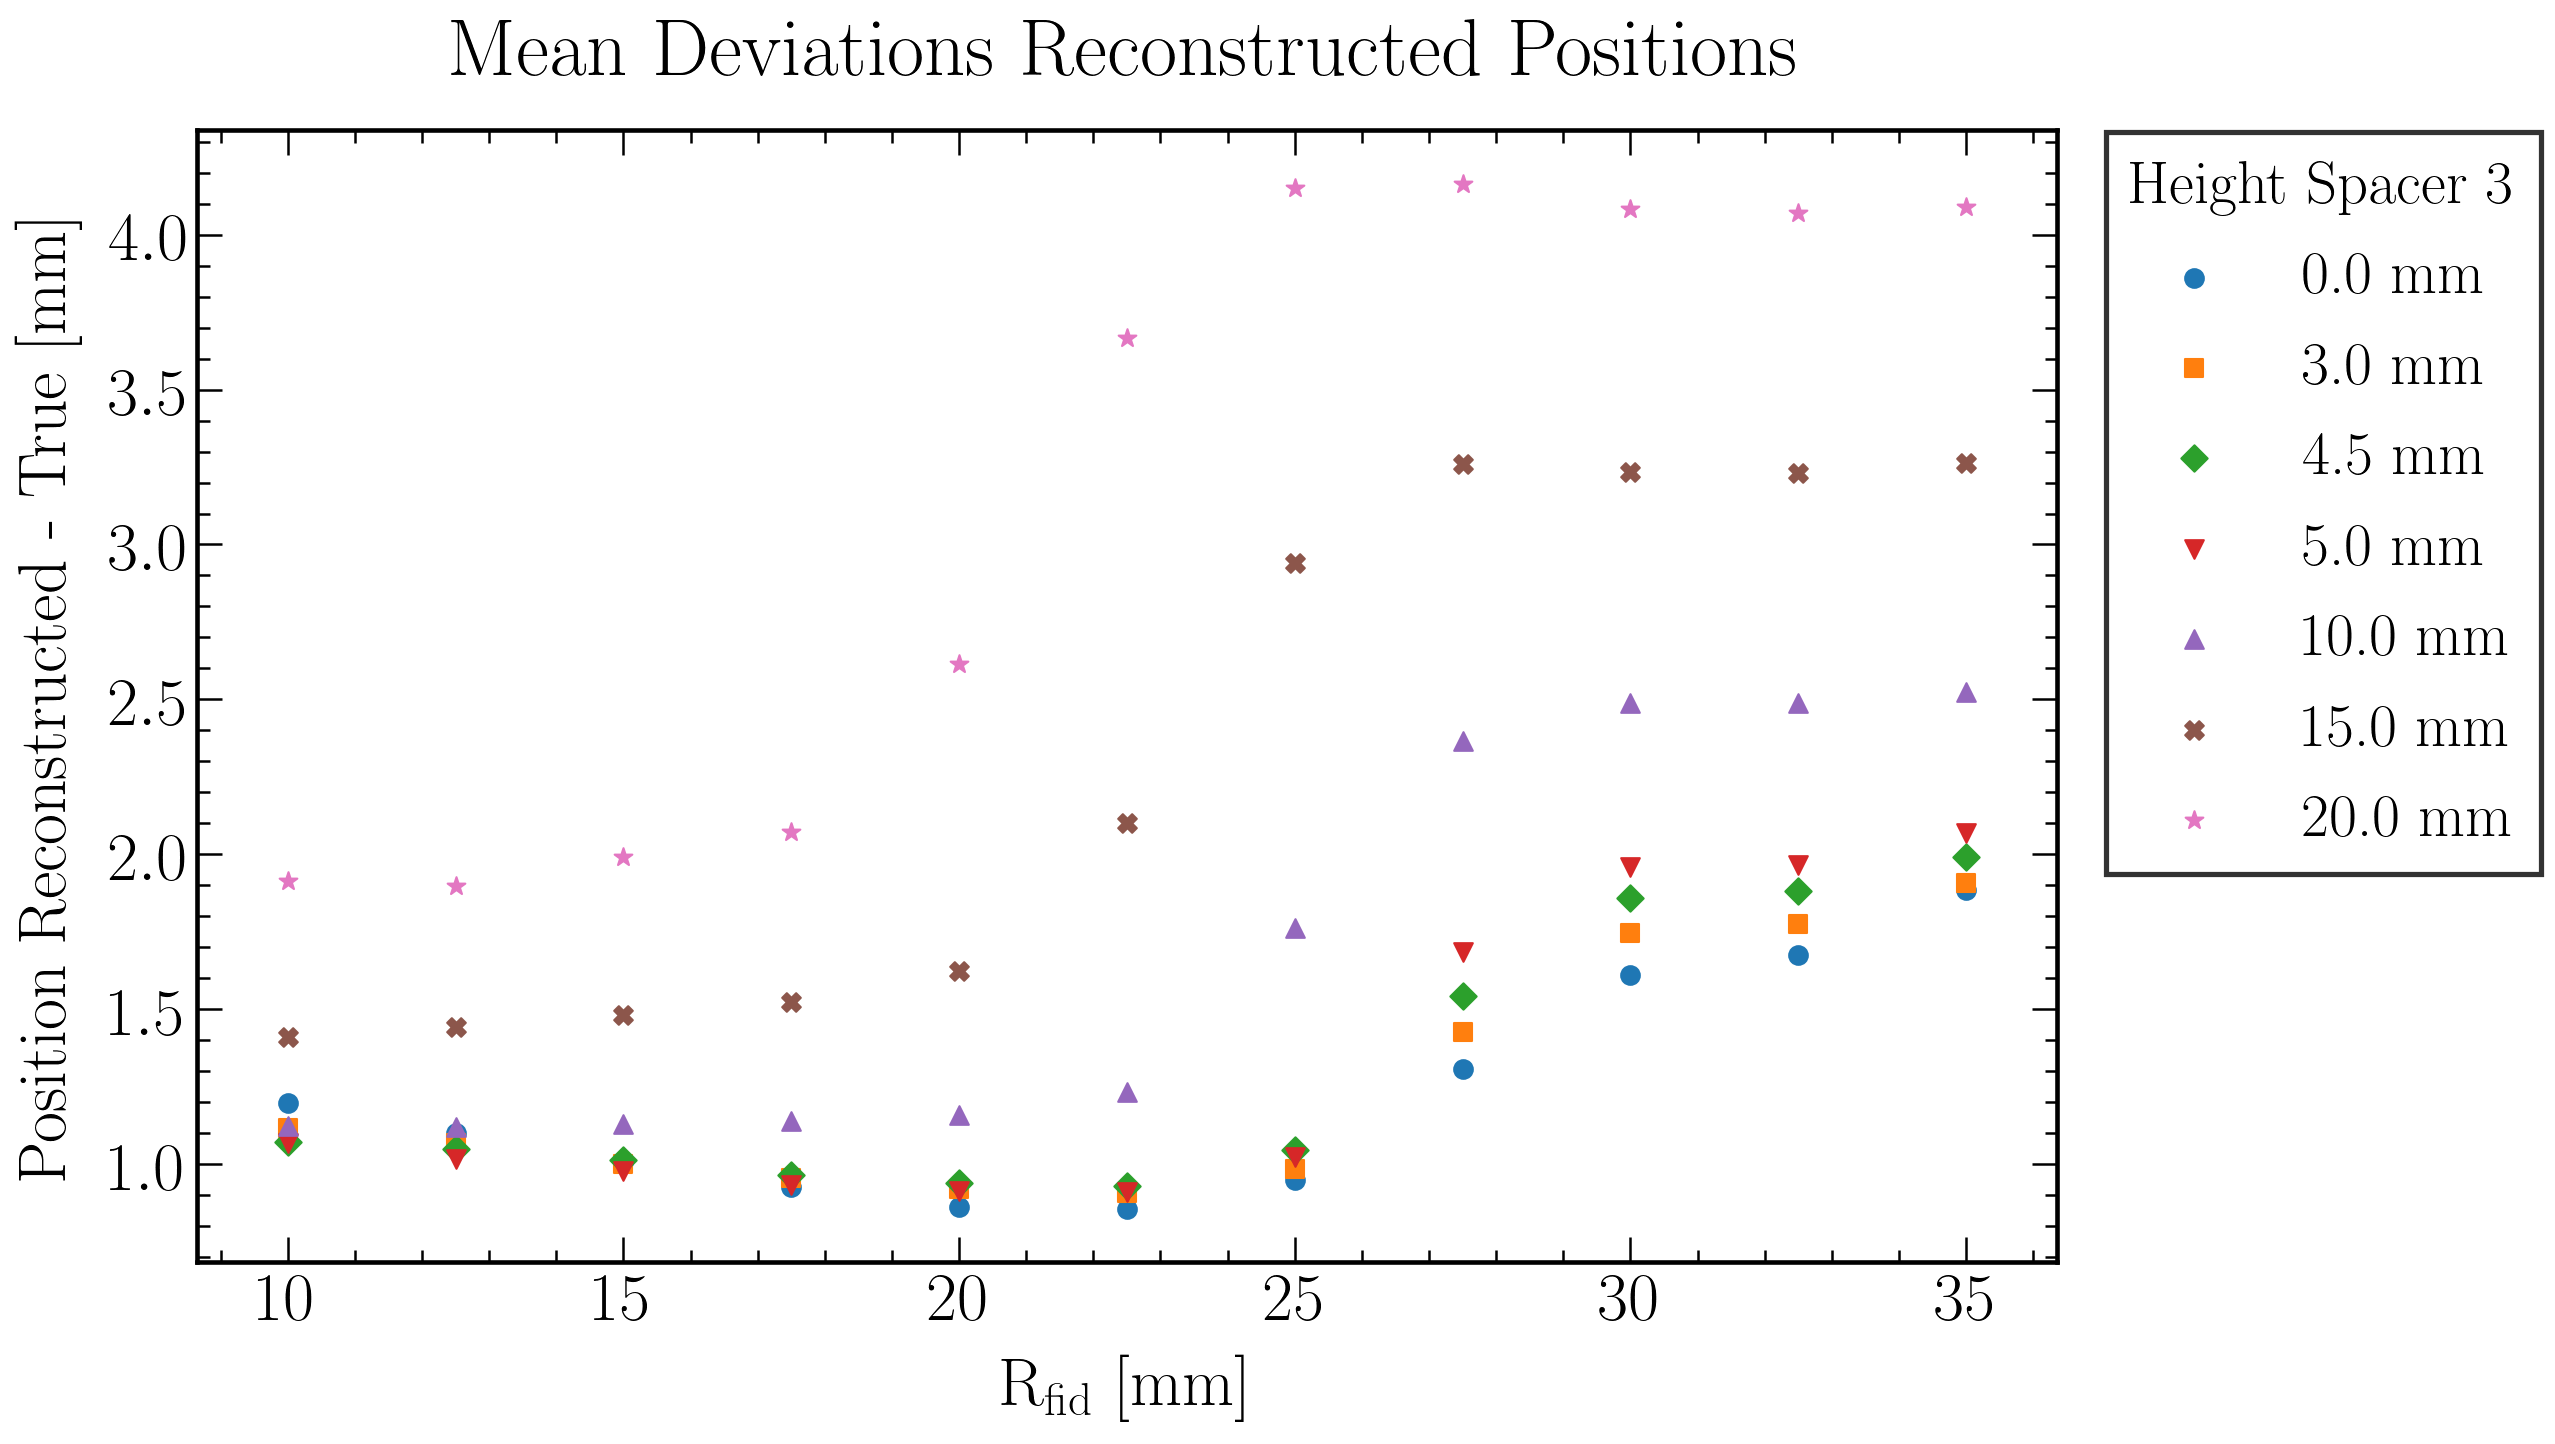

In [8]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

x = df_00['fid']
y = df_00['delta_mean']
plt.scatter(x, y, label = ' 0.0 mm', color = 'C0', marker = 'o', s = 80)

x = df_30['fid']
y = df_30['delta_mean']
plt.scatter(x, y, label = ' 3.0 mm', color = 'C1', marker = 's', s = 80)

x = df_45['fid']
y = df_45['delta_mean']
plt.scatter(x, y, label = ' 4.5 mm', color = 'C2', marker = 'D', s = 80)

x = df_50['fid']
y = df_50['delta_mean']
plt.scatter(x, y, label = ' 5.0 mm', color = 'C3', marker = 'v', s = 80)

x = df_100['fid']
y = df_100['delta_mean']
plt.scatter(x, y, label = '10.0 mm', color = 'C4', marker = '^', s = 80)

x = df_150['fid']
y = df_150['delta_mean']
plt.scatter(x, y, label = '15.0 mm', color = 'C5', marker = 'X', s = 80)

x = df_200['fid']
y = df_200['delta_mean']
plt.scatter(x, y, label = '20.0 mm', color = 'C6', marker = '*', s = 80)
    
plt.ylabel('Position Reconstructed - True [mm]', fontsize = label_size, labelpad = label_pad)
plt.xlabel('$\mathrm{R}_{\mathrm{fid}}$ [mm]', fontsize = label_size, labelpad = label_pad)
plt.title('Mean Deviations Reconstructed Positions', fontsize = title_size, pad = title_pad)

# Legend
leg = plt.legend(loc=2, bbox_to_anchor=(1.01,1.025), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
leg.set_title("Height Spacer 3", prop = {'size':0.9*label_size})
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

fig.savefig("Comparison_Spacer3_LRF_ReconstructedPosition_Deviations_Mean.png", bbox_inches = "tight")
plt.show()

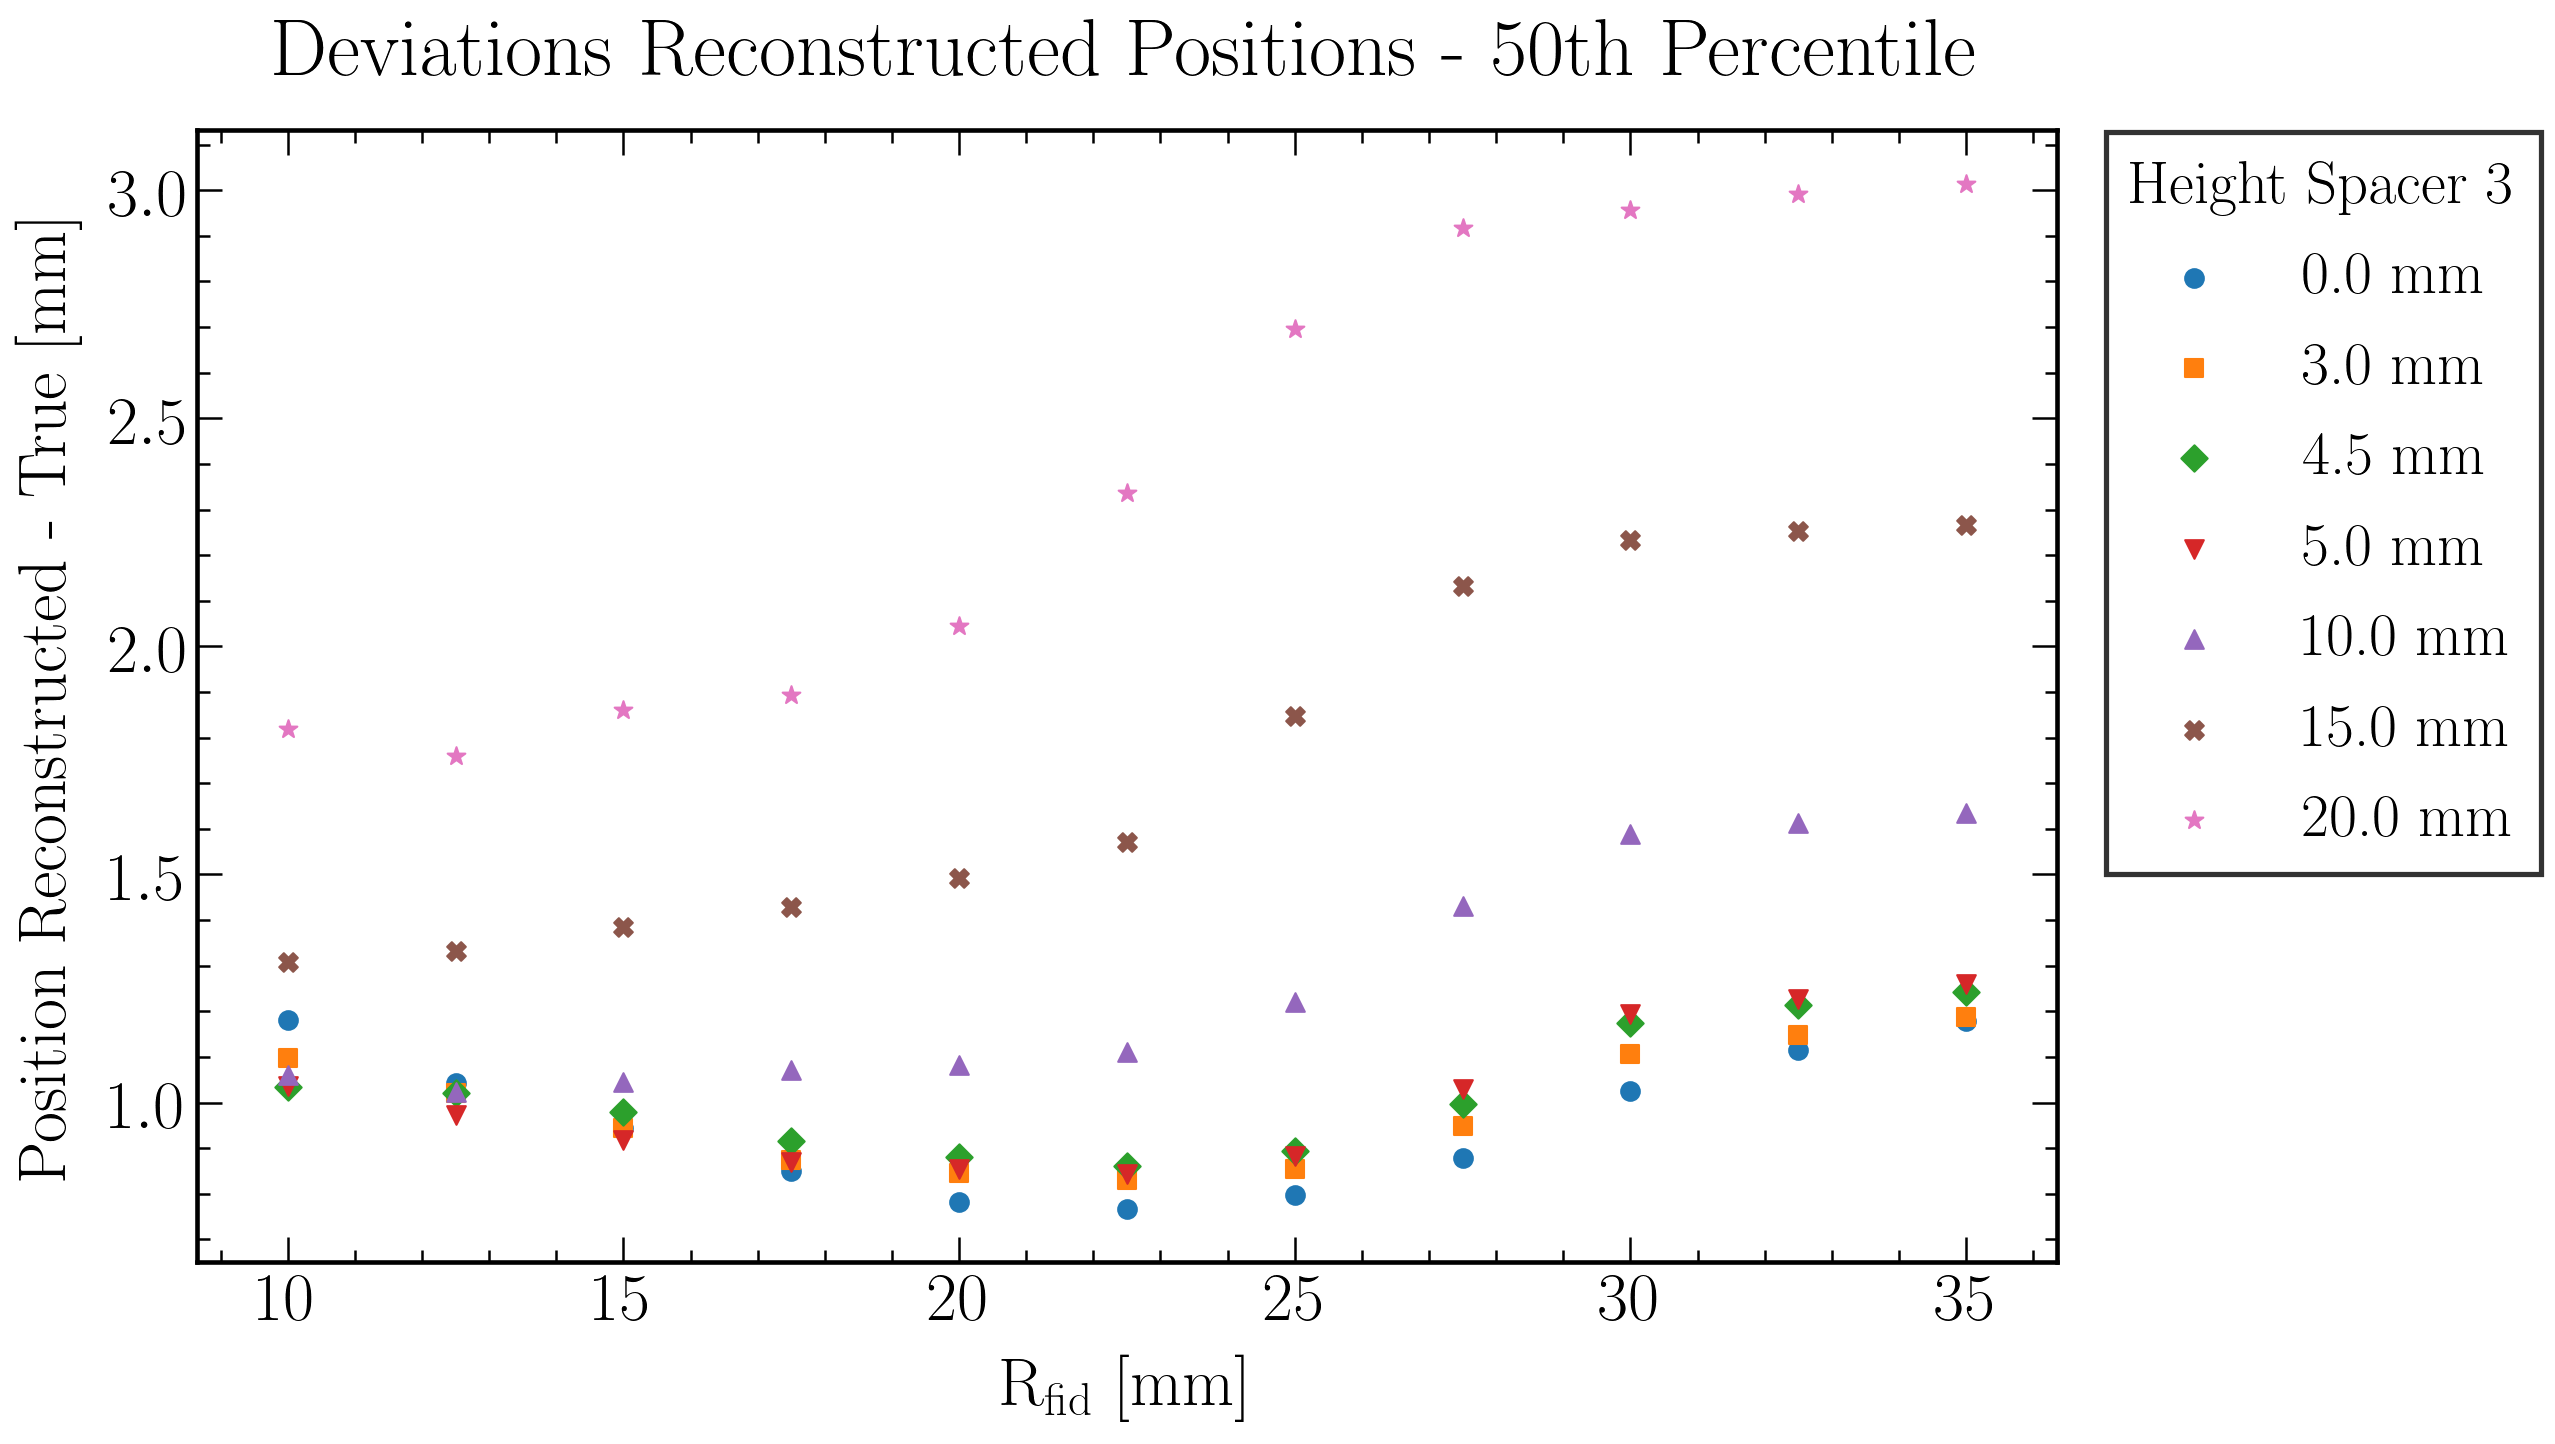

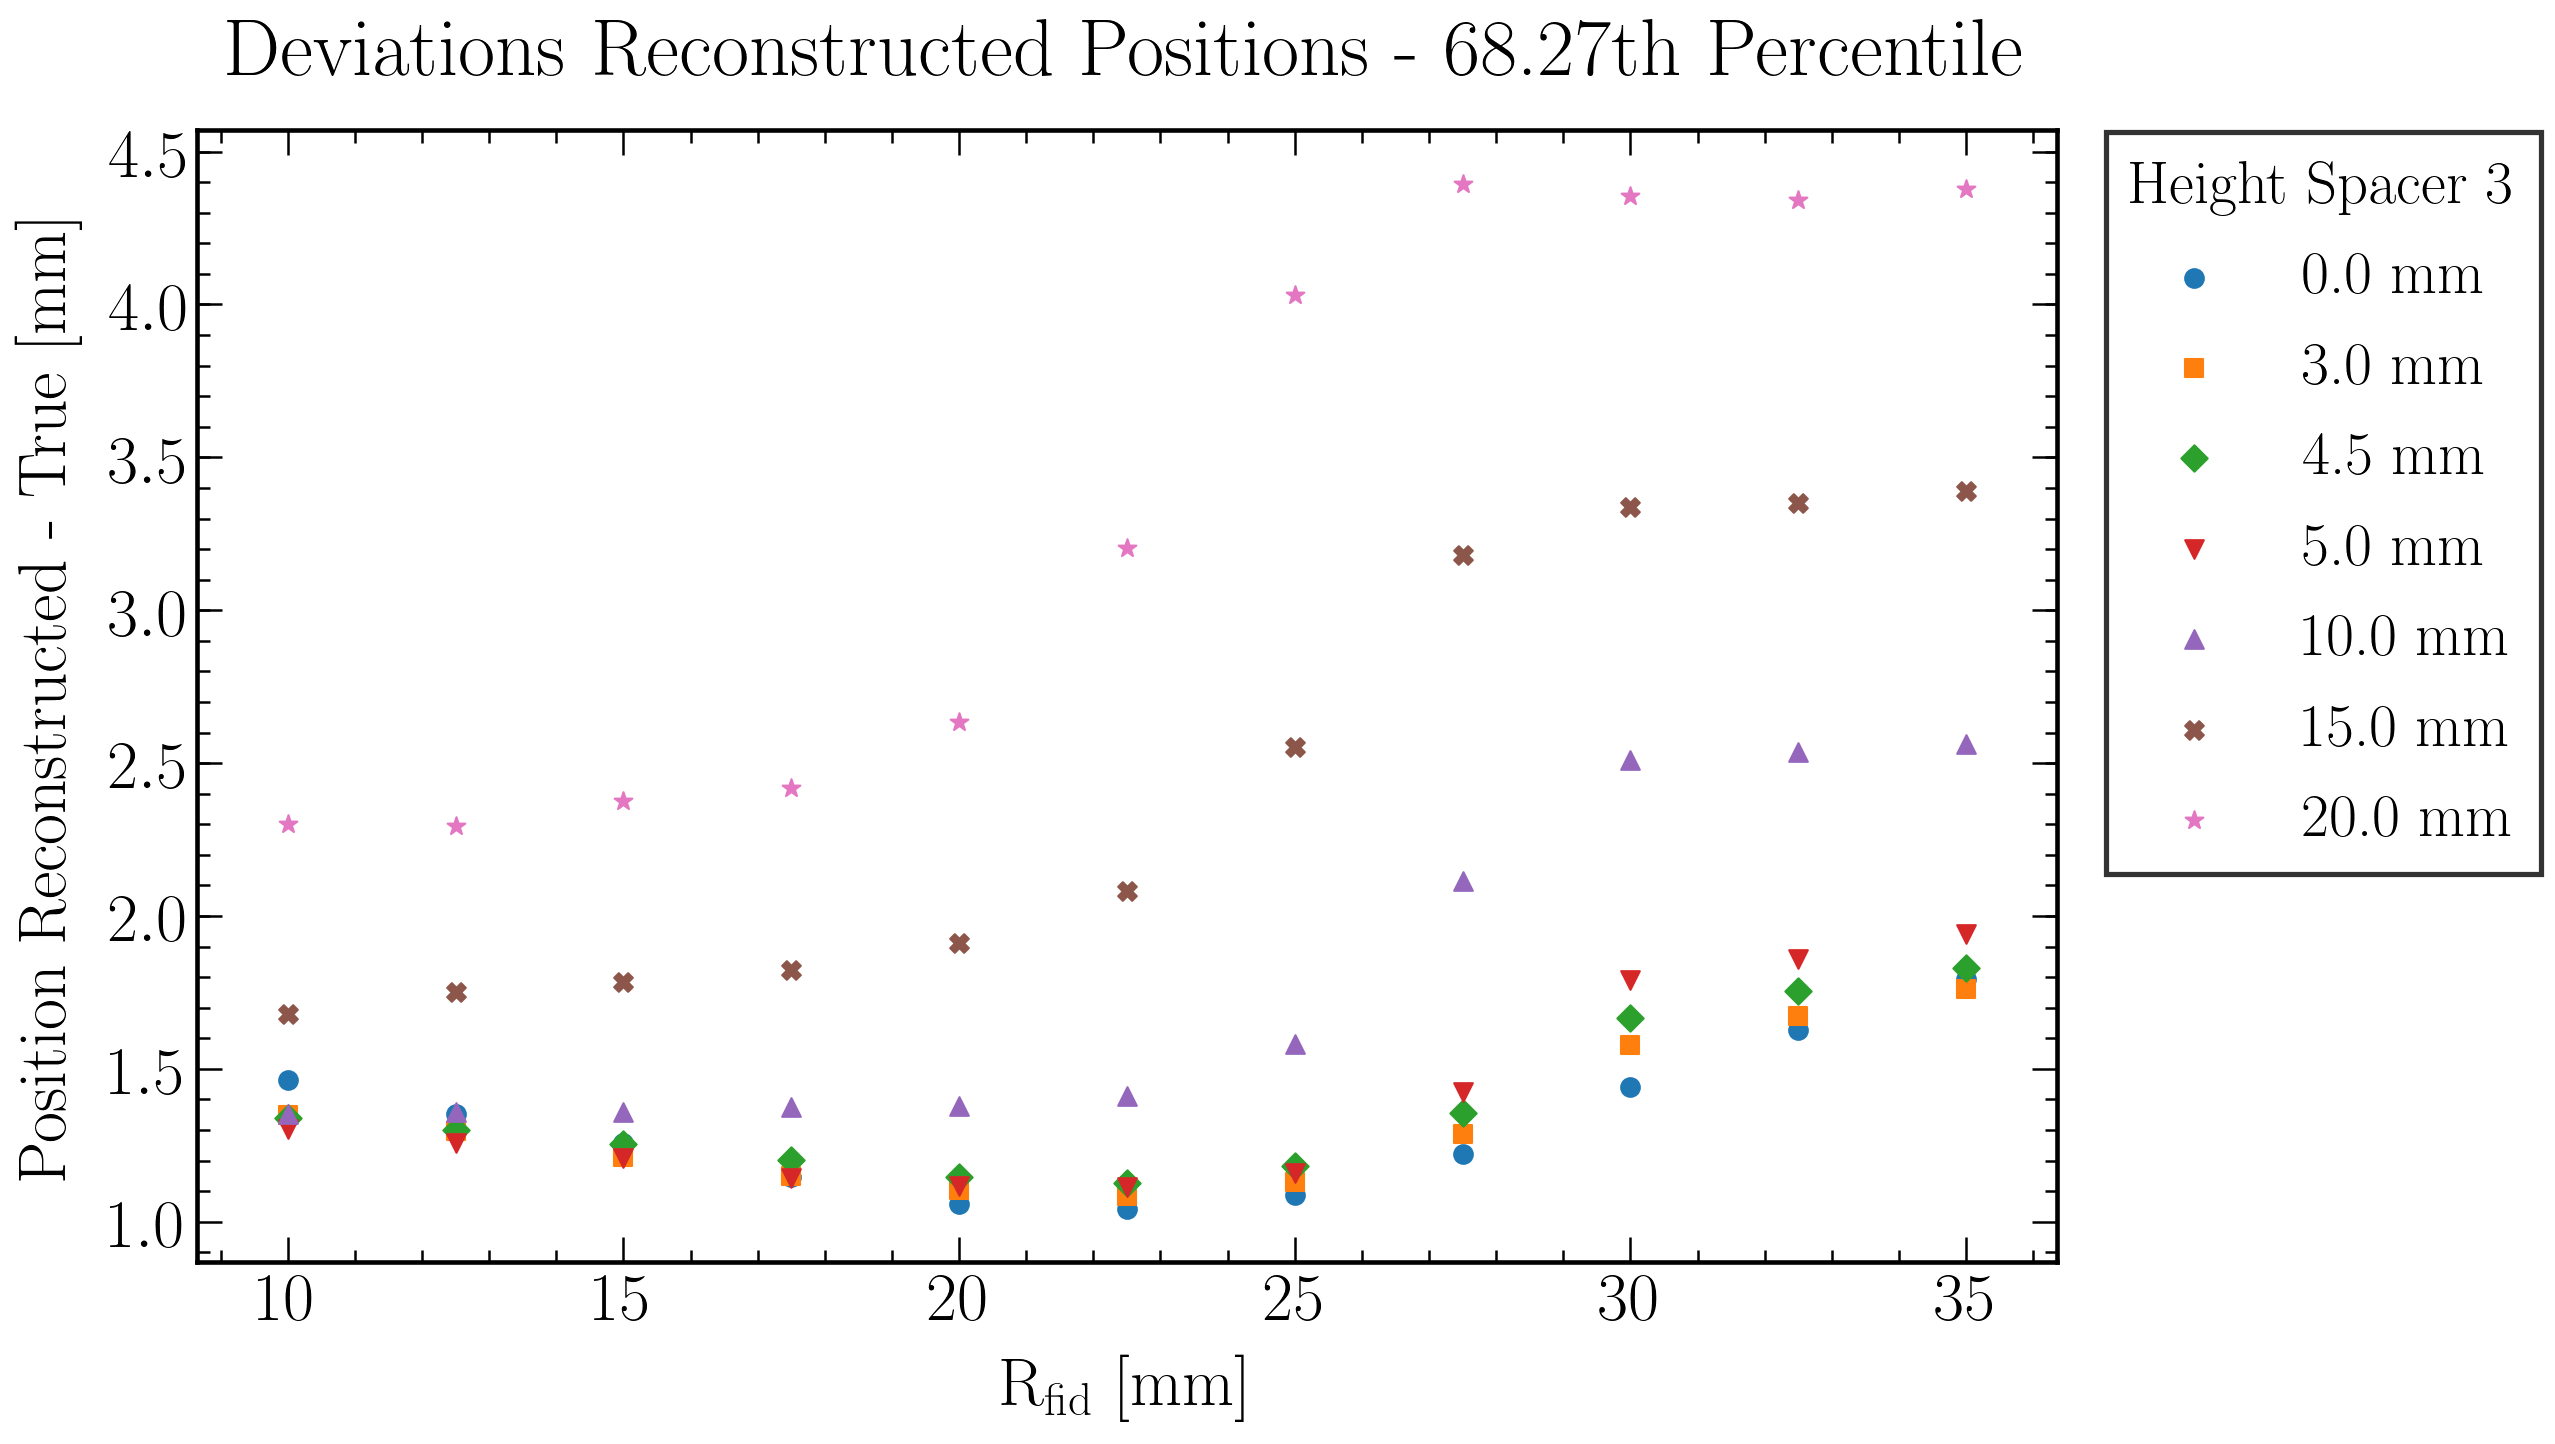

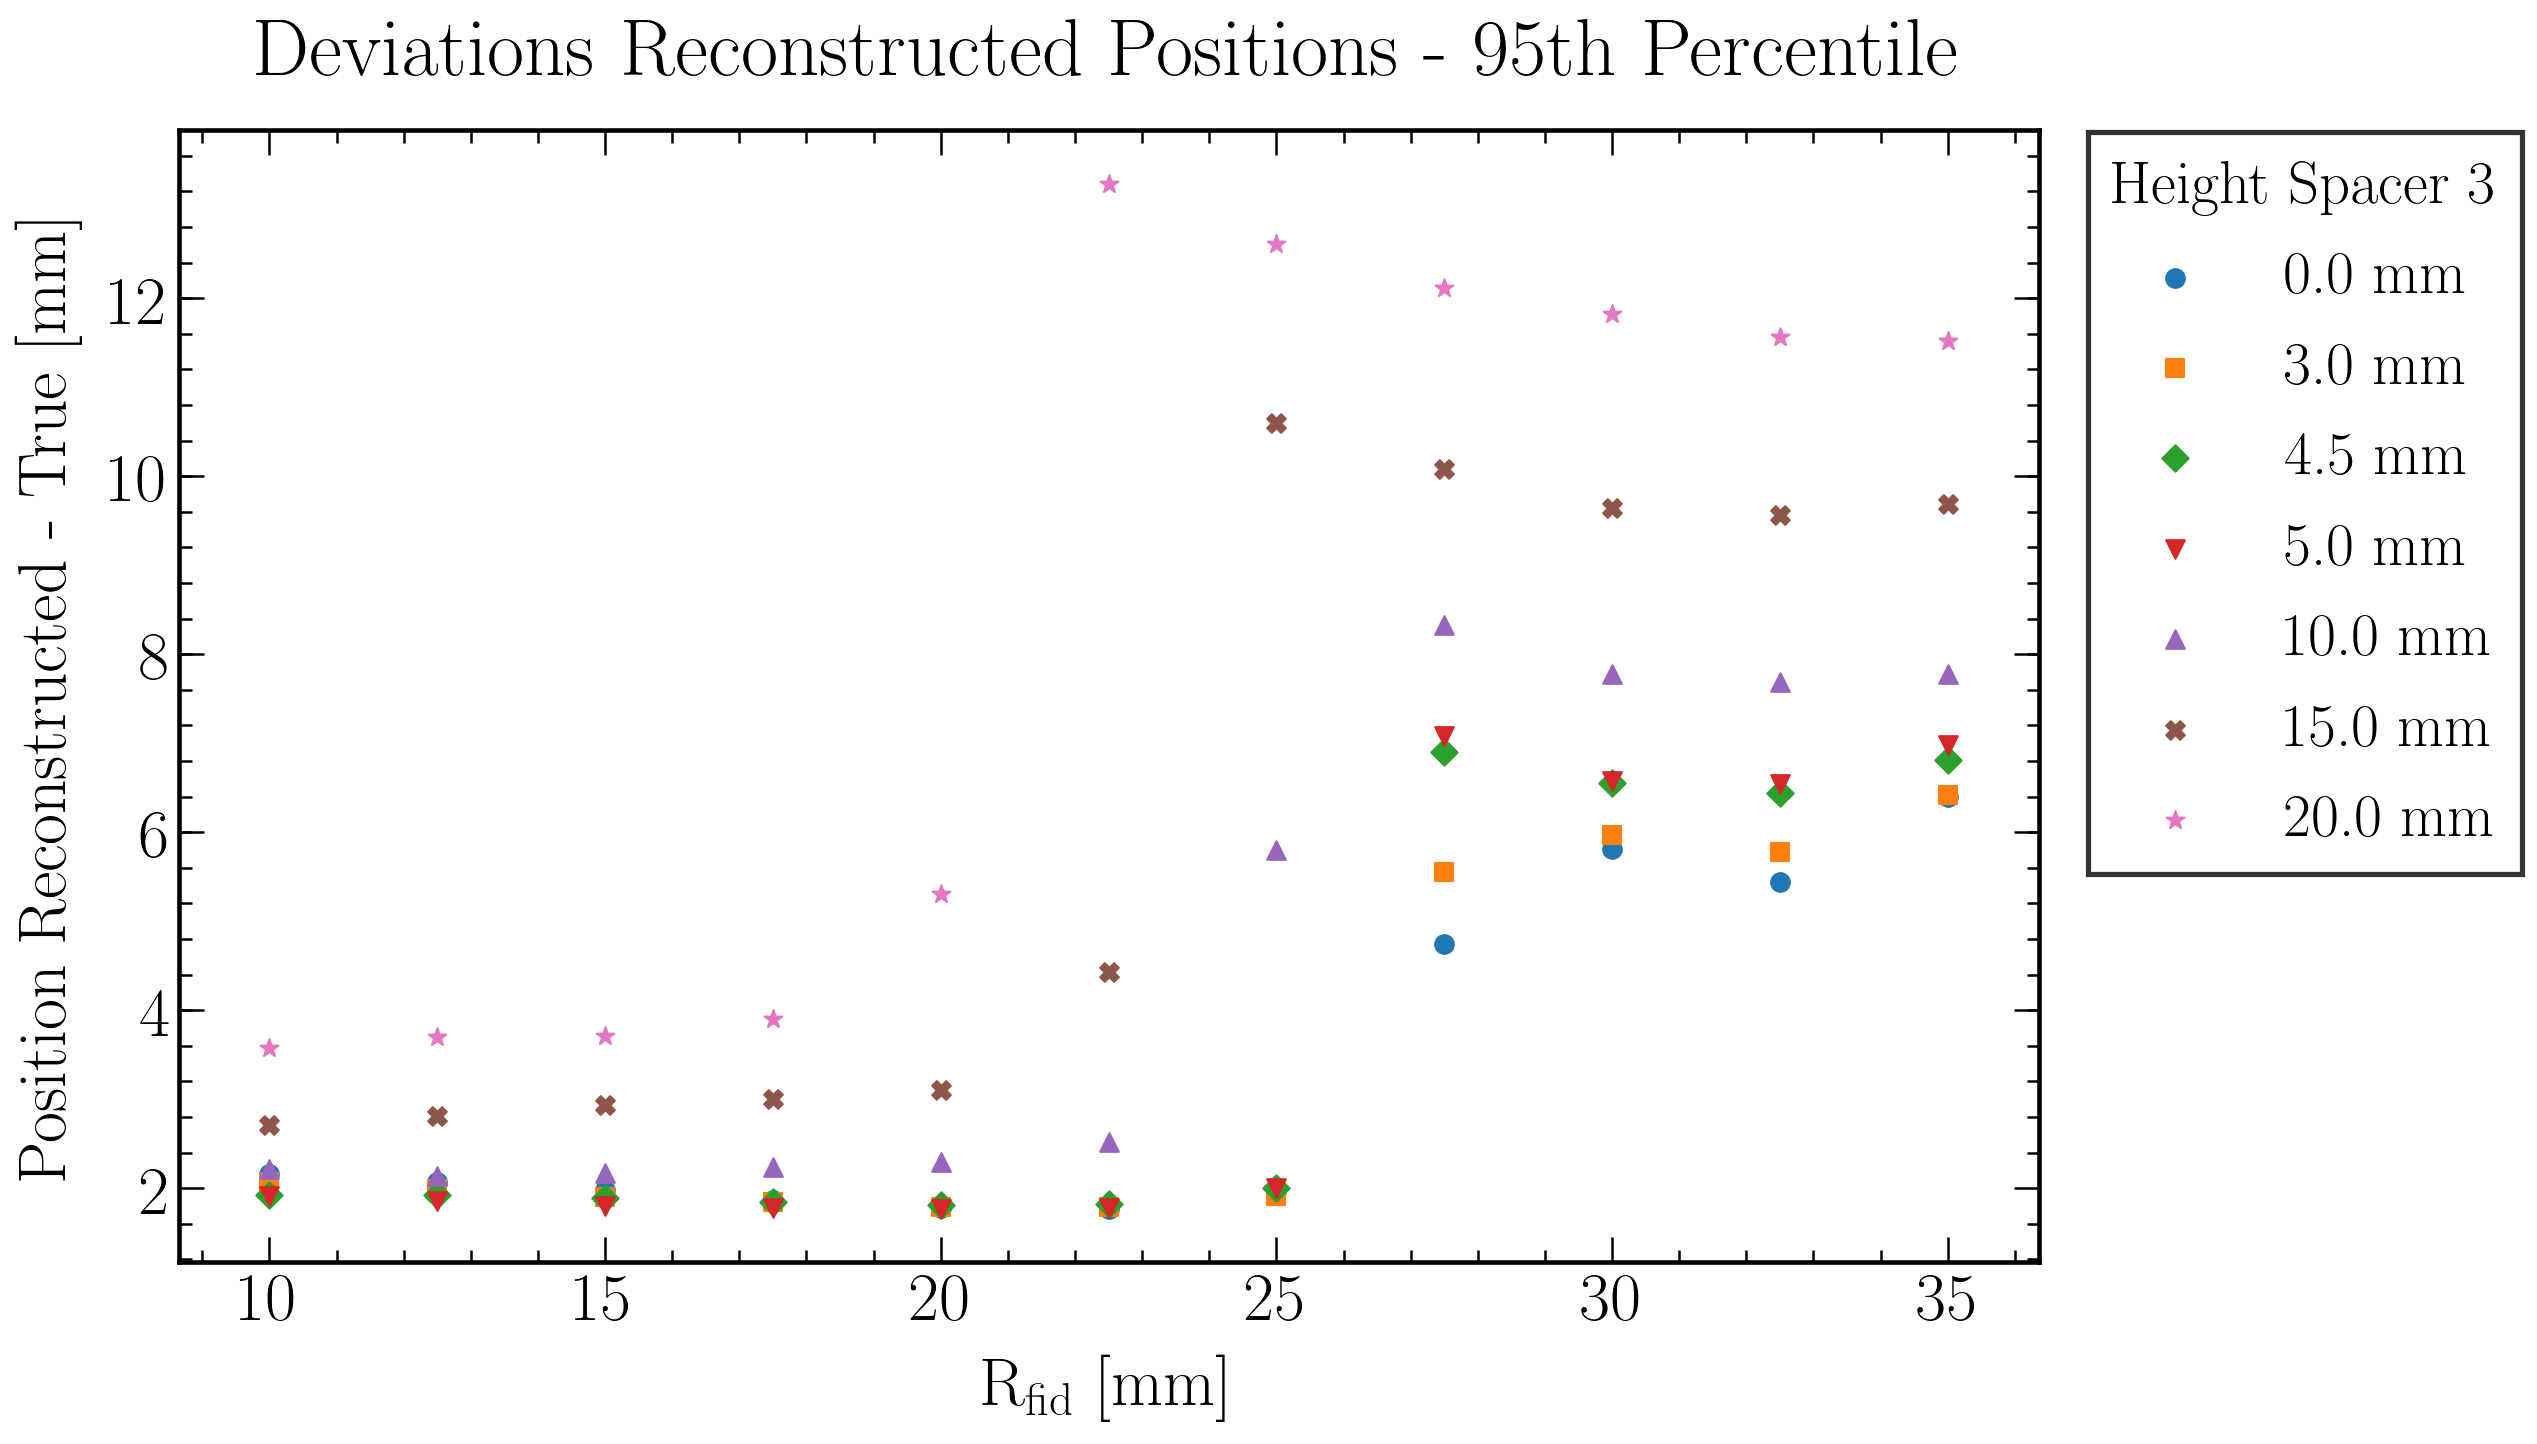

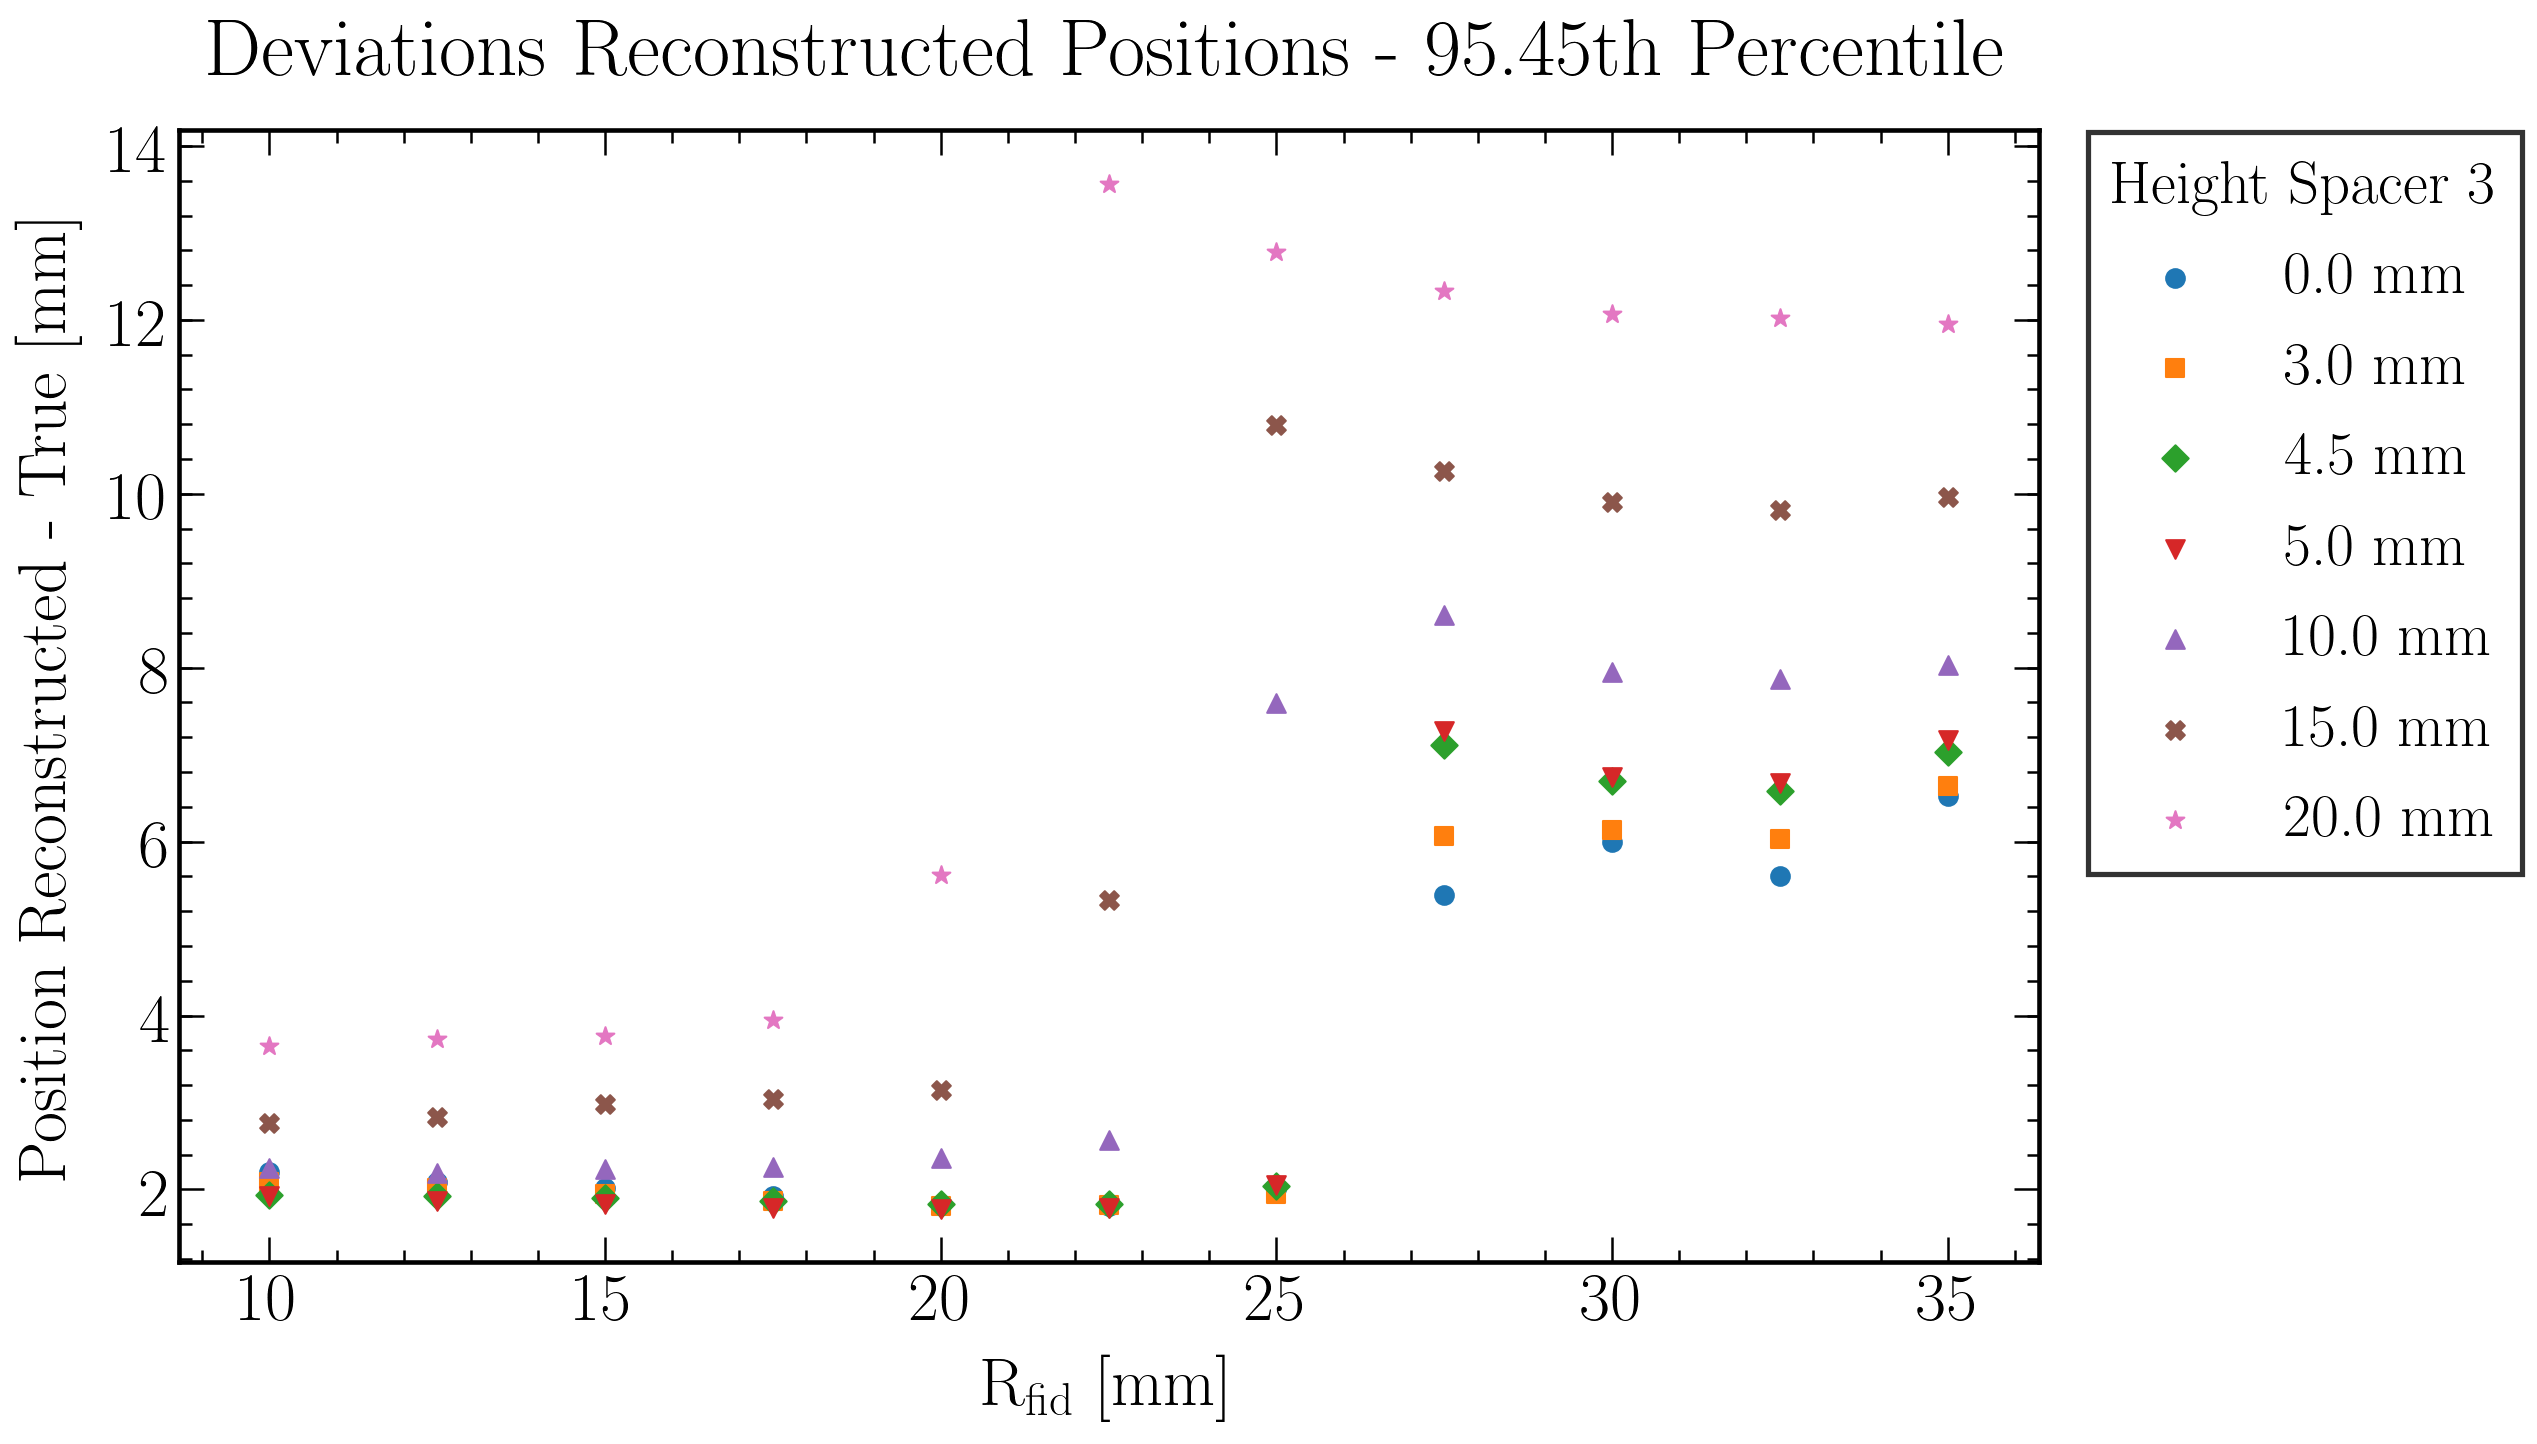

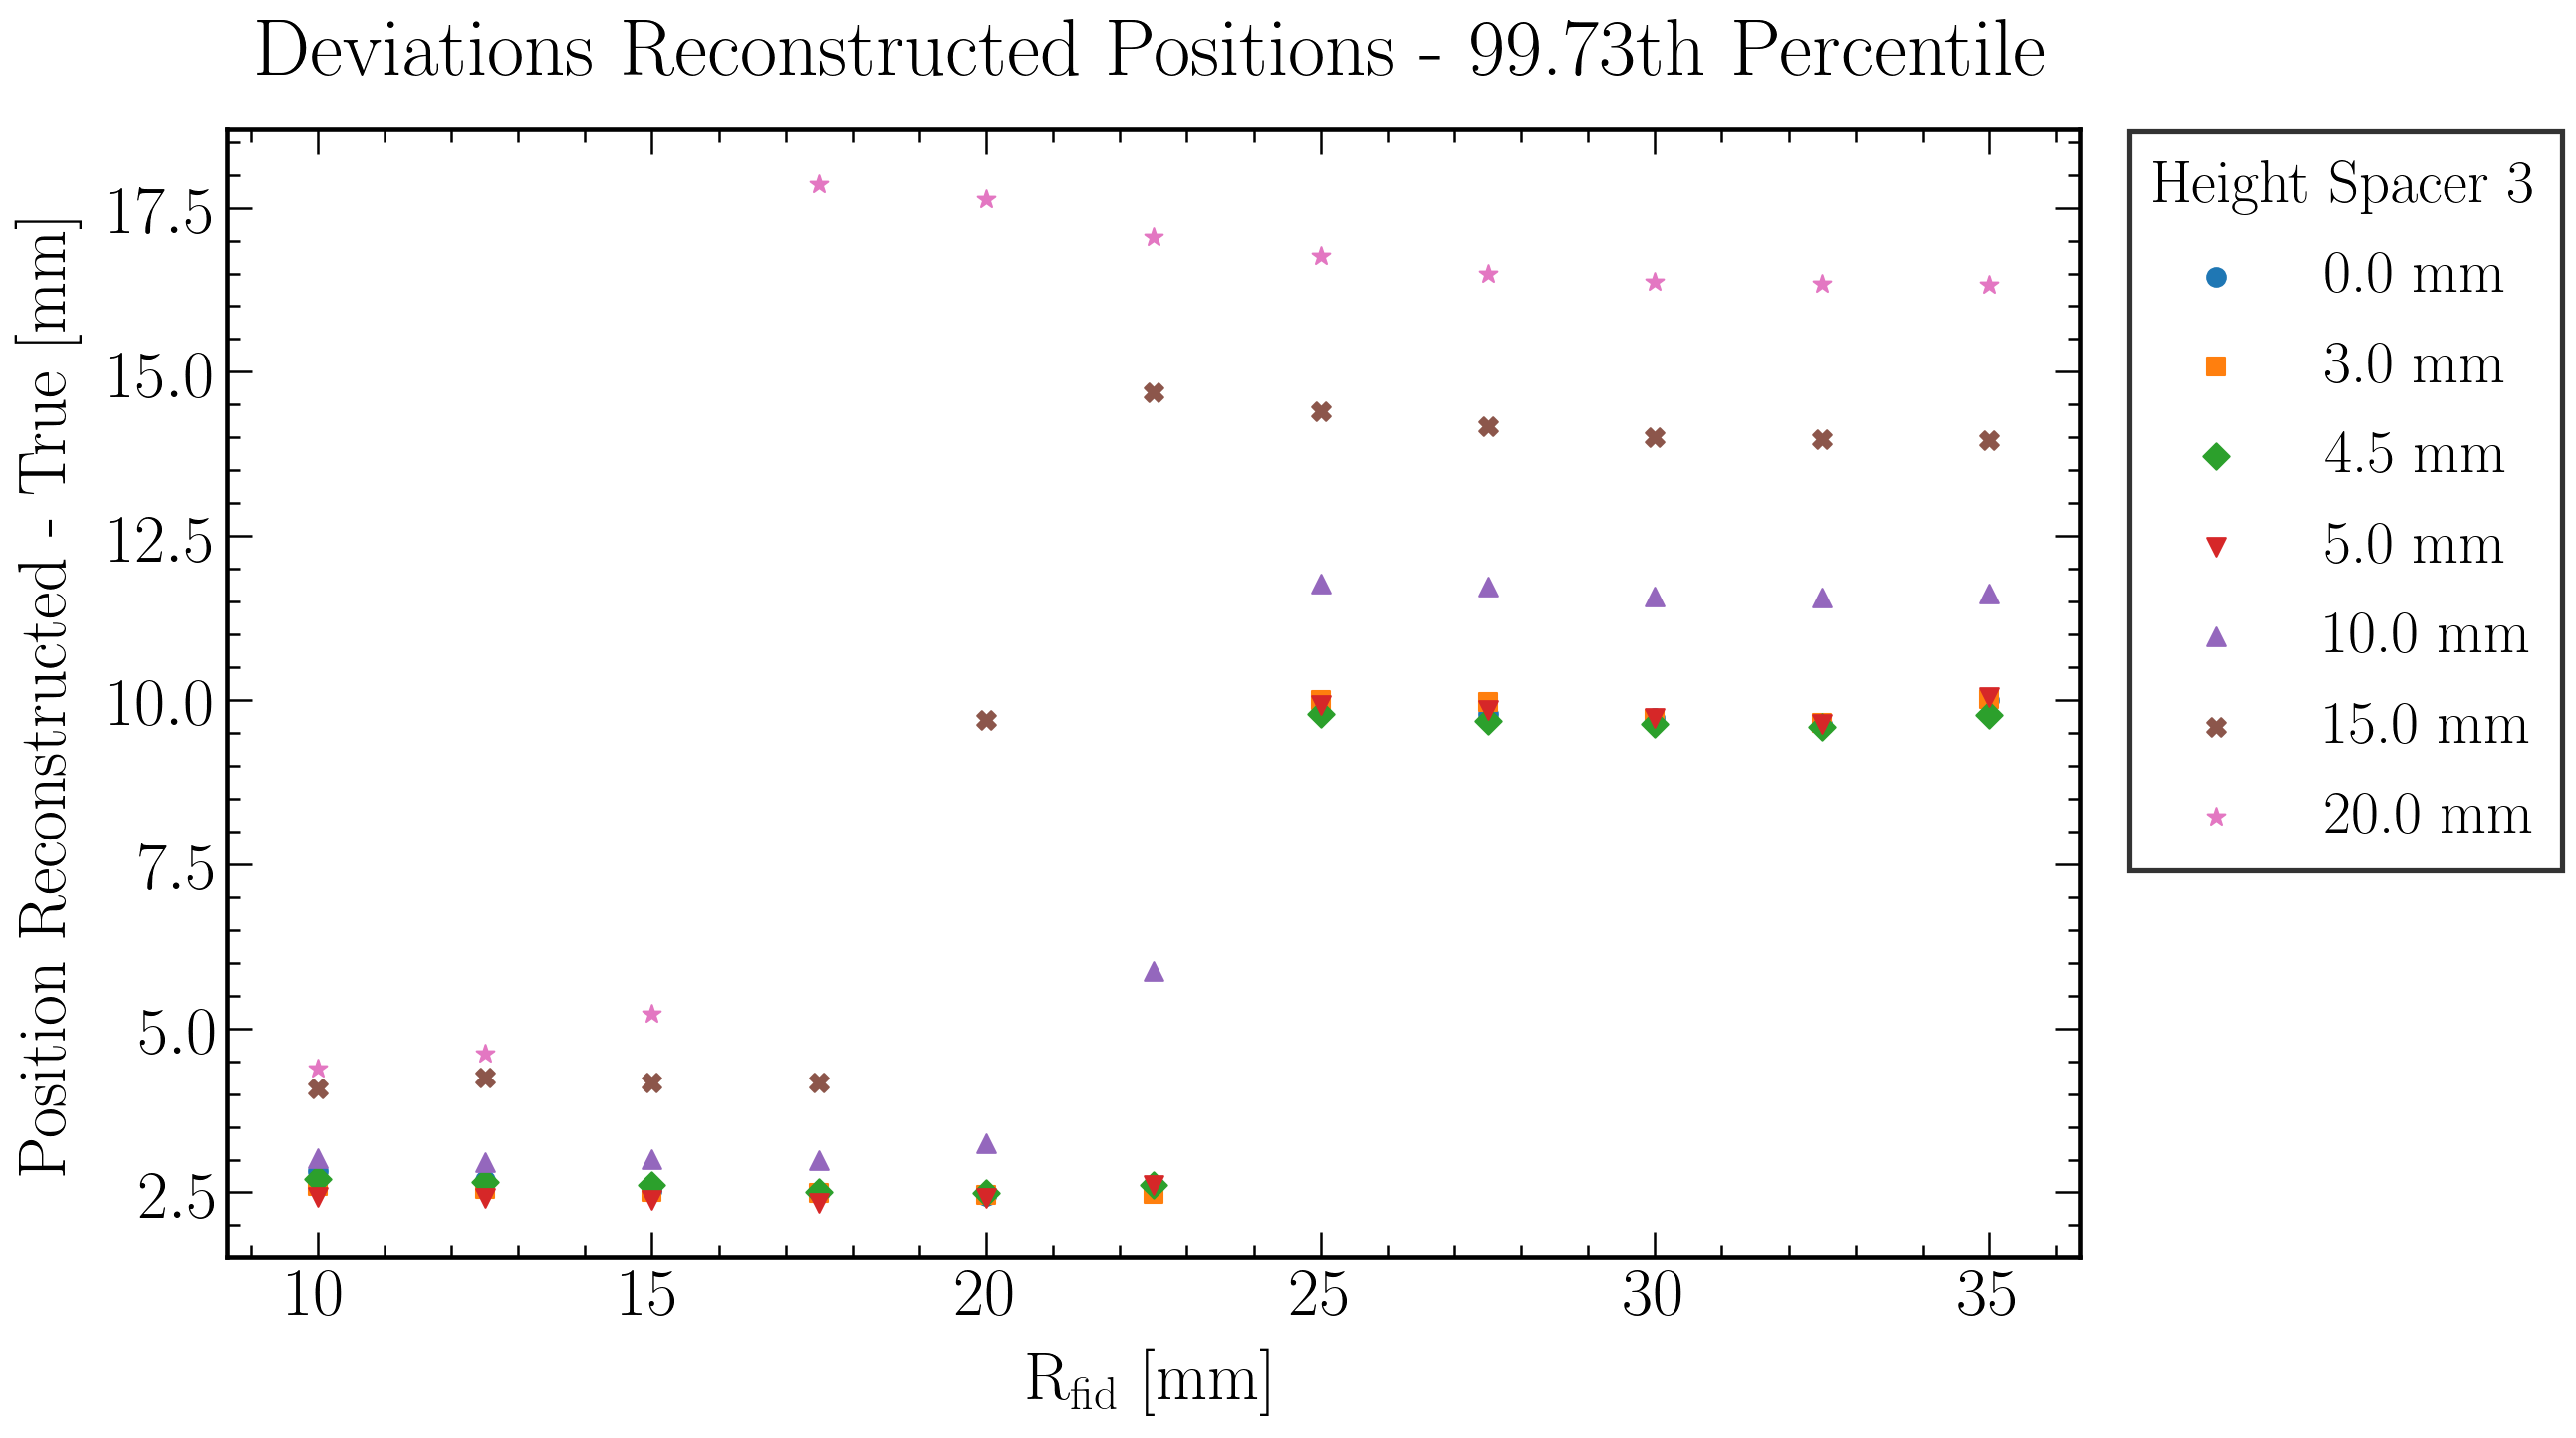

In [9]:
percentile_value_list = [50, 68.27, 95, 95.45, 99.73]

for percentile_value in percentile_value_list:    
    
    #############################################
    ## Set plot styles:
    #############################################

    fig=plt.figure(figsize=(16, 10), dpi=150)

    # Text options
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')

    # Labels
    label_size = 32.5 #25
    label_pad = 13 #10
    title_size = 39 #30
    title_pad = 26 #20

    # Axes Parameters
    axes = plt.gca()
    axes.tick_params(axis='both') 

    # Axes ---> Linewidth
    for axis in ['top','bottom','left','right']:
        axes.spines[axis].set_linewidth(2.2)

    # Axes ---> Ticks
    axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
    plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
    axes.yaxis.set_minor_locator(AutoMinorLocator(5))
    plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
    plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

    # Grid
    #plt.grid(True)

    #############################################
    ## Plot specific settings and plot data
    #############################################

    # Data plot

    x = df_00['fid']
    y = df_00['delta_'+str(percentile_value)+'_percentile']
    plt.scatter(x, y, label = ' 0.0 mm', color = 'C0', marker = 'o', s = 80)

    x = df_30['fid']
    y = df_30['delta_'+str(percentile_value)+'_percentile']
    plt.scatter(x, y, label = ' 3.0 mm', color = 'C1', marker = 's', s = 80)

    x = df_45['fid']
    y = df_45['delta_'+str(percentile_value)+'_percentile']
    plt.scatter(x, y, label = ' 4.5 mm', color = 'C2', marker = 'D', s = 80)

    x = df_50['fid']
    y = df_50['delta_'+str(percentile_value)+'_percentile']
    plt.scatter(x, y, label = ' 5.0 mm', color = 'C3', marker = 'v', s = 80)

    x = df_100['fid']
    y = df_100['delta_'+str(percentile_value)+'_percentile']
    plt.scatter(x, y, label = '10.0 mm', color = 'C4', marker = '^', s = 80)

    x = df_150['fid']
    y = df_150['delta_'+str(percentile_value)+'_percentile']
    plt.scatter(x, y, label = '15.0 mm', color = 'C5', marker = 'X', s = 80)

    x = df_200['fid']
    y = df_200['delta_'+str(percentile_value)+'_percentile']
    plt.scatter(x, y, label = '20.0 mm', color = 'C6', marker = '*', s = 80)

    plt.ylabel('Position Reconstructed - True [mm]', fontsize = label_size, labelpad = label_pad)
    plt.xlabel('$\mathrm{R}_{\mathrm{fid}}$ [mm]', fontsize = label_size, labelpad = label_pad)
    plt.title('Deviations Reconstructed Positions - '+str(percentile_value)+'th Percentile', fontsize = title_size, pad = title_pad)

    # Legend
    leg = plt.legend(loc=2, bbox_to_anchor=(1.01,1.025), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
    leg.set_title("Height Spacer 3", prop = {'size':0.9*label_size})
    for line in leg.get_lines(): # enumerated
        line.set_linewidth(4)
    leg.get_frame().set_linewidth(2.5)

    fig.savefig("Comparison_Spacer3_LRF_ReconstructedPosition_Deviations_"+str(percentile_value)+"Percentiles.png", bbox_inches = "tight")
    plt.show()

In [10]:
##########
#   NN   #
##########

In [11]:
df_00_NN = pd.read_pickle('/media/ab602/TOSHIBA EXT/Thesis/Simulation_Outputs/Position_Reconstruction_NN/optPhot_S2_1.0e+05_pmtGap0.0_RPTFE0.95_LXeAbs100_Tmesh0.89770509_nop_1.0e+04_ReconstructedPosition_Deviations_NN.pkl')
df_45_NN = pd.read_pickle('/media/ab602/TOSHIBA EXT/Thesis/Simulation_Outputs/Position_Reconstruction_NN/optPhot_S2_1.0e+05_pmtGap4.5_RPTFE0.95_LXeAbs100_Tmesh0.89770509_writeEmptyFalse_nop_1.0e+04_ReconstructedPosition_Deviations_NN.pkl')

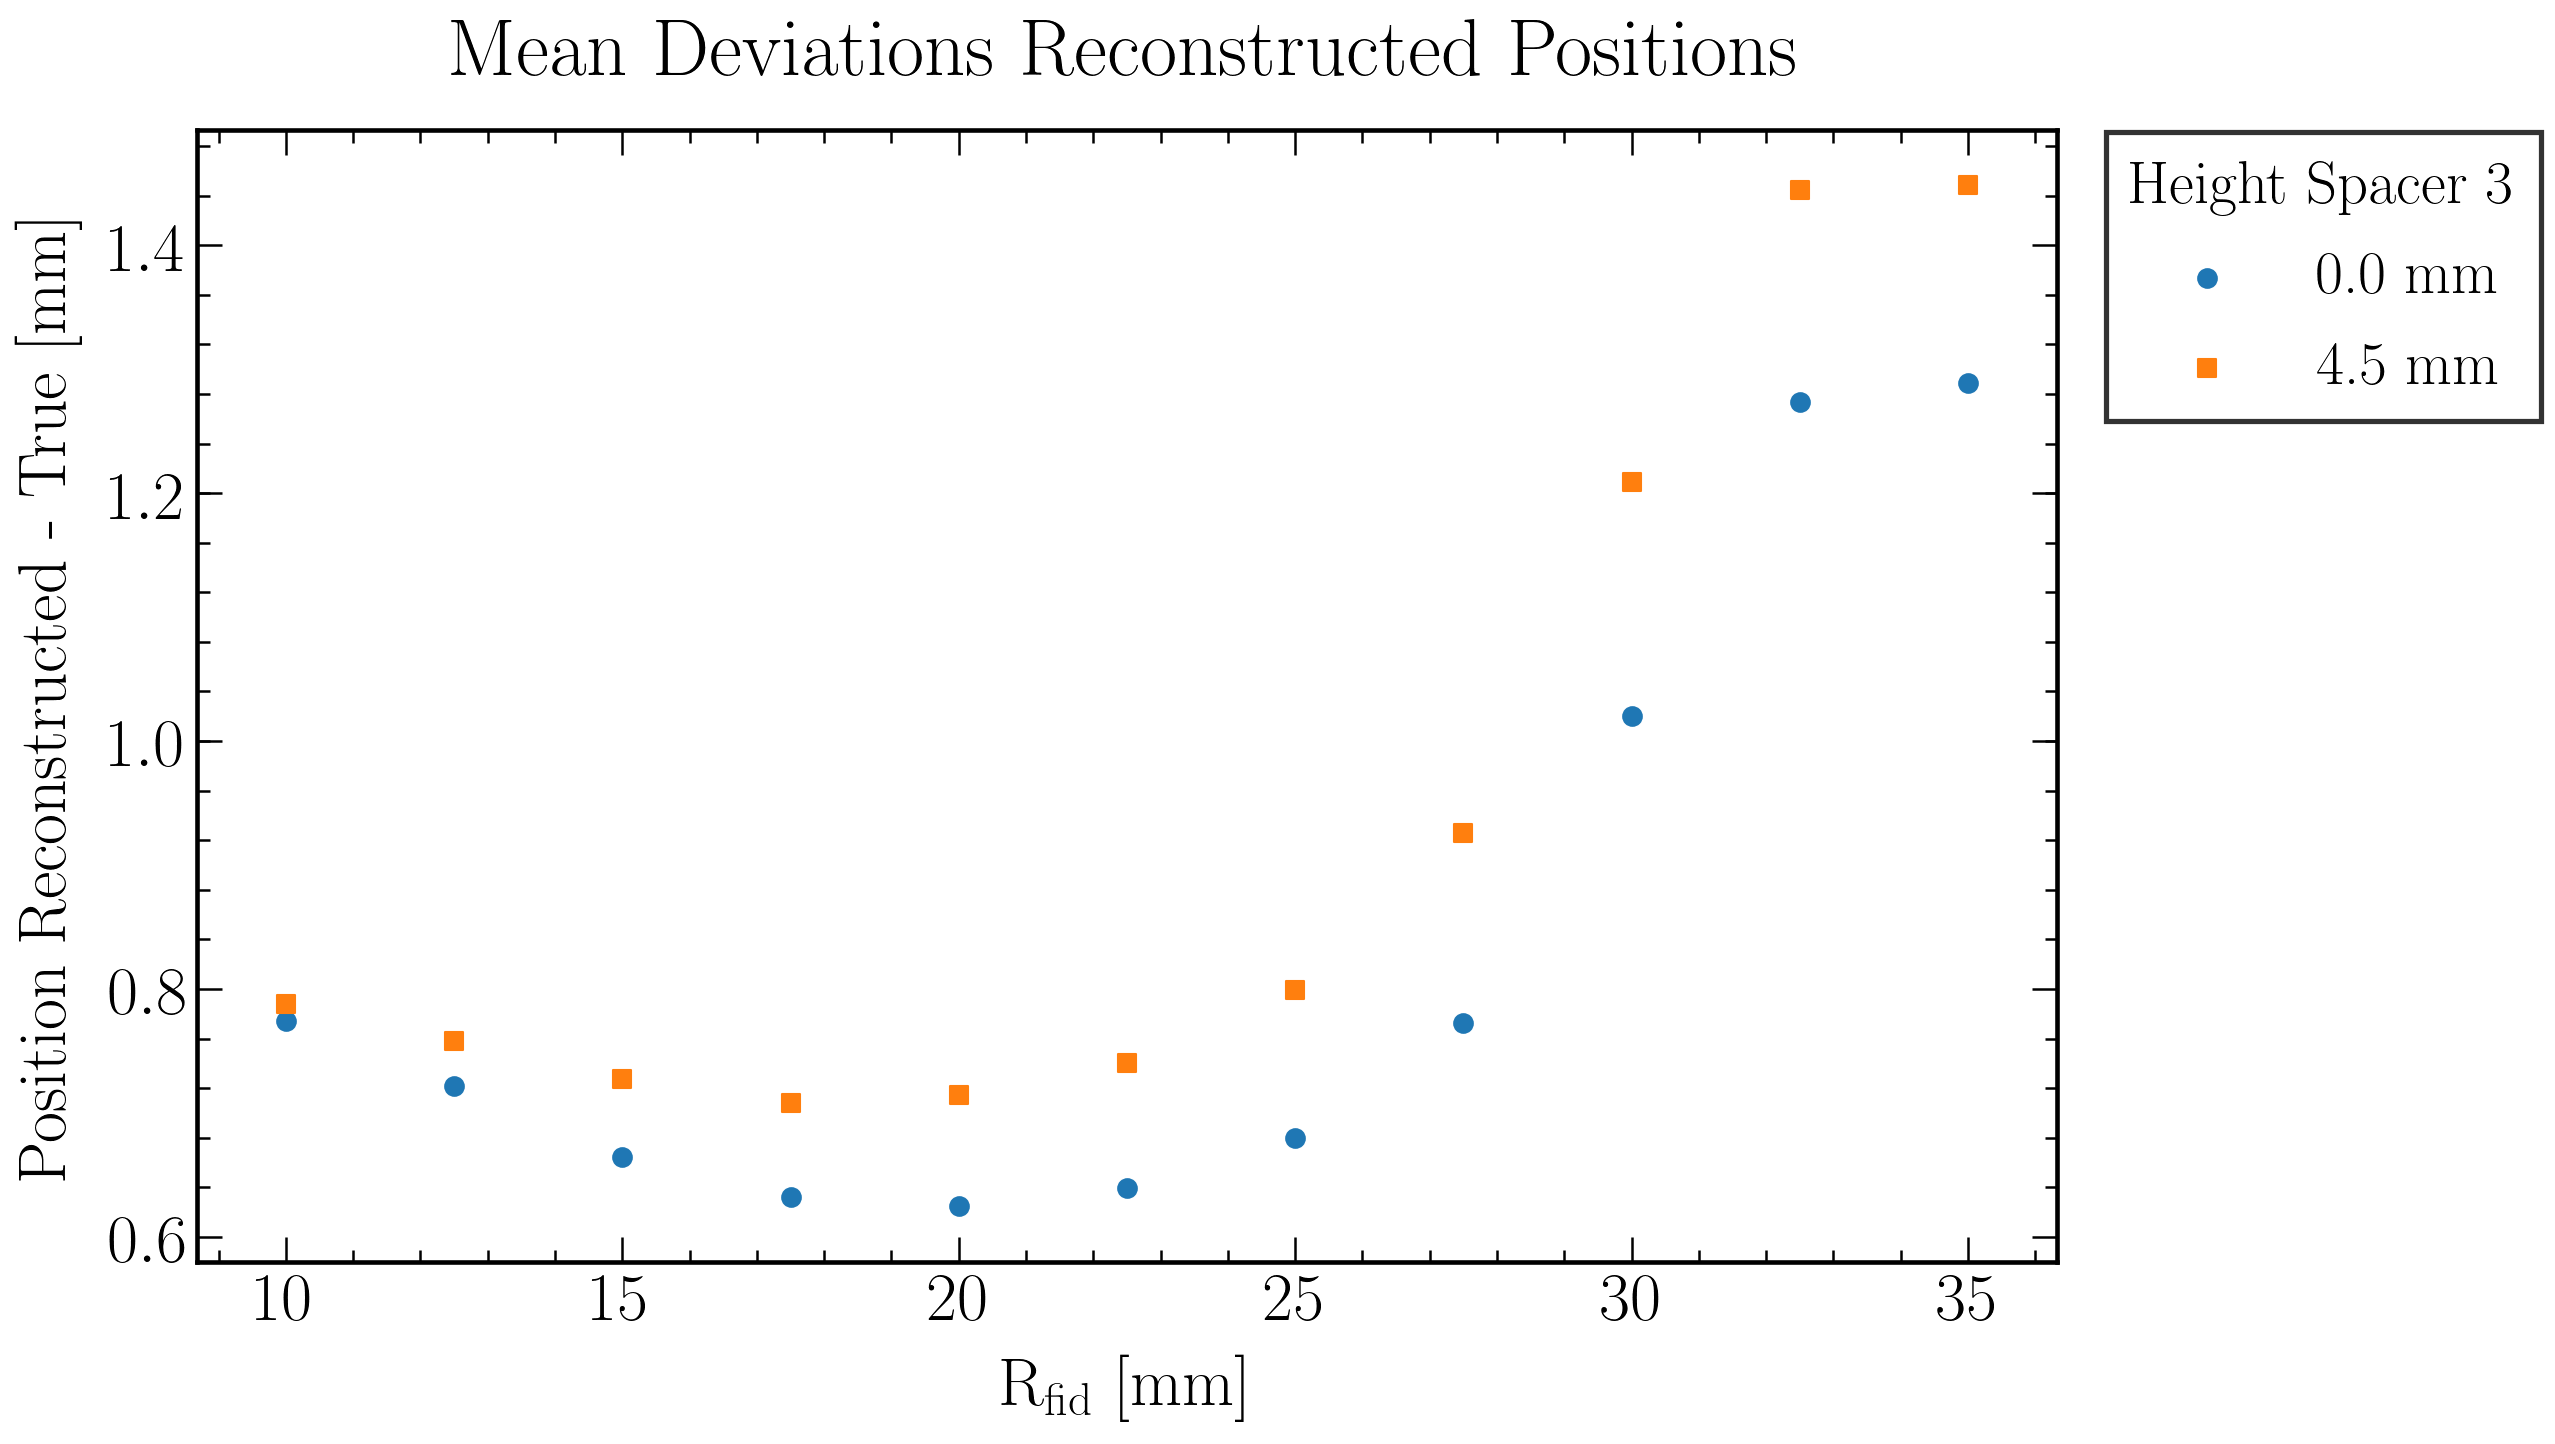

In [12]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

x = df_00_NN['fid']
y = df_00_NN['delta_mean']
plt.scatter(x, y, label = ' 0.0 mm', color = 'C0', marker = 'o', s = 80)

x = df_45_NN['fid']
y = df_45_NN['delta_mean']
plt.scatter(x, y, label = ' 4.5 mm', color = 'C1', marker = 's', s = 80)
    
plt.ylabel('Position Reconstructed - True [mm]', fontsize = label_size, labelpad = label_pad)
plt.xlabel('$\mathrm{R}_{\mathrm{fid}}$ [mm]', fontsize = label_size, labelpad = label_pad)
plt.title('Mean Deviations Reconstructed Positions', fontsize = title_size, pad = title_pad)

# Legend
leg = plt.legend(loc=2, bbox_to_anchor=(1.01,1.025), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
leg.set_title("Height Spacer 3", prop = {'size':0.9*label_size})
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

fig.savefig("Comparison_Spacer3_NN_ReconstructedPosition_Deviations_Mean.png", bbox_inches = "tight")
plt.show()

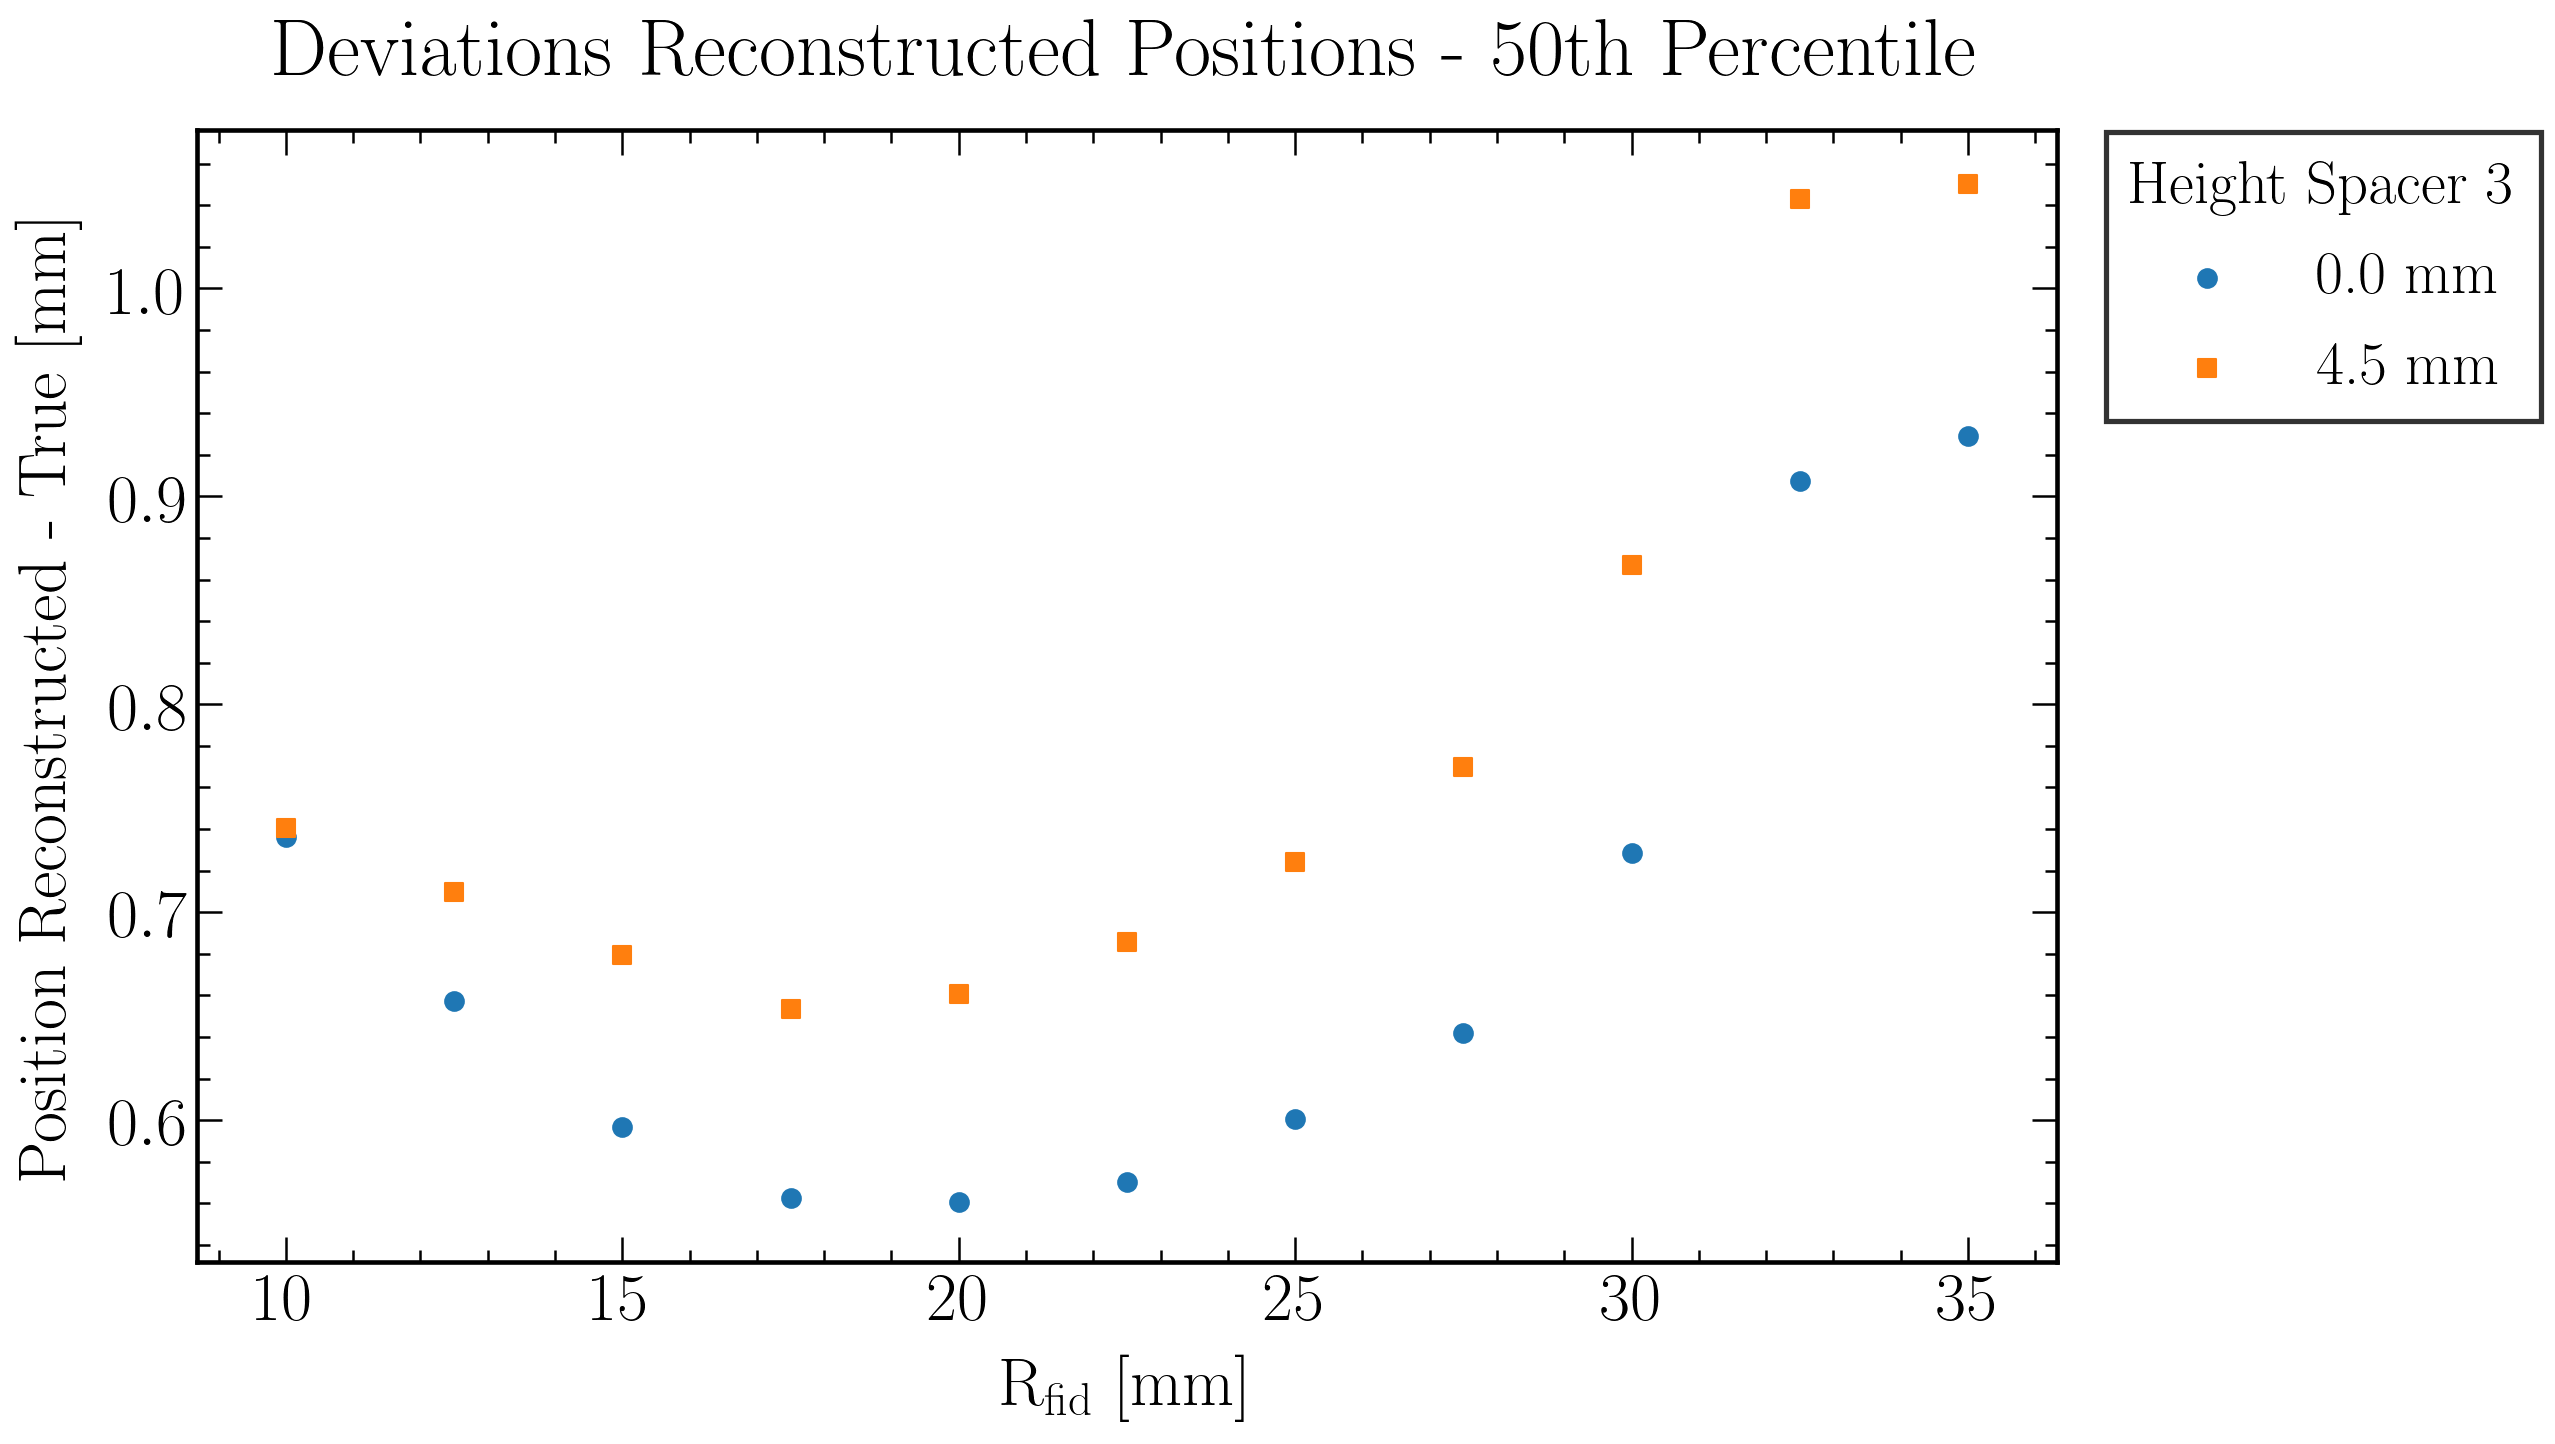

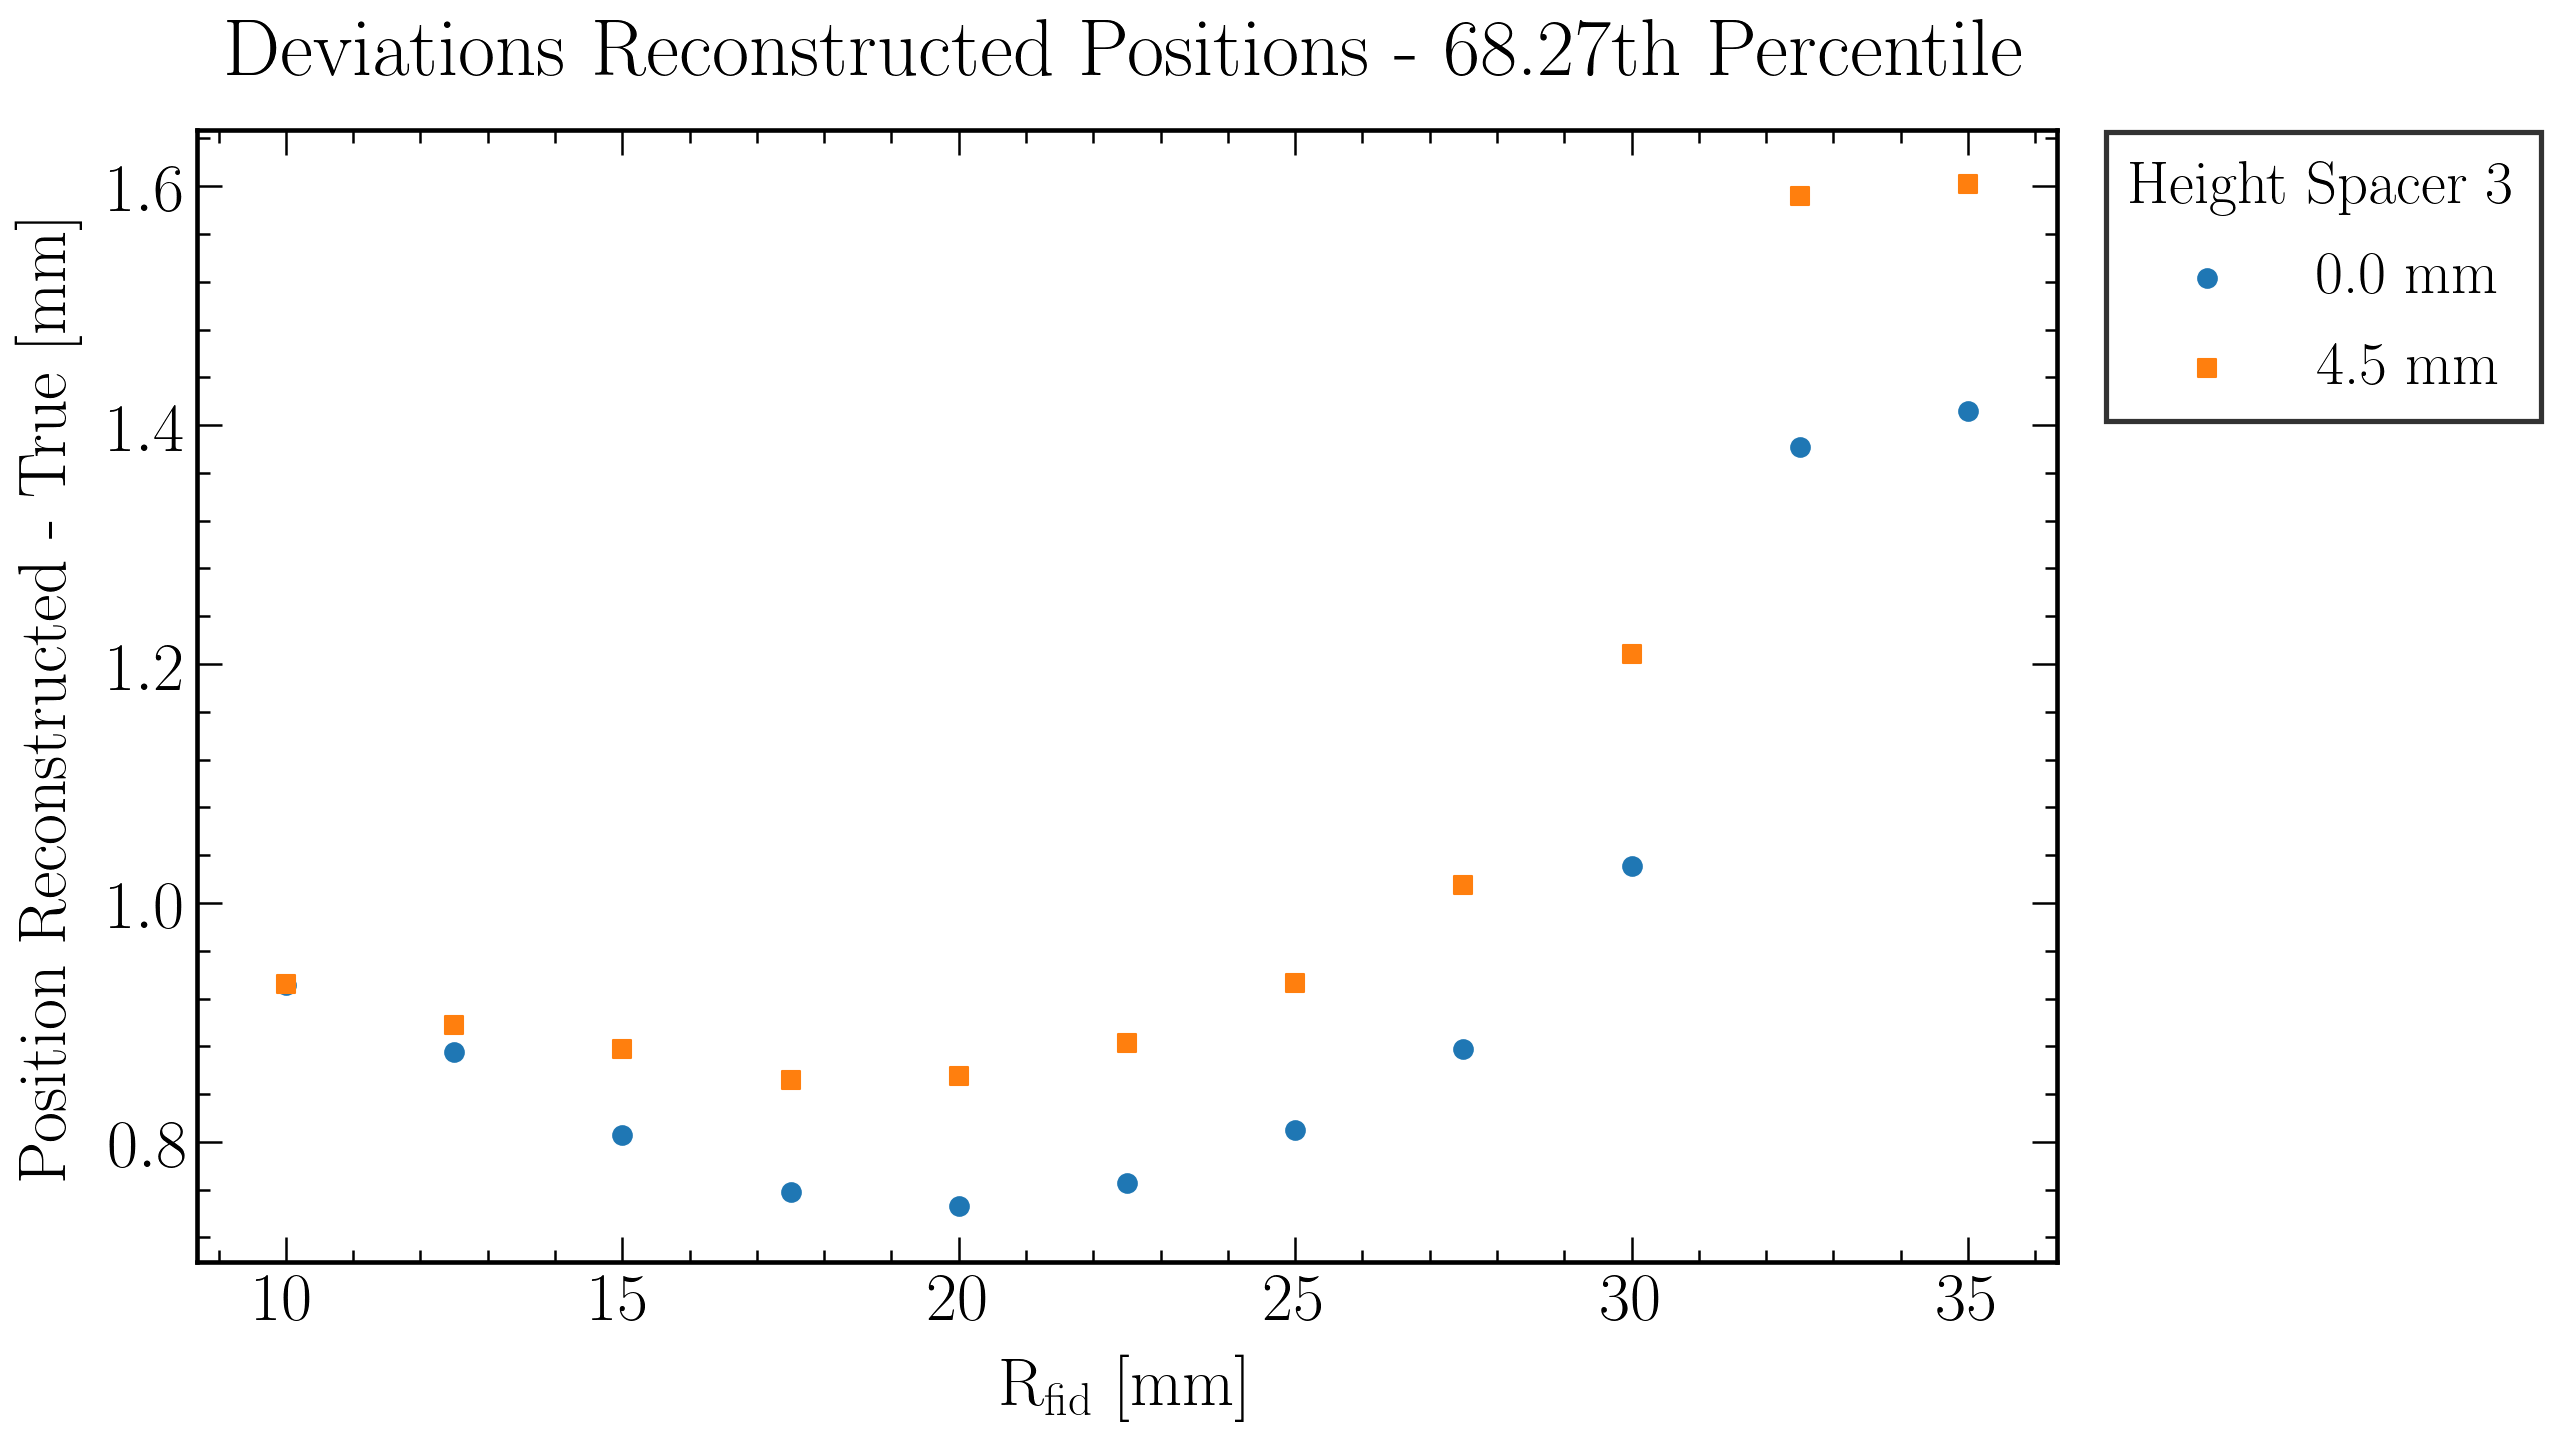

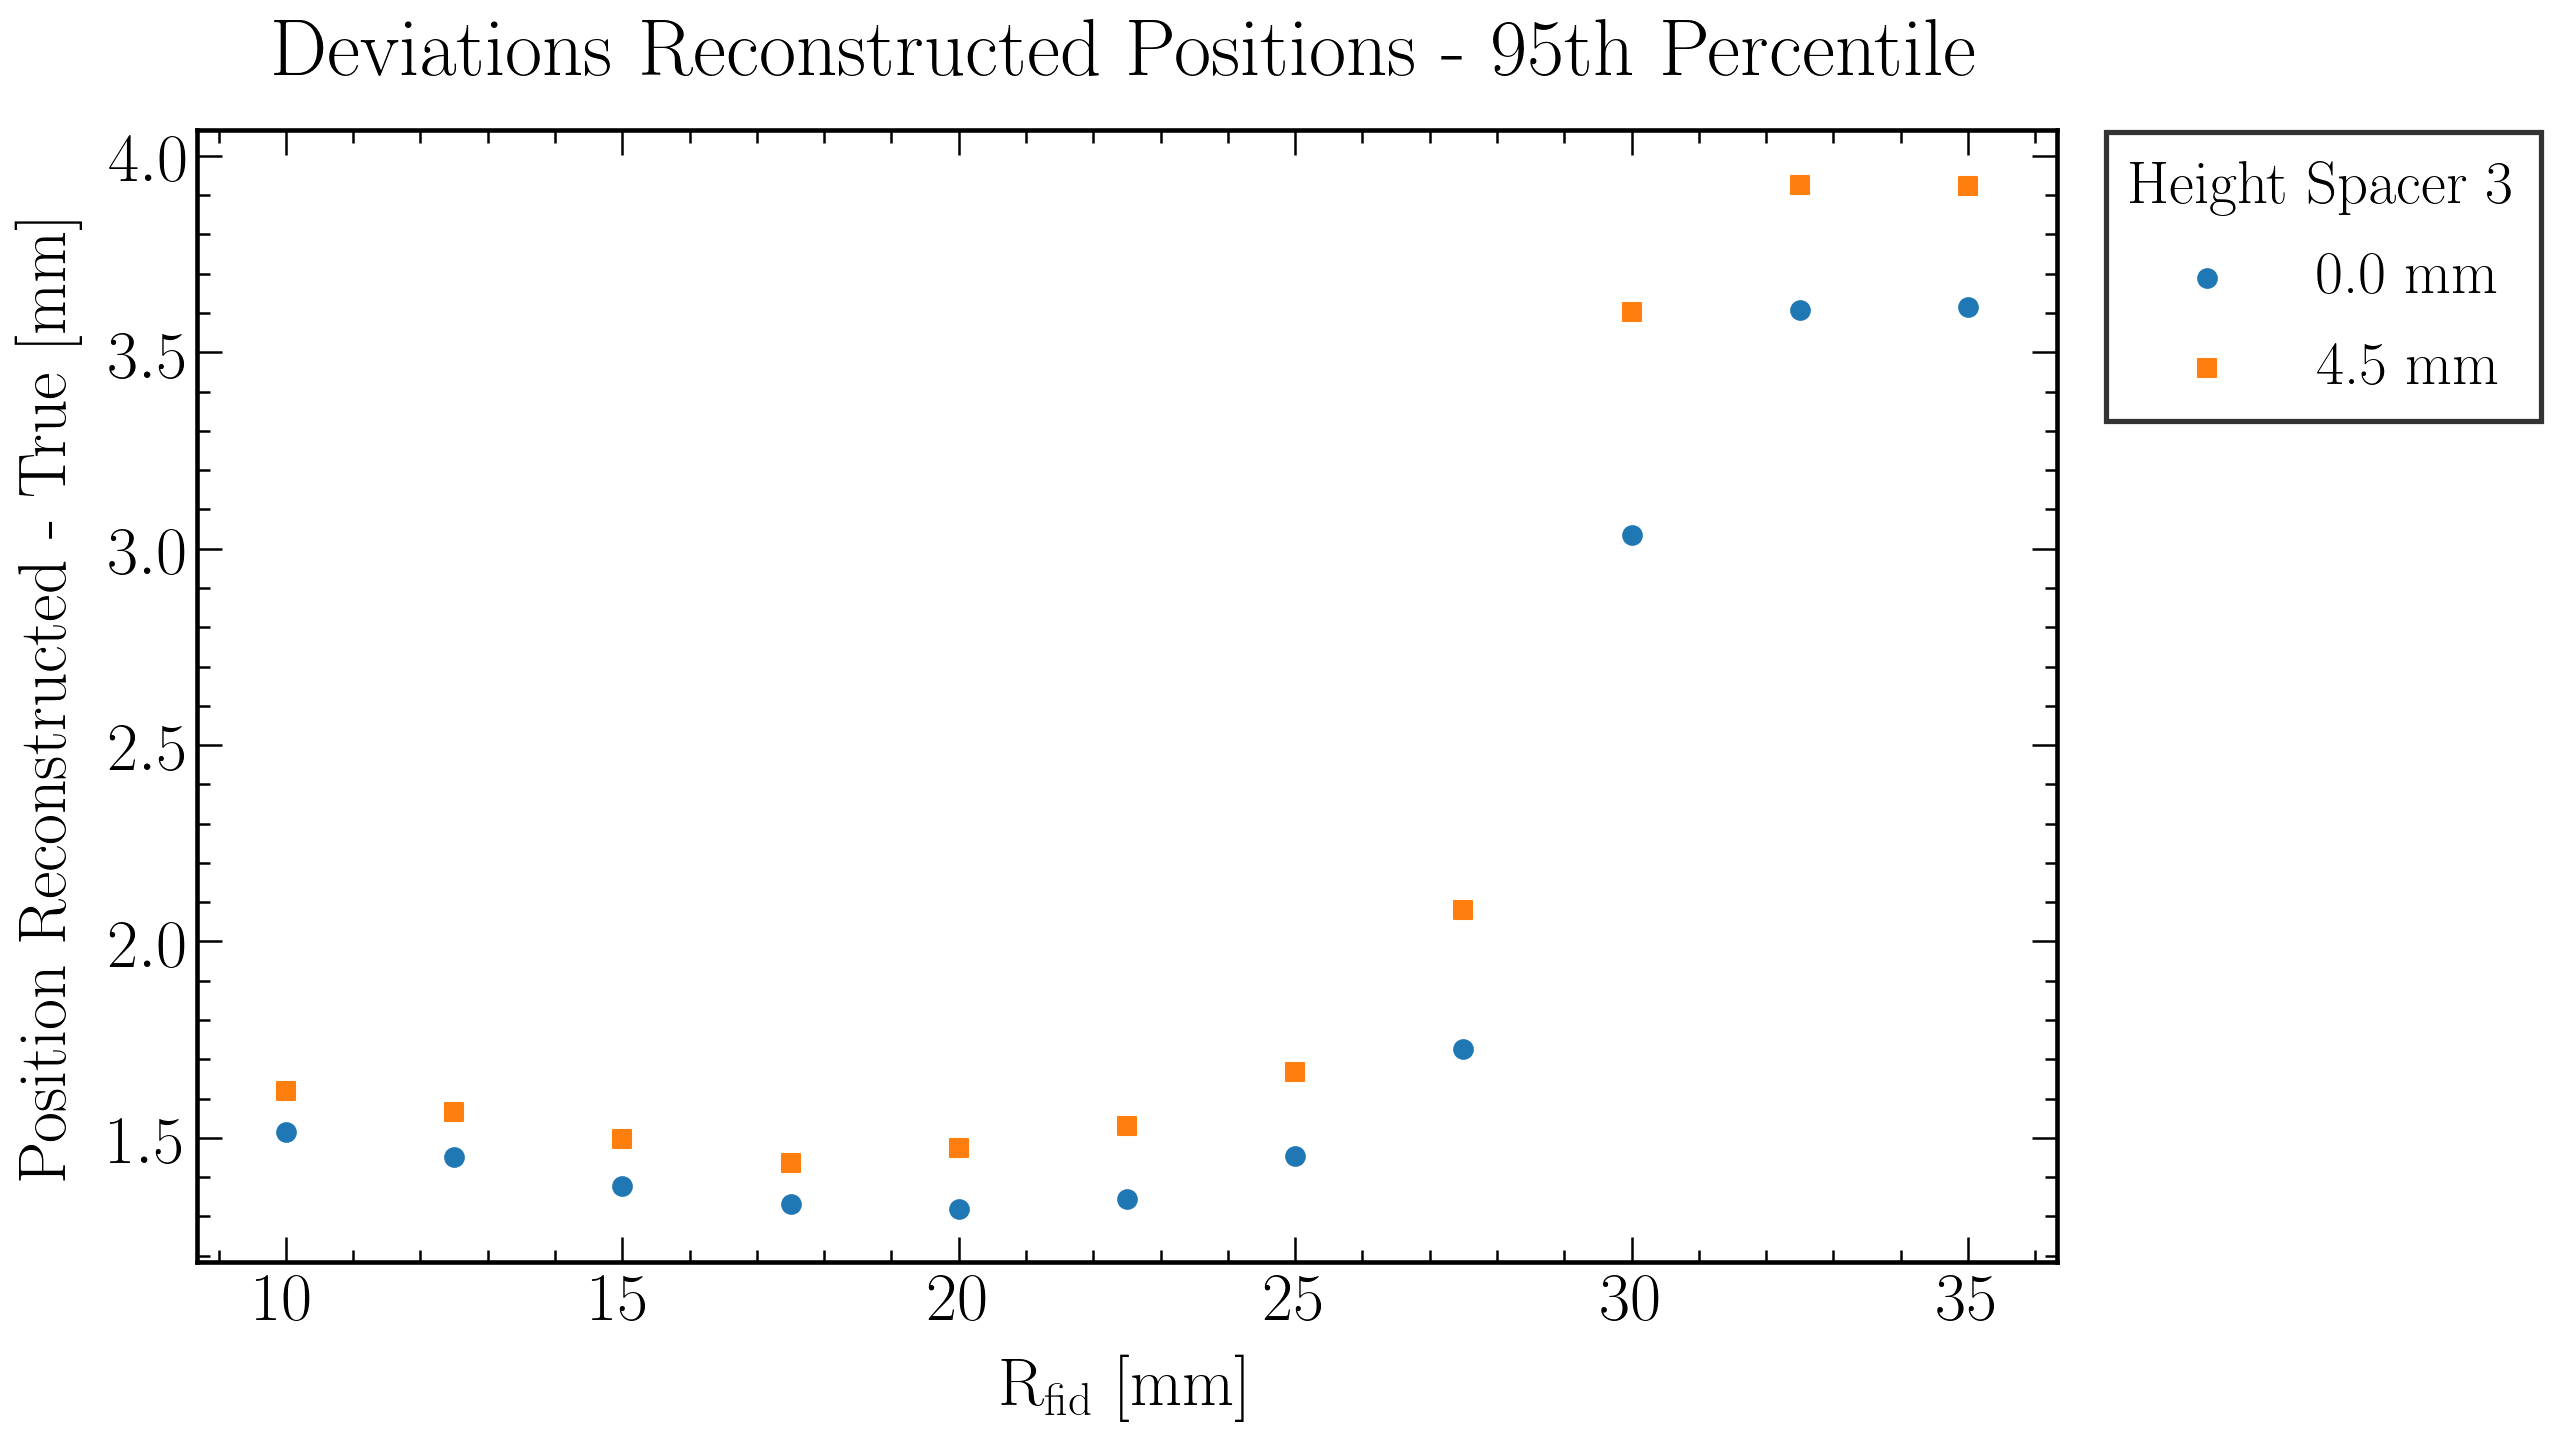

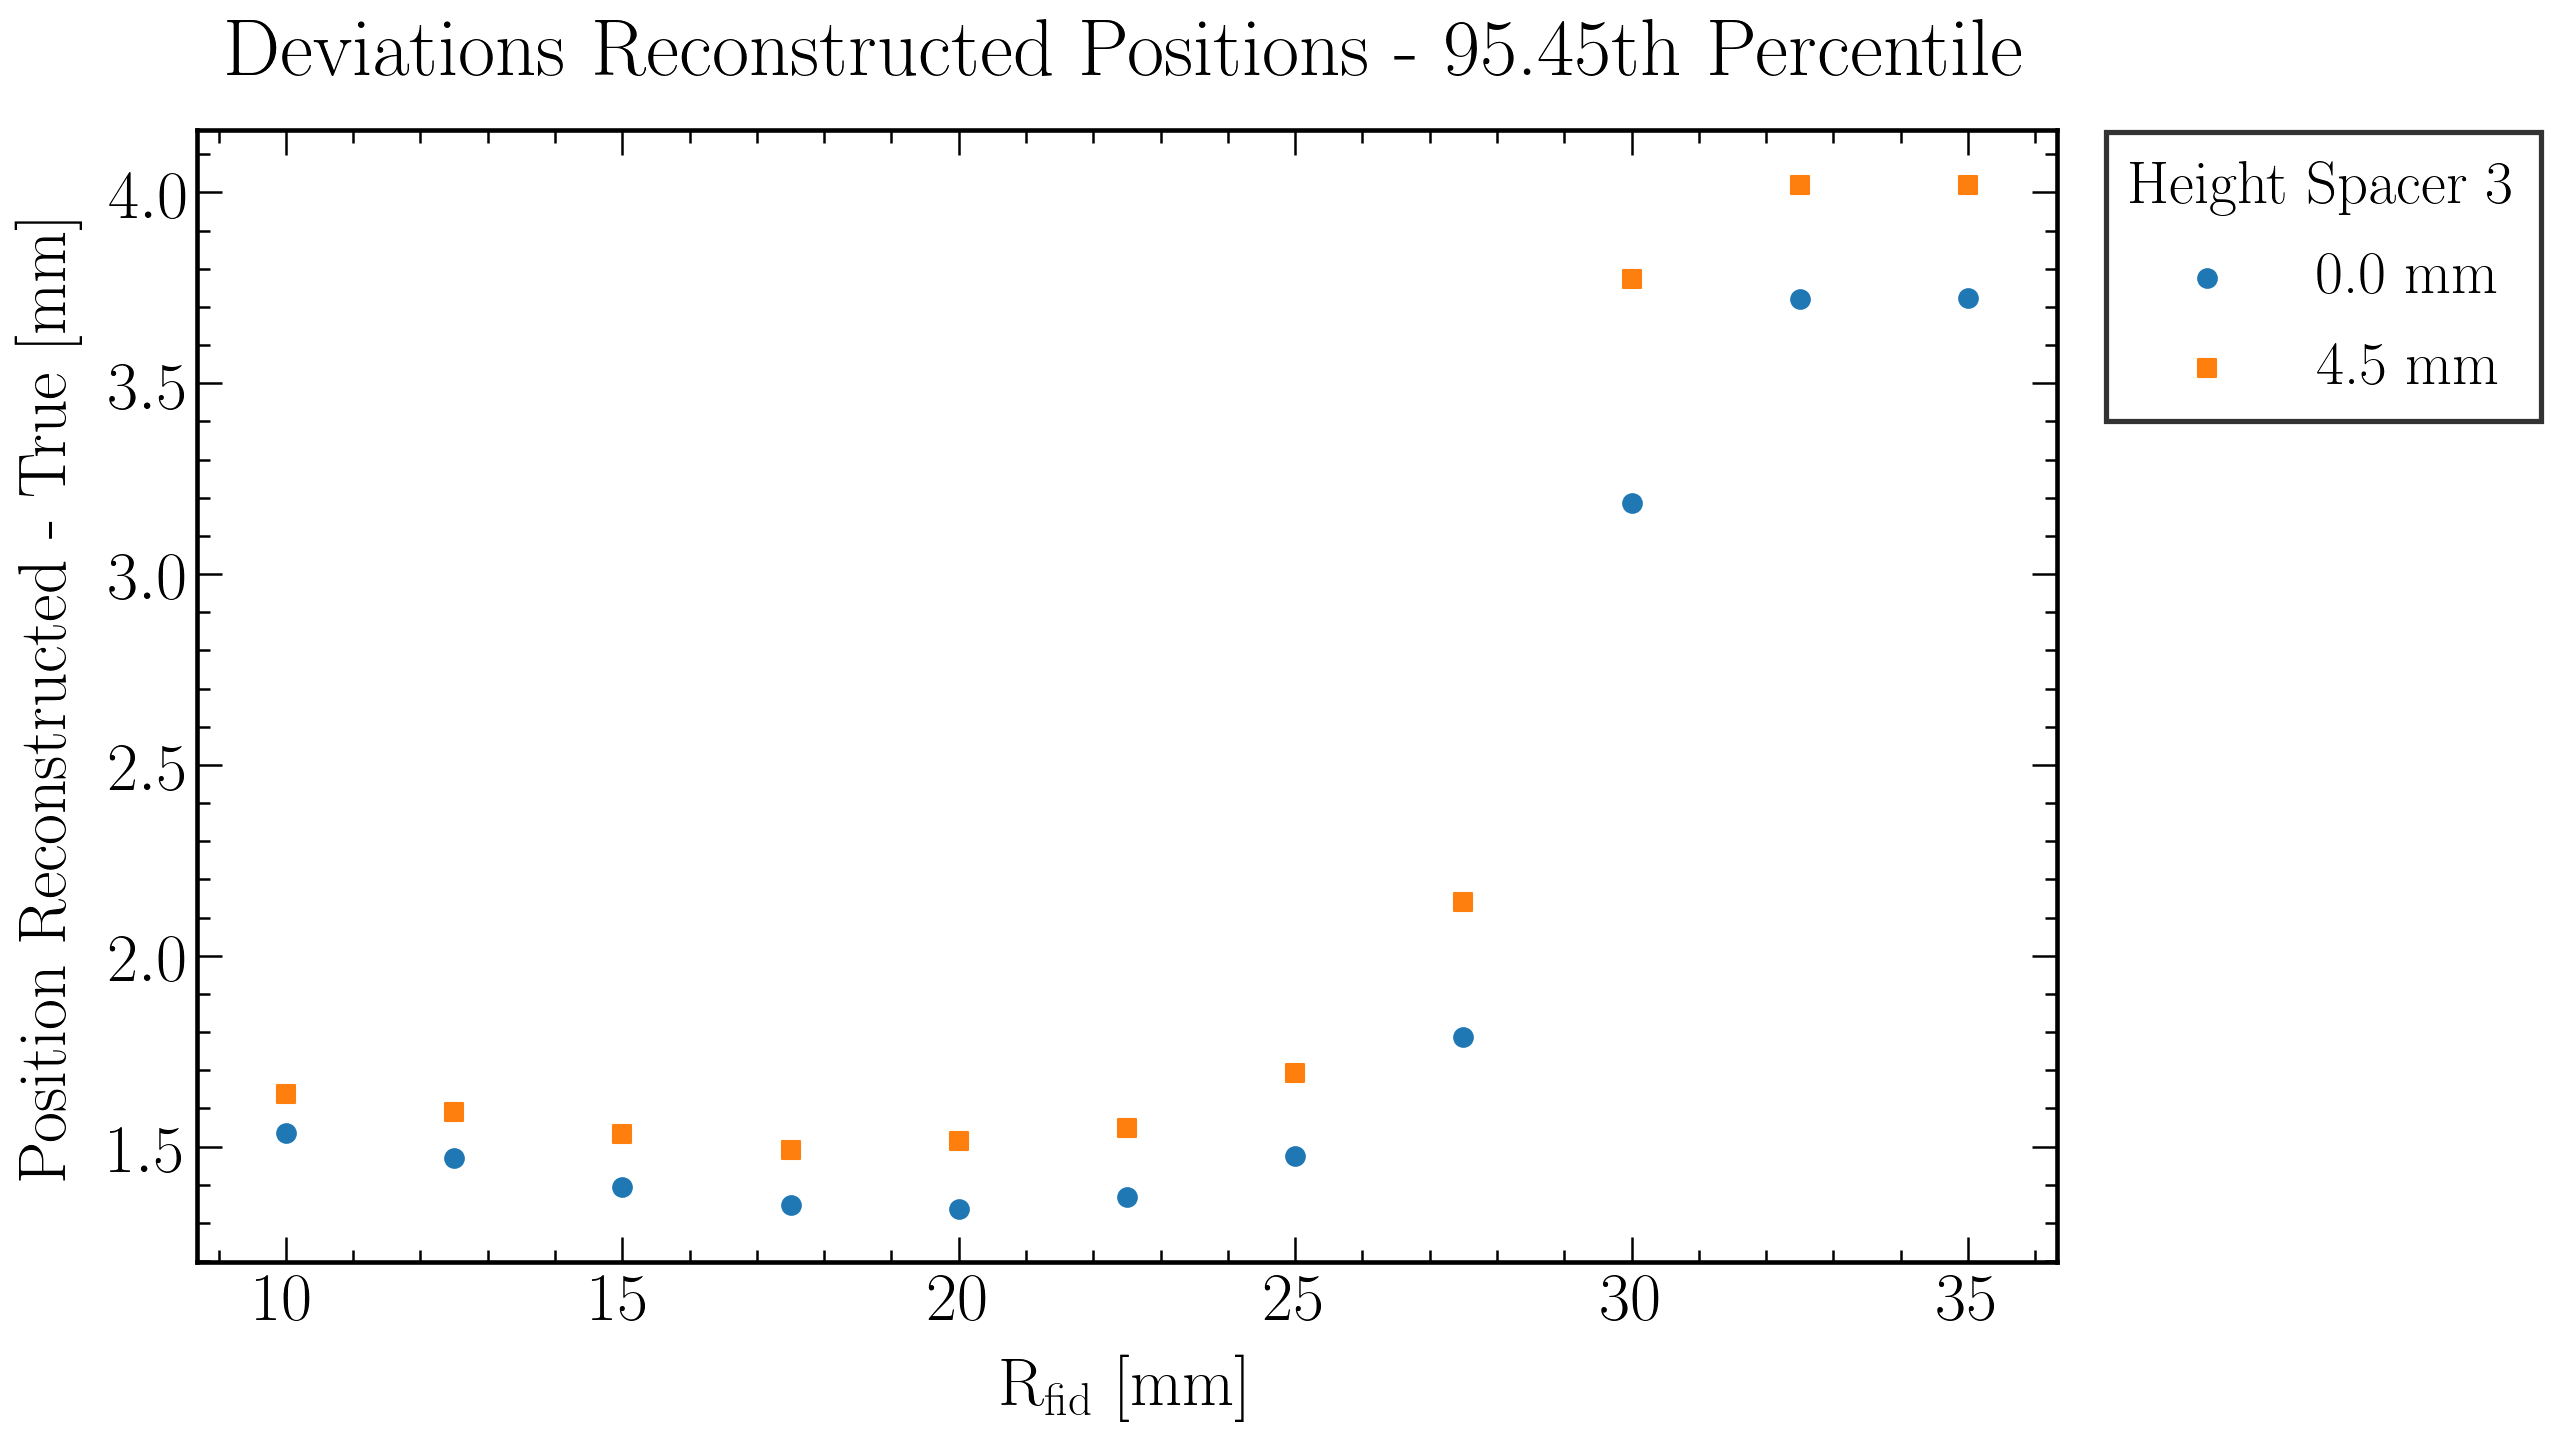

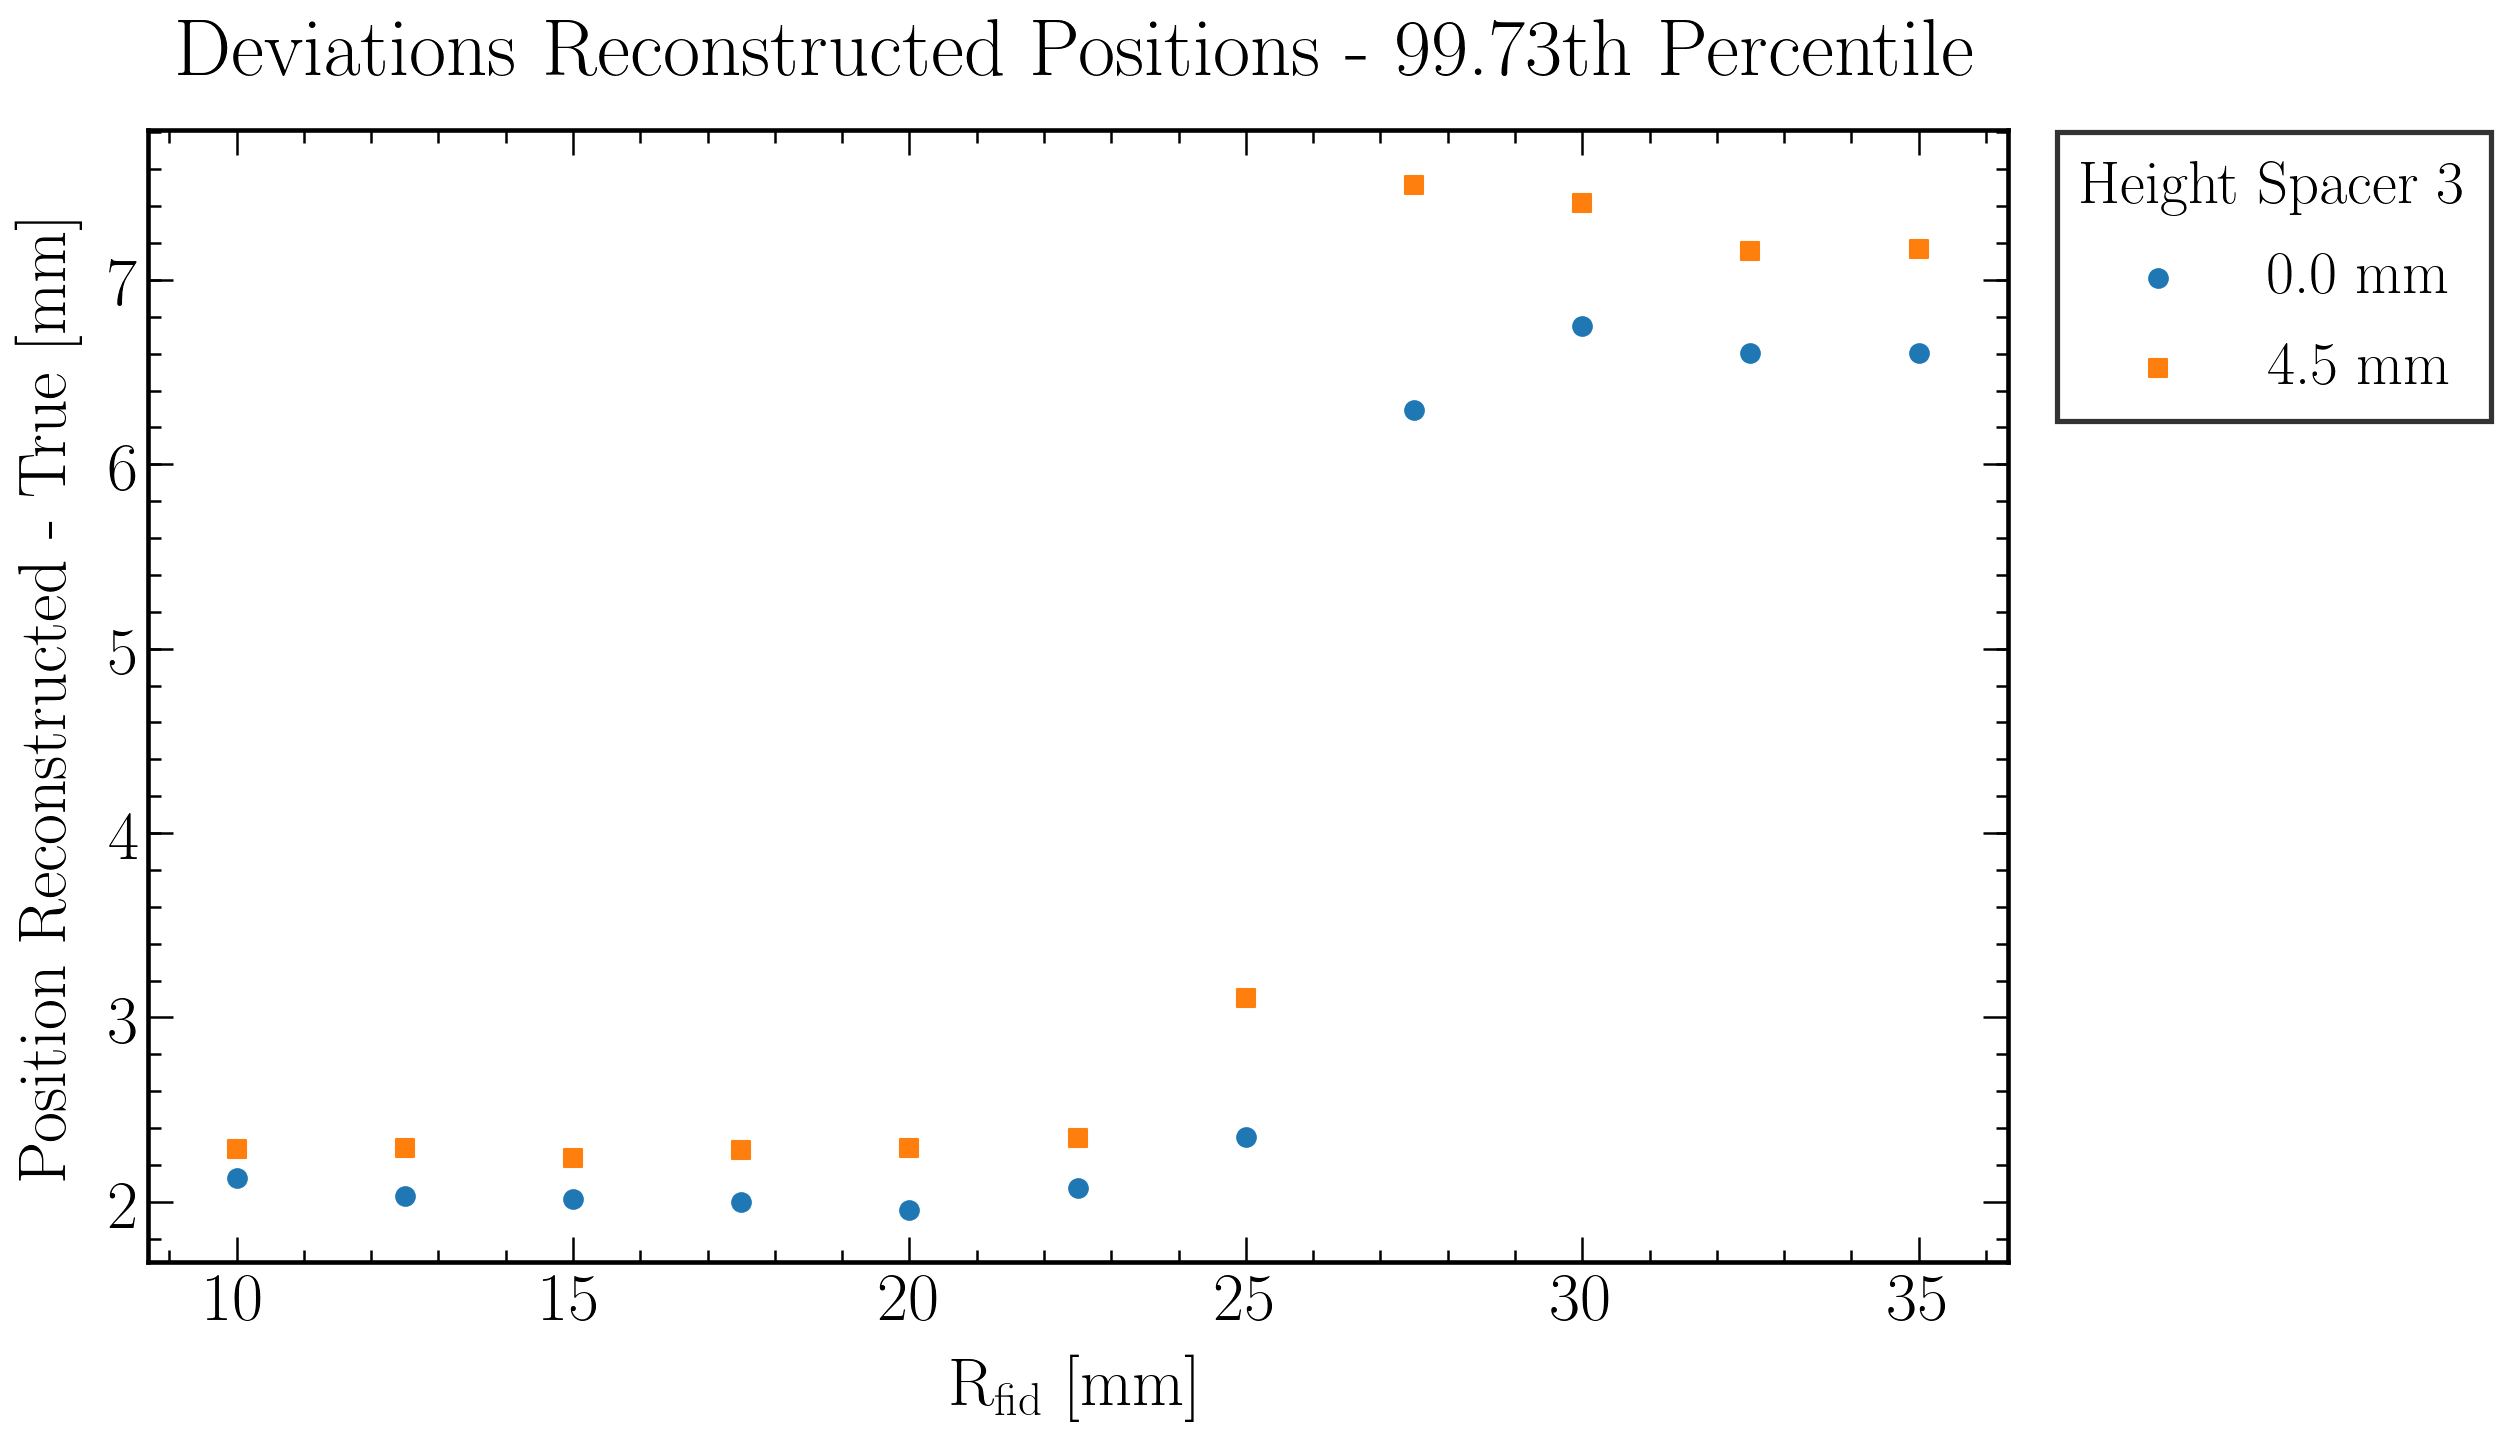

In [13]:
percentile_value_list = [50, 68.27, 95, 95.45, 99.73]

for percentile_value in percentile_value_list:    
    
    #############################################
    ## Set plot styles:
    #############################################

    fig=plt.figure(figsize=(16, 10), dpi=150)

    # Text options
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')

    # Labels
    label_size = 32.5 #25
    label_pad = 13 #10
    title_size = 39 #30
    title_pad = 26 #20

    # Axes Parameters
    axes = plt.gca()
    axes.tick_params(axis='both') 

    # Axes ---> Linewidth
    for axis in ['top','bottom','left','right']:
        axes.spines[axis].set_linewidth(2.2)

    # Axes ---> Ticks
    axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
    plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
    axes.yaxis.set_minor_locator(AutoMinorLocator(5))
    plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
    plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

    # Grid
    #plt.grid(True)

    #############################################
    ## Plot specific settings and plot data
    #############################################

    # Data plot

    x = df_00_NN['fid']
    y = df_00_NN['delta_'+str(percentile_value)+'_percentile']
    plt.scatter(x, y, label = ' 0.0 mm', color = 'C0', marker = 'o', s = 80)

    x = df_45_NN['fid']
    y = df_45_NN['delta_'+str(percentile_value)+'_percentile']
    plt.scatter(x, y, label = ' 4.5 mm', color = 'C1', marker = 's', s = 80)

    plt.ylabel('Position Reconstructed - True [mm]', fontsize = label_size, labelpad = label_pad)
    plt.xlabel('$\mathrm{R}_{\mathrm{fid}}$ [mm]', fontsize = label_size, labelpad = label_pad)
    plt.title('Deviations Reconstructed Positions - '+str(percentile_value)+'th Percentile', fontsize = title_size, pad = title_pad)

    # Legend
    leg = plt.legend(loc=2, bbox_to_anchor=(1.01,1.025), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
    leg.set_title("Height Spacer 3", prop = {'size':0.9*label_size})
    for line in leg.get_lines(): # enumerated
        line.set_linewidth(4)
    leg.get_frame().set_linewidth(2.5)

    fig.savefig("Comparison_Spacer3_NN_ReconstructedPosition_Deviations_"+str(percentile_value)+"Percentiles.png", bbox_inches = "tight")
    plt.show()

## Influence Spacer 3 Material

In [14]:
df_PTFE005 = pd.read_pickle('/media/ab602/TOSHIBA EXT/Thesis/Simulation_Outputs/Position_Reconstruction_LRF/optPhot_S2_3.0e+07_pmtGap4.5_RPTFE0.95_LXeAbs100_Tmesh0.89770509_writeEmptyFalse_Spacer3_PTFEUnpolished005_ReconstructedPosition_Deviations_Iterative_Reconstruciton_iteration_1_rfiducial_20_rfiducial_under_15_eta_v2.pkl')
df_PTFE025 = pd.read_pickle('/media/ab602/TOSHIBA EXT/Thesis/Simulation_Outputs/Position_Reconstruction_LRF/optPhot_S2_3.0e+07_pmtGap4.5_RPTFE0.95_LXeAbs100_Tmesh0.89770509_writeEmptyFalse_Spacer3_PTFEUnpolished025_ReconstructedPosition_Deviations_Iterative_Reconstruciton_iteration_1_rfiducial_20_rfiducial_under_15_eta_v2.pkl')
df_PTFE050 = pd.read_pickle('/media/ab602/TOSHIBA EXT/Thesis/Simulation_Outputs/Position_Reconstruction_LRF/optPhot_S2_3.0e+07_pmtGap4.5_RPTFE0.95_LXeAbs100_Tmesh0.89770509_writeEmptyFalse_Spacer3_PTFEUnpolished050_ReconstructedPosition_Deviations_Iterative_Reconstruciton_iteration_1_rfiducial_20_rfiducial_under_15_eta_v2.pkl')
df_PTFE057 = pd.read_pickle('/media/ab602/TOSHIBA EXT/Thesis/Simulation_Outputs/Position_Reconstruction_LRF/optPhot_S2_3.0e+07_pmtGap4.5_RPTFE0.95_LXeAbs100_Tmesh0.89770509_writeEmptyFalse_Spacer3_PTFEUnpolished057_ReconstructedPosition_Deviations_Iterative_Reconstruciton_iteration_1_rfiducial_20_rfiducial_under_15_eta_v2.pkl')
df_PTFE075 = pd.read_pickle('/media/ab602/TOSHIBA EXT/Thesis/Simulation_Outputs/Position_Reconstruction_LRF/optPhot_S2_3.0e+07_pmtGap4.5_RPTFE0.95_LXeAbs100_Tmesh0.89770509_writeEmptyFalse_Spacer3_PTFEUnpolished075_ReconstructedPosition_Deviations_Iterative_Reconstruciton_iteration_1_rfiducial_20_rfiducial_under_15_eta_v2.pkl')
df_PTFE095 = pd.read_pickle('/media/ab602/TOSHIBA EXT/Thesis/Simulation_Outputs/Position_Reconstruction_LRF/optPhot_S2_3.0e+07_pmtGap4.5_RPTFE0.95_LXeAbs100_Tmesh0.89770509_writeEmptyFalse_Spacer3_PTFEUnpolished095_ReconstructedPosition_Deviations_Iterative_Reconstruciton_iteration_1_rfiducial_20_rfiducial_under_15_eta_v2.pkl')
df_SS      = pd.read_pickle('/media/ab602/TOSHIBA EXT/Thesis/Simulation_Outputs/Position_Reconstruction_LRF/optPhot_S2_3.0e+07_pmtGap4.5_RPTFE0.95_LXeAbs100_Tmesh0.89770509_writeEmptyFalse_Spacer3_SS_ReconstructedPosition_Deviations_Iterative_Reconstruciton_iteration_1_rfiducial_20_rfiducial_under_15_eta_v2.pkl')

In [15]:
df_PTFE095

,fid,sigma_x,sigma_y,delta_mean,delta_50_percentile,delta_68.27_percentile,delta_95_percentile,delta_95.45_percentile,delta_99.73_percentile
0,10.0,0.990263,0.736602,1.103149,1.051256,1.340972,2.094284,2.109188,2.629985
1,12.5,0.969162,0.714182,1.079890,1.025567,1.296830,2.027327,2.041366,2.609671
2,15.0,0.939218,0.717493,1.057404,1.000803,1.272205,1.999425,2.017678,2.625447
3,17.5,0.890006,0.700883,1.008348,0.945194,1.234329,1.960334,1.991650,2.601294
4,20.0,0.850395,0.699762,0.978734,0.914221,1.185203,1.872229,1.922767,2.608359
5,22.5,0.841371,0.711149,0.975651,0.902318,1.177352,1.933661,1.963663,2.658207
6,25.0,0.941144,0.878979,1.040603,0.923294,1.213404,2.012232,2.042320,9.738340
7,27.5,1.500956,1.669467,1.507350,1.030599,1.383693,5.956709,6.219091,9.684971
8,30.0,1.761459,1.889416,1.847556,1.205009,1.720191,6.115884,6.248508,9.586013
9,32.5,1.773018,1.866182,1.874694,1.258258,1.816162,5.961181,6.135101,9.535463


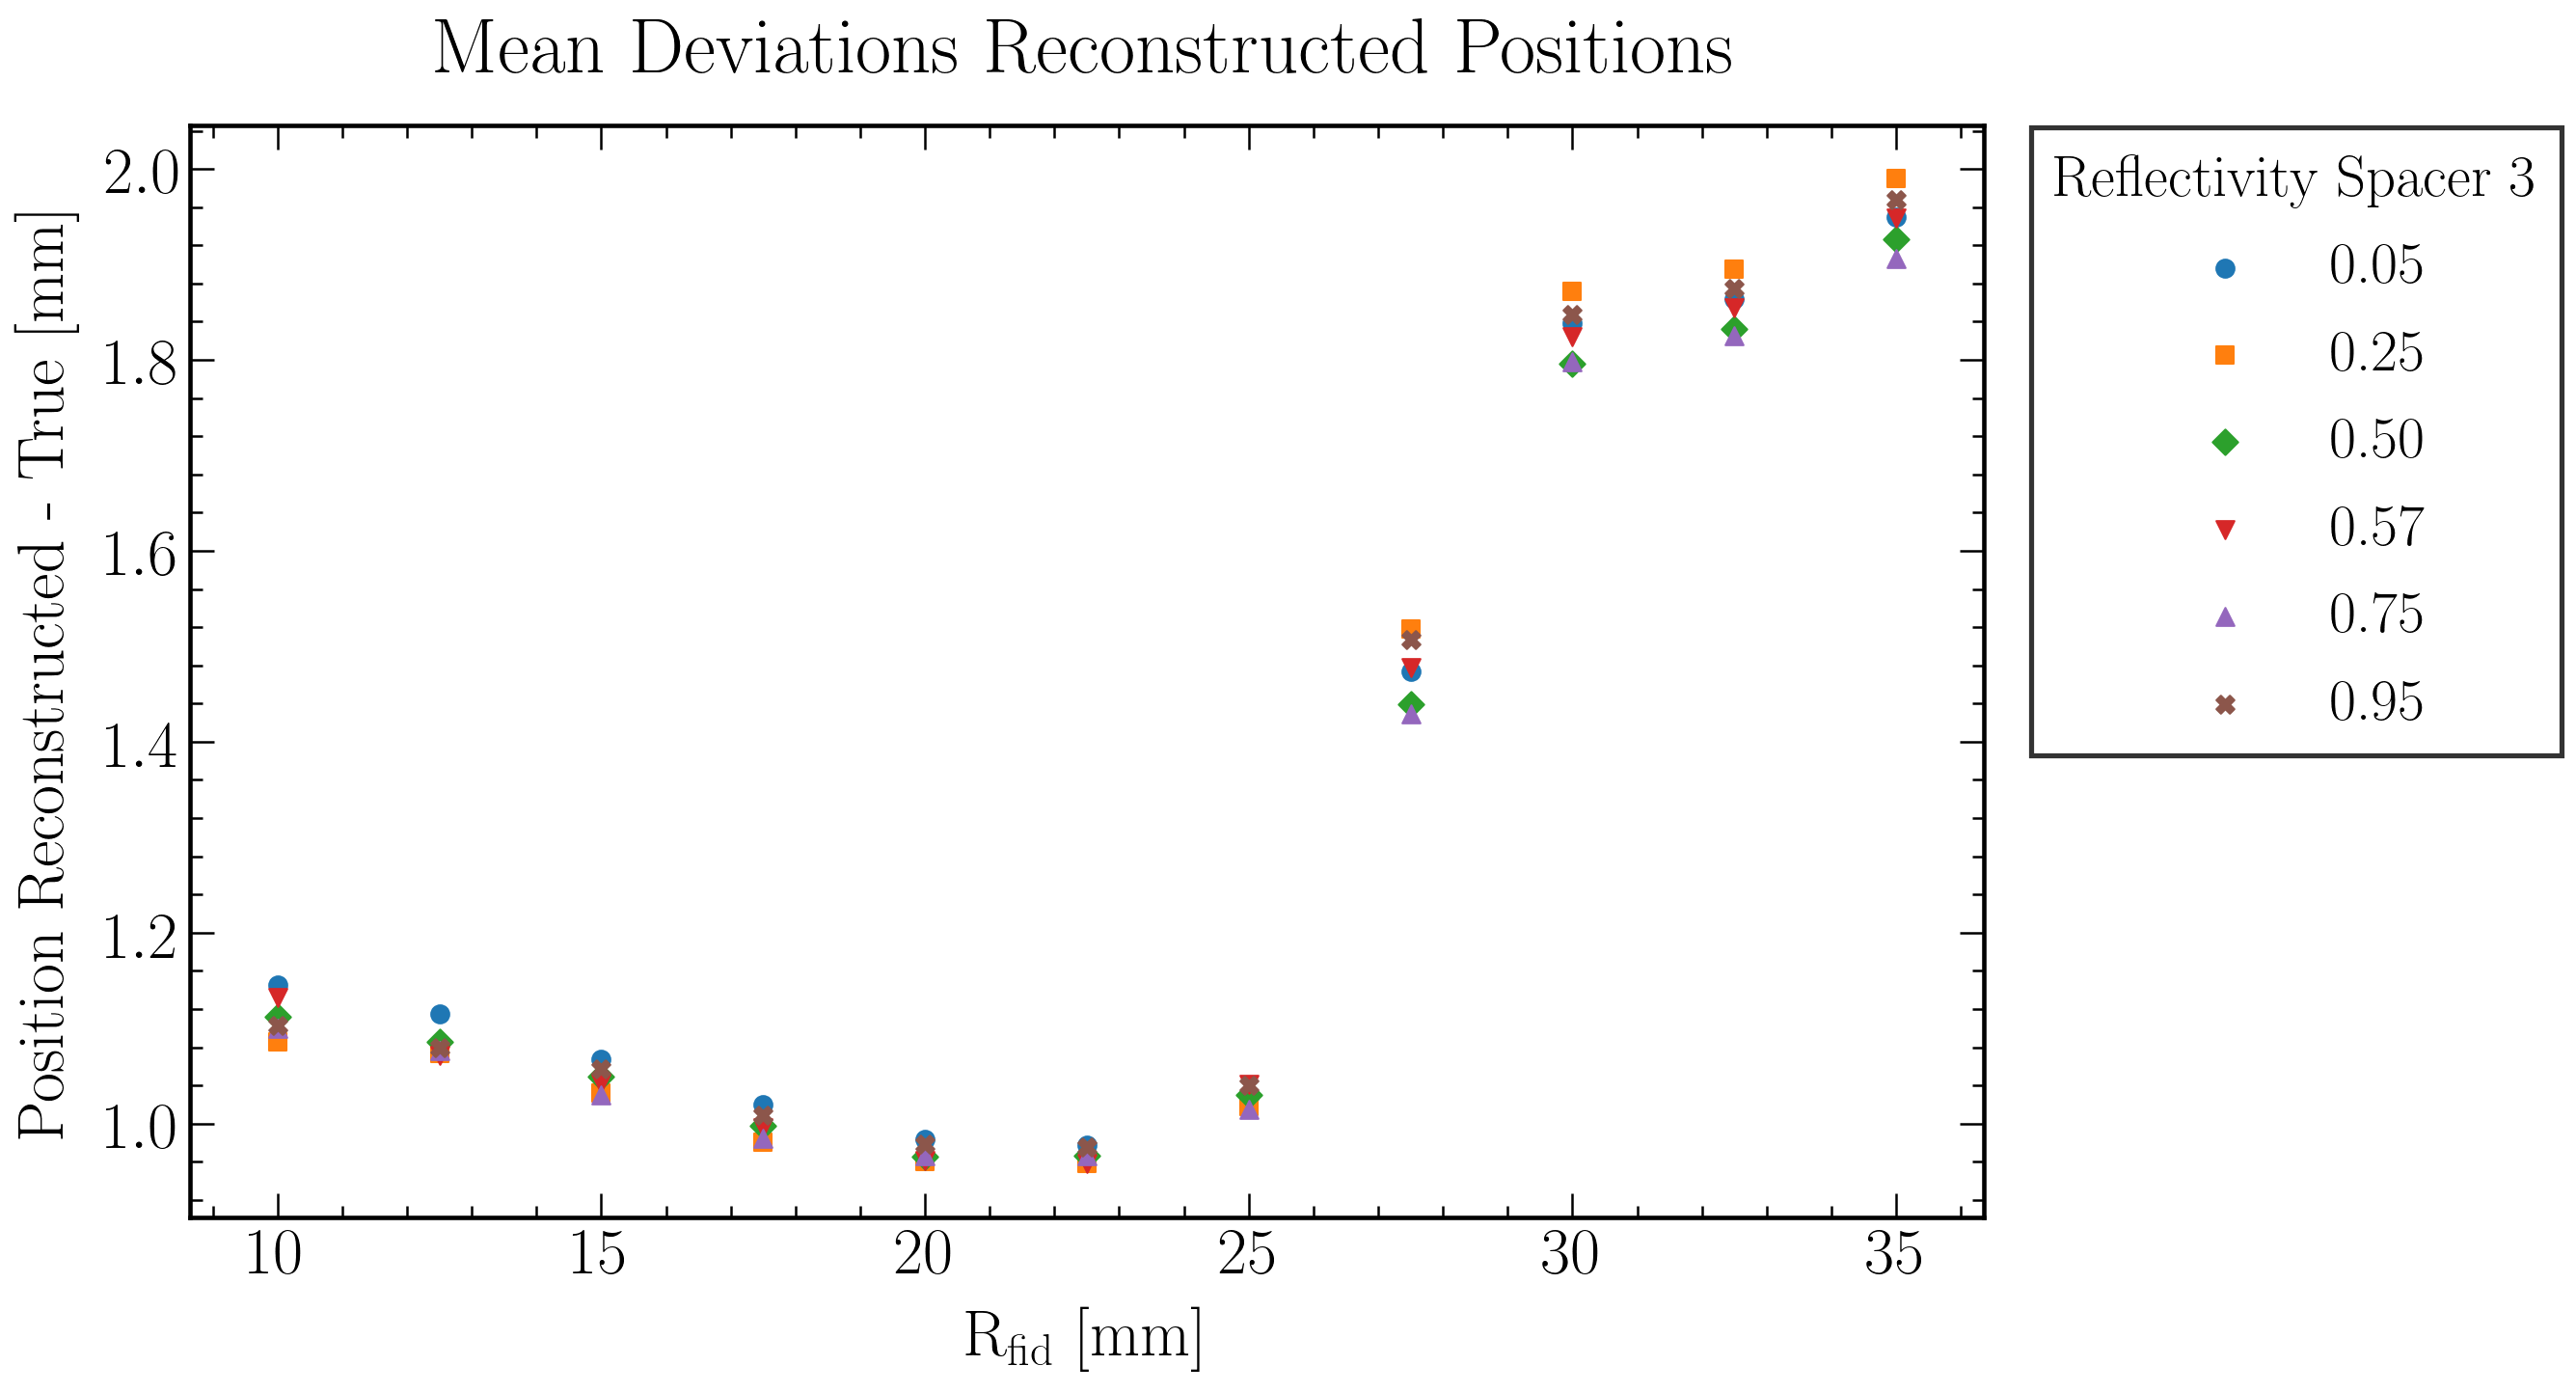

In [16]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

x = df_PTFE005['fid']
y = df_PTFE005['delta_mean']
plt.scatter(x, y, label = '0.05', color = 'C0', marker = 'o', s = 80)

x = df_PTFE025['fid']
y = df_PTFE025['delta_mean']
plt.scatter(x, y, label = '0.25', color = 'C1', marker = 's', s = 80)

x = df_PTFE050['fid']
y = df_PTFE050['delta_mean']
plt.scatter(x, y, label = '0.50', color = 'C2', marker = 'D', s = 80)

x = df_PTFE057['fid']
y = df_PTFE057['delta_mean']
plt.scatter(x, y, label = '0.57', color = 'C3', marker = 'v', s = 80)

x = df_PTFE075['fid']
y = df_PTFE075['delta_mean']
plt.scatter(x, y, label = '0.75', color = 'C4', marker = '^', s = 80)

x = df_PTFE095['fid']
y = df_PTFE095['delta_mean']
plt.scatter(x, y, label = '0.95', color = 'C5', marker = 'X', s = 80)
    
plt.ylabel('Position Reconstructed - True [mm]', fontsize = label_size, labelpad = label_pad)
plt.xlabel('$\mathrm{R}_{\mathrm{fid}}$ [mm]', fontsize = label_size, labelpad = label_pad)
plt.title('Mean Deviations Reconstructed Positions', fontsize = title_size, pad = title_pad)

# Legend
leg = plt.legend(loc=2, bbox_to_anchor=(1.01,1.025), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
leg.set_title("Reflectivity Spacer 3", prop = {'size':0.9*label_size})
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

fig.savefig("Comparison_Spacer3Reflectivity_LRF_ReconstructedPosition_Deviations_Mean.png", bbox_inches = "tight")
plt.show()

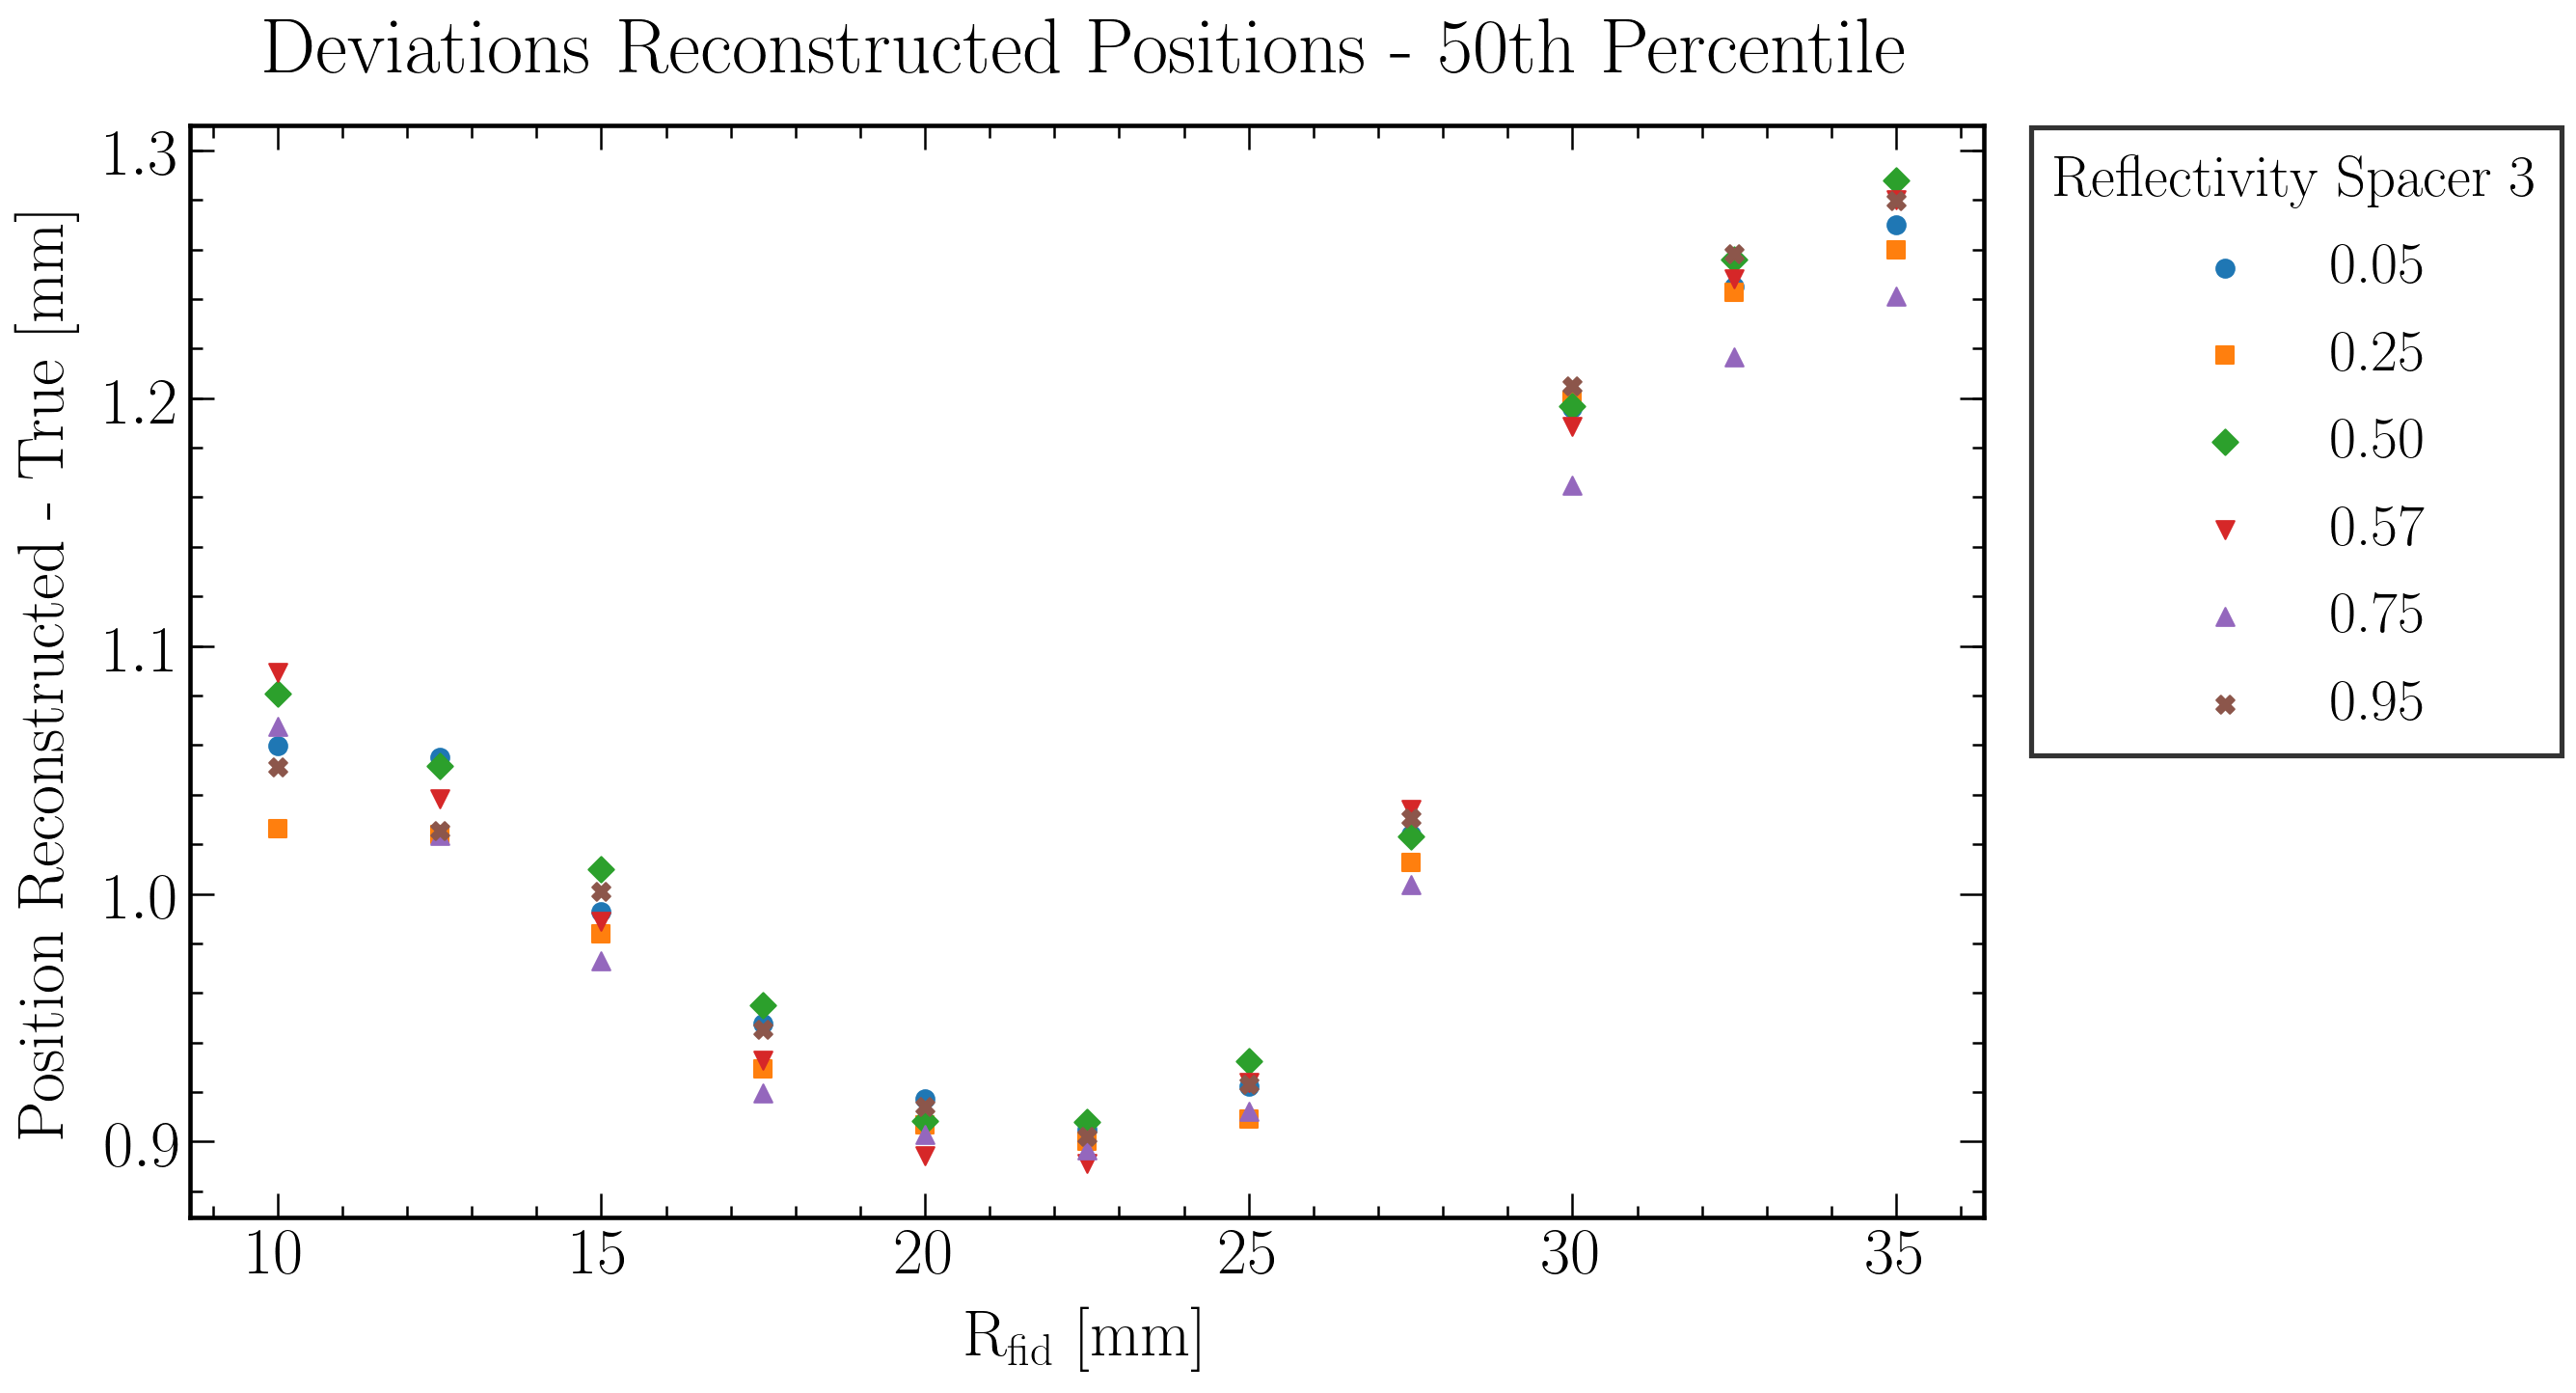

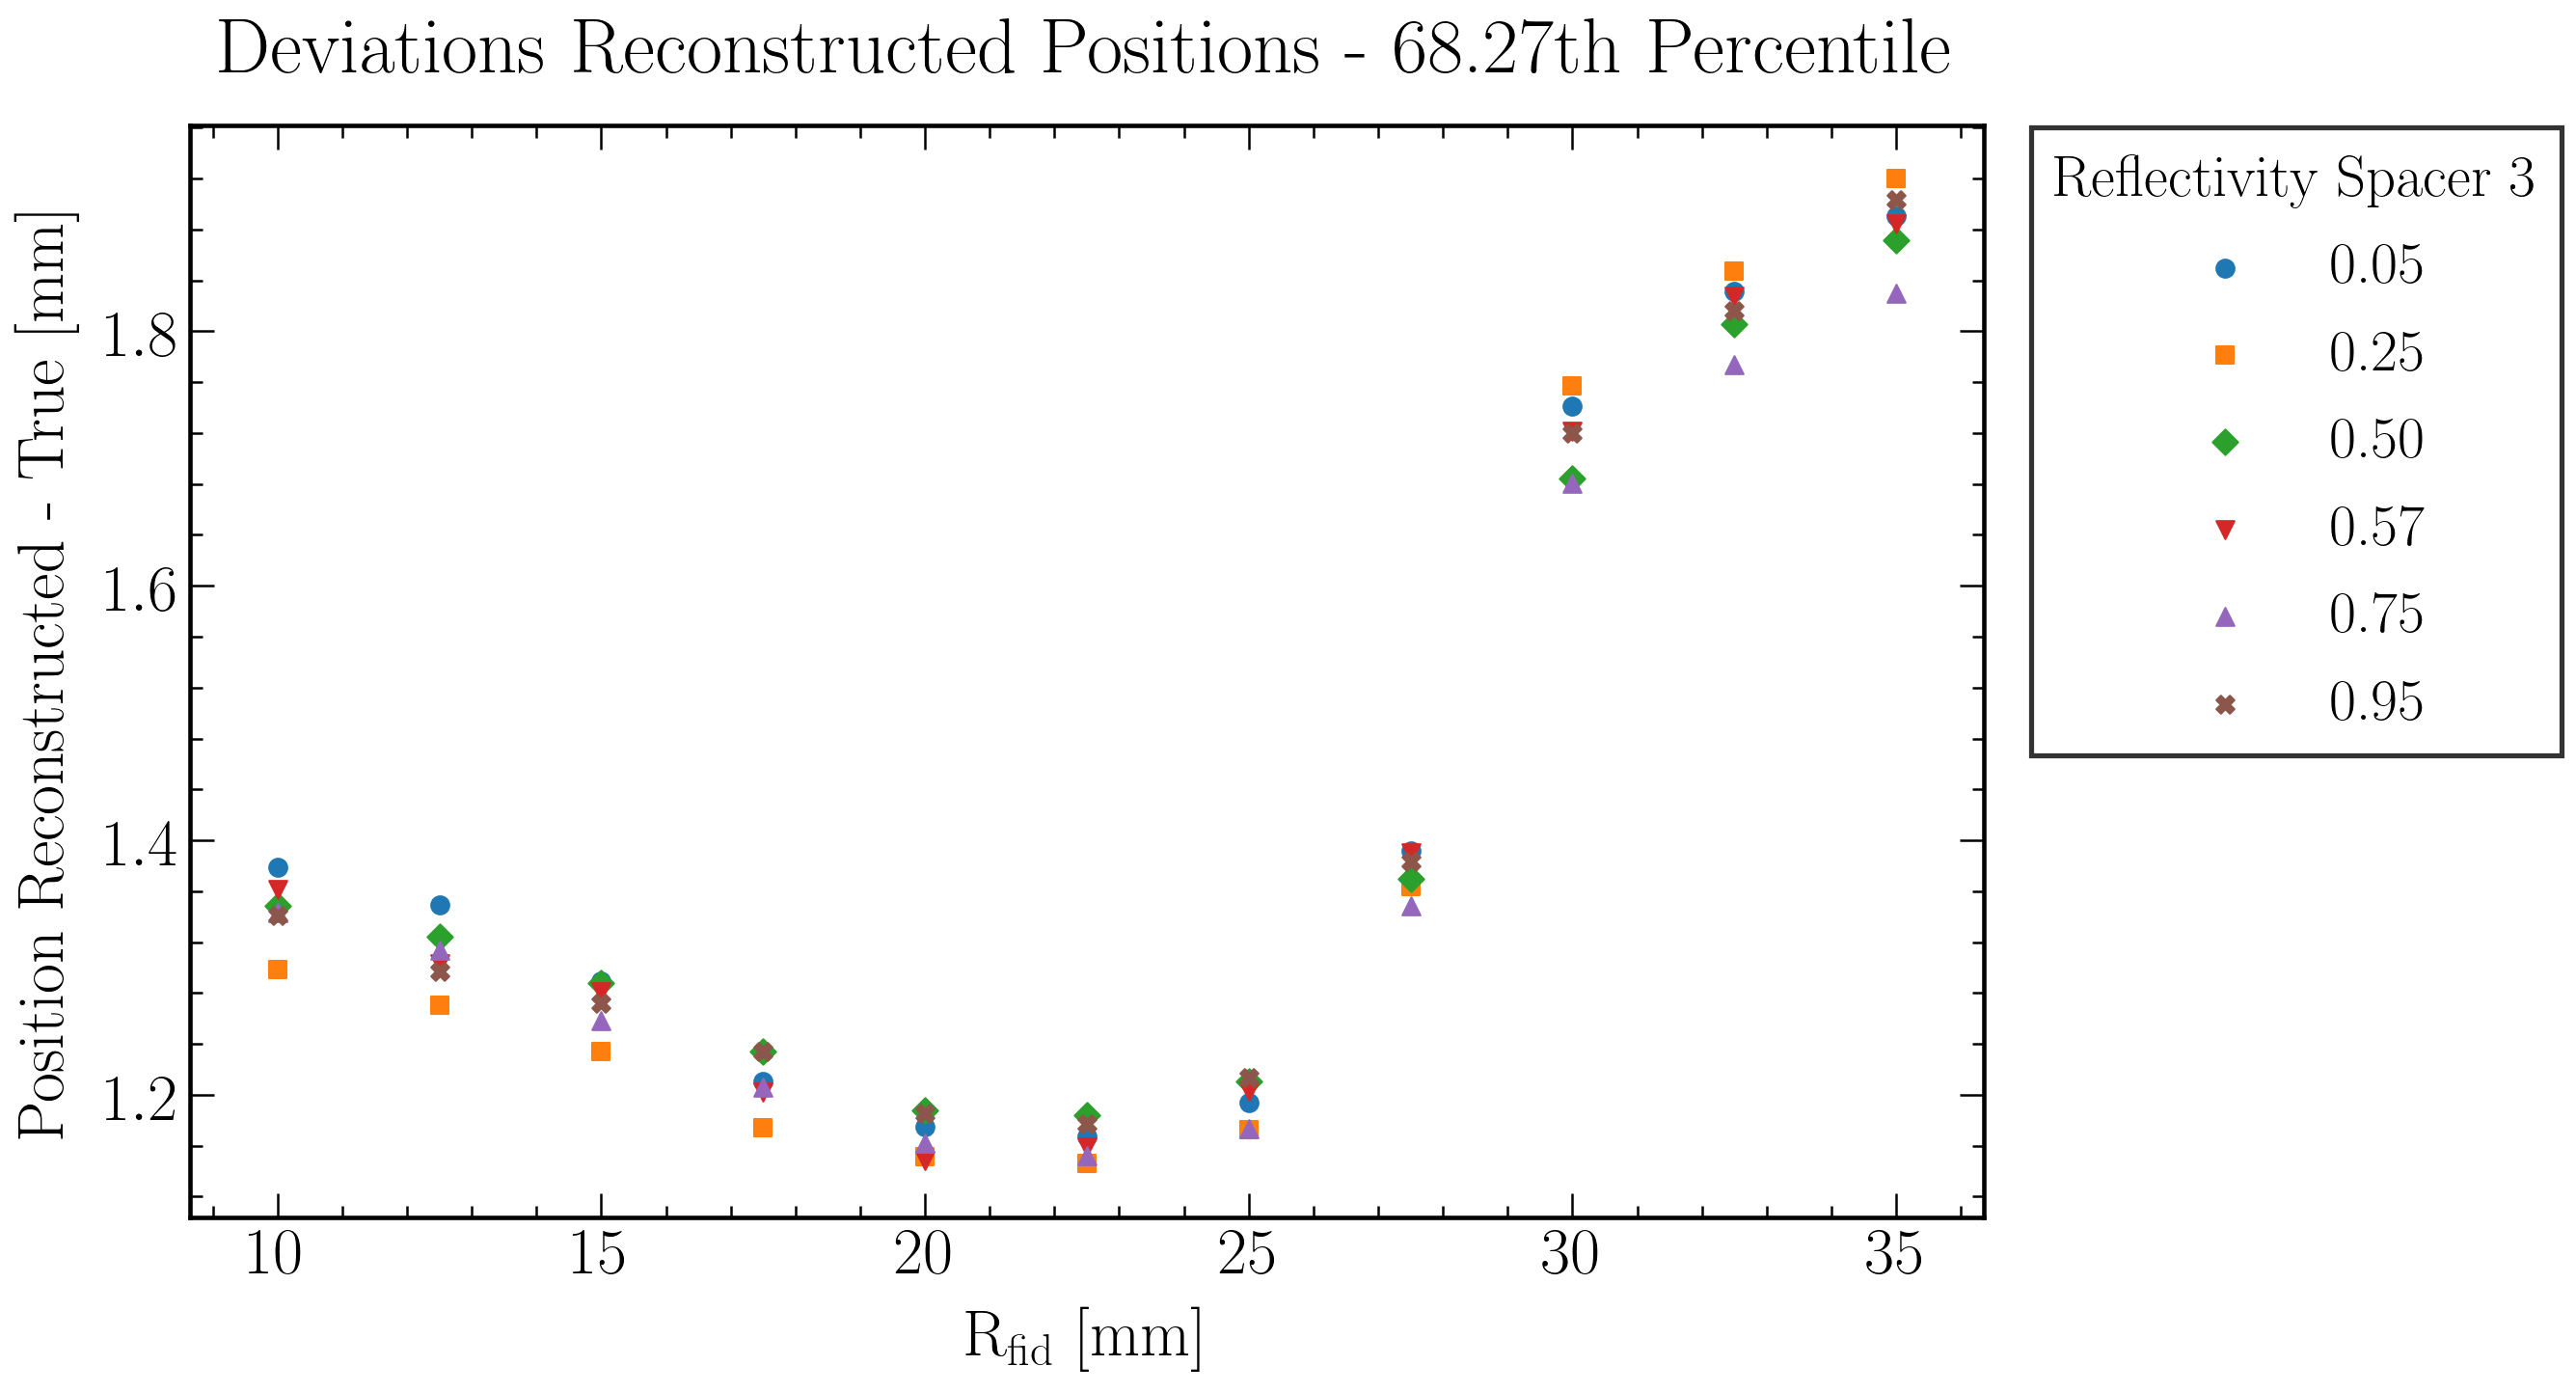

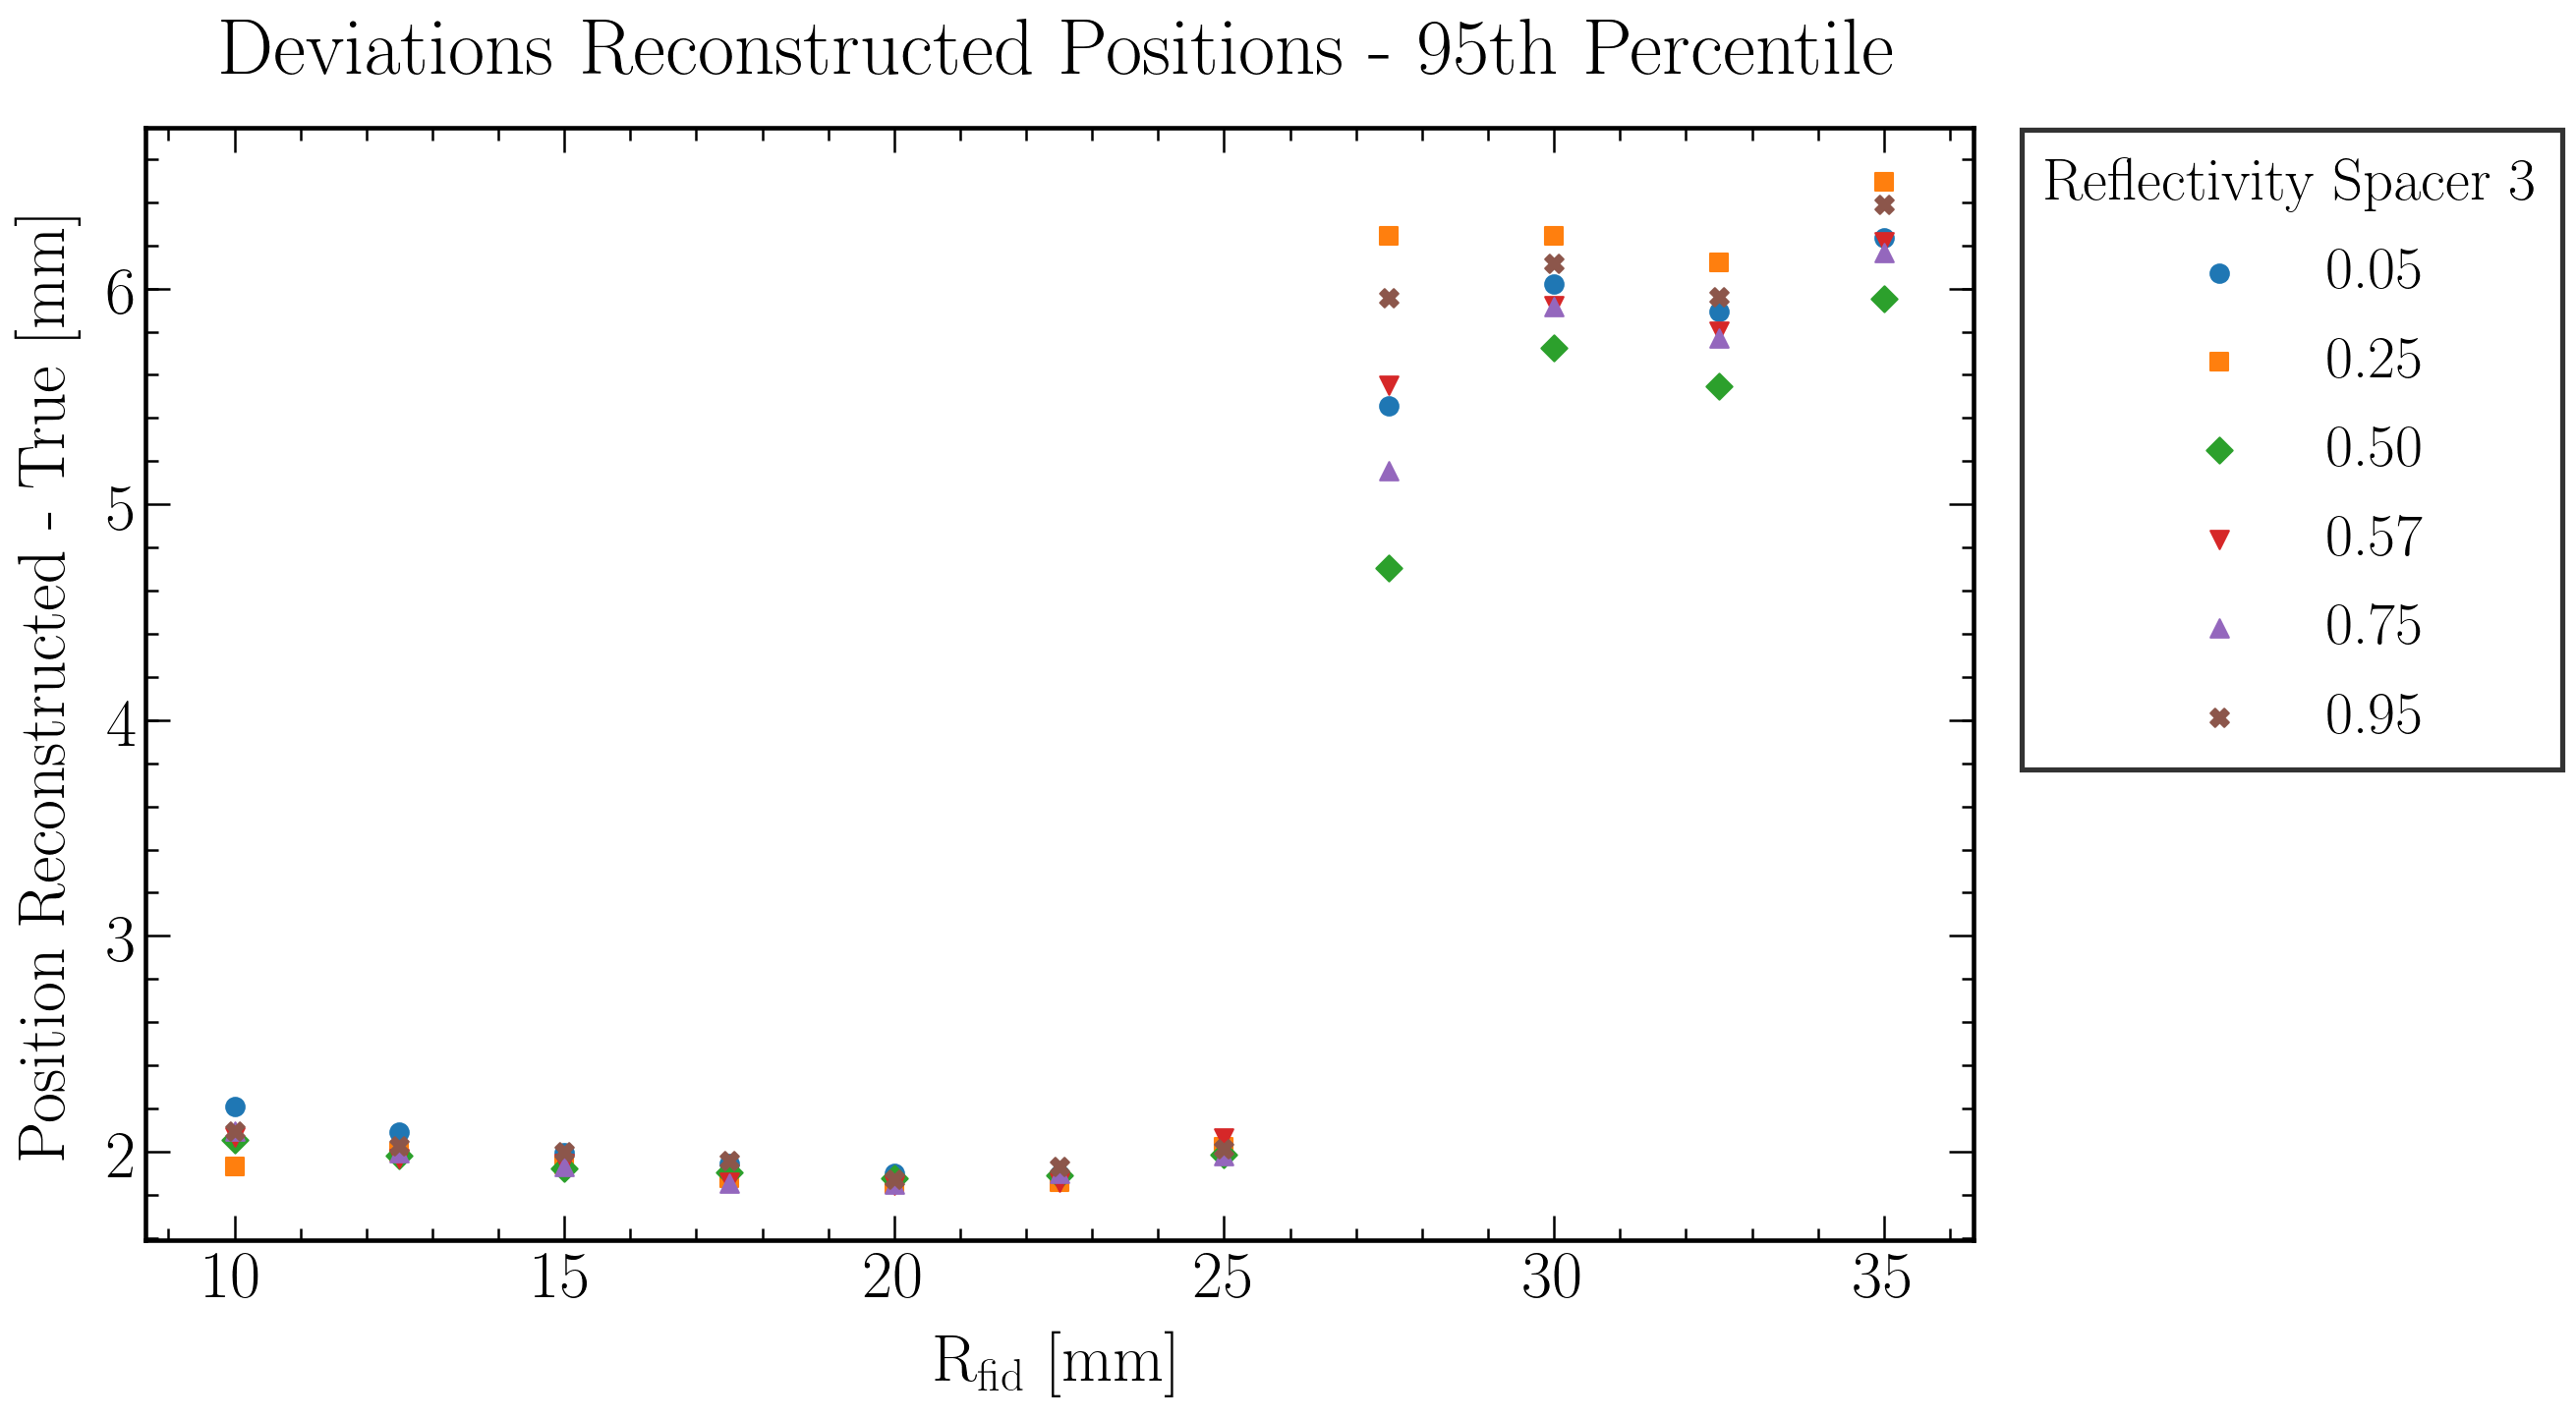

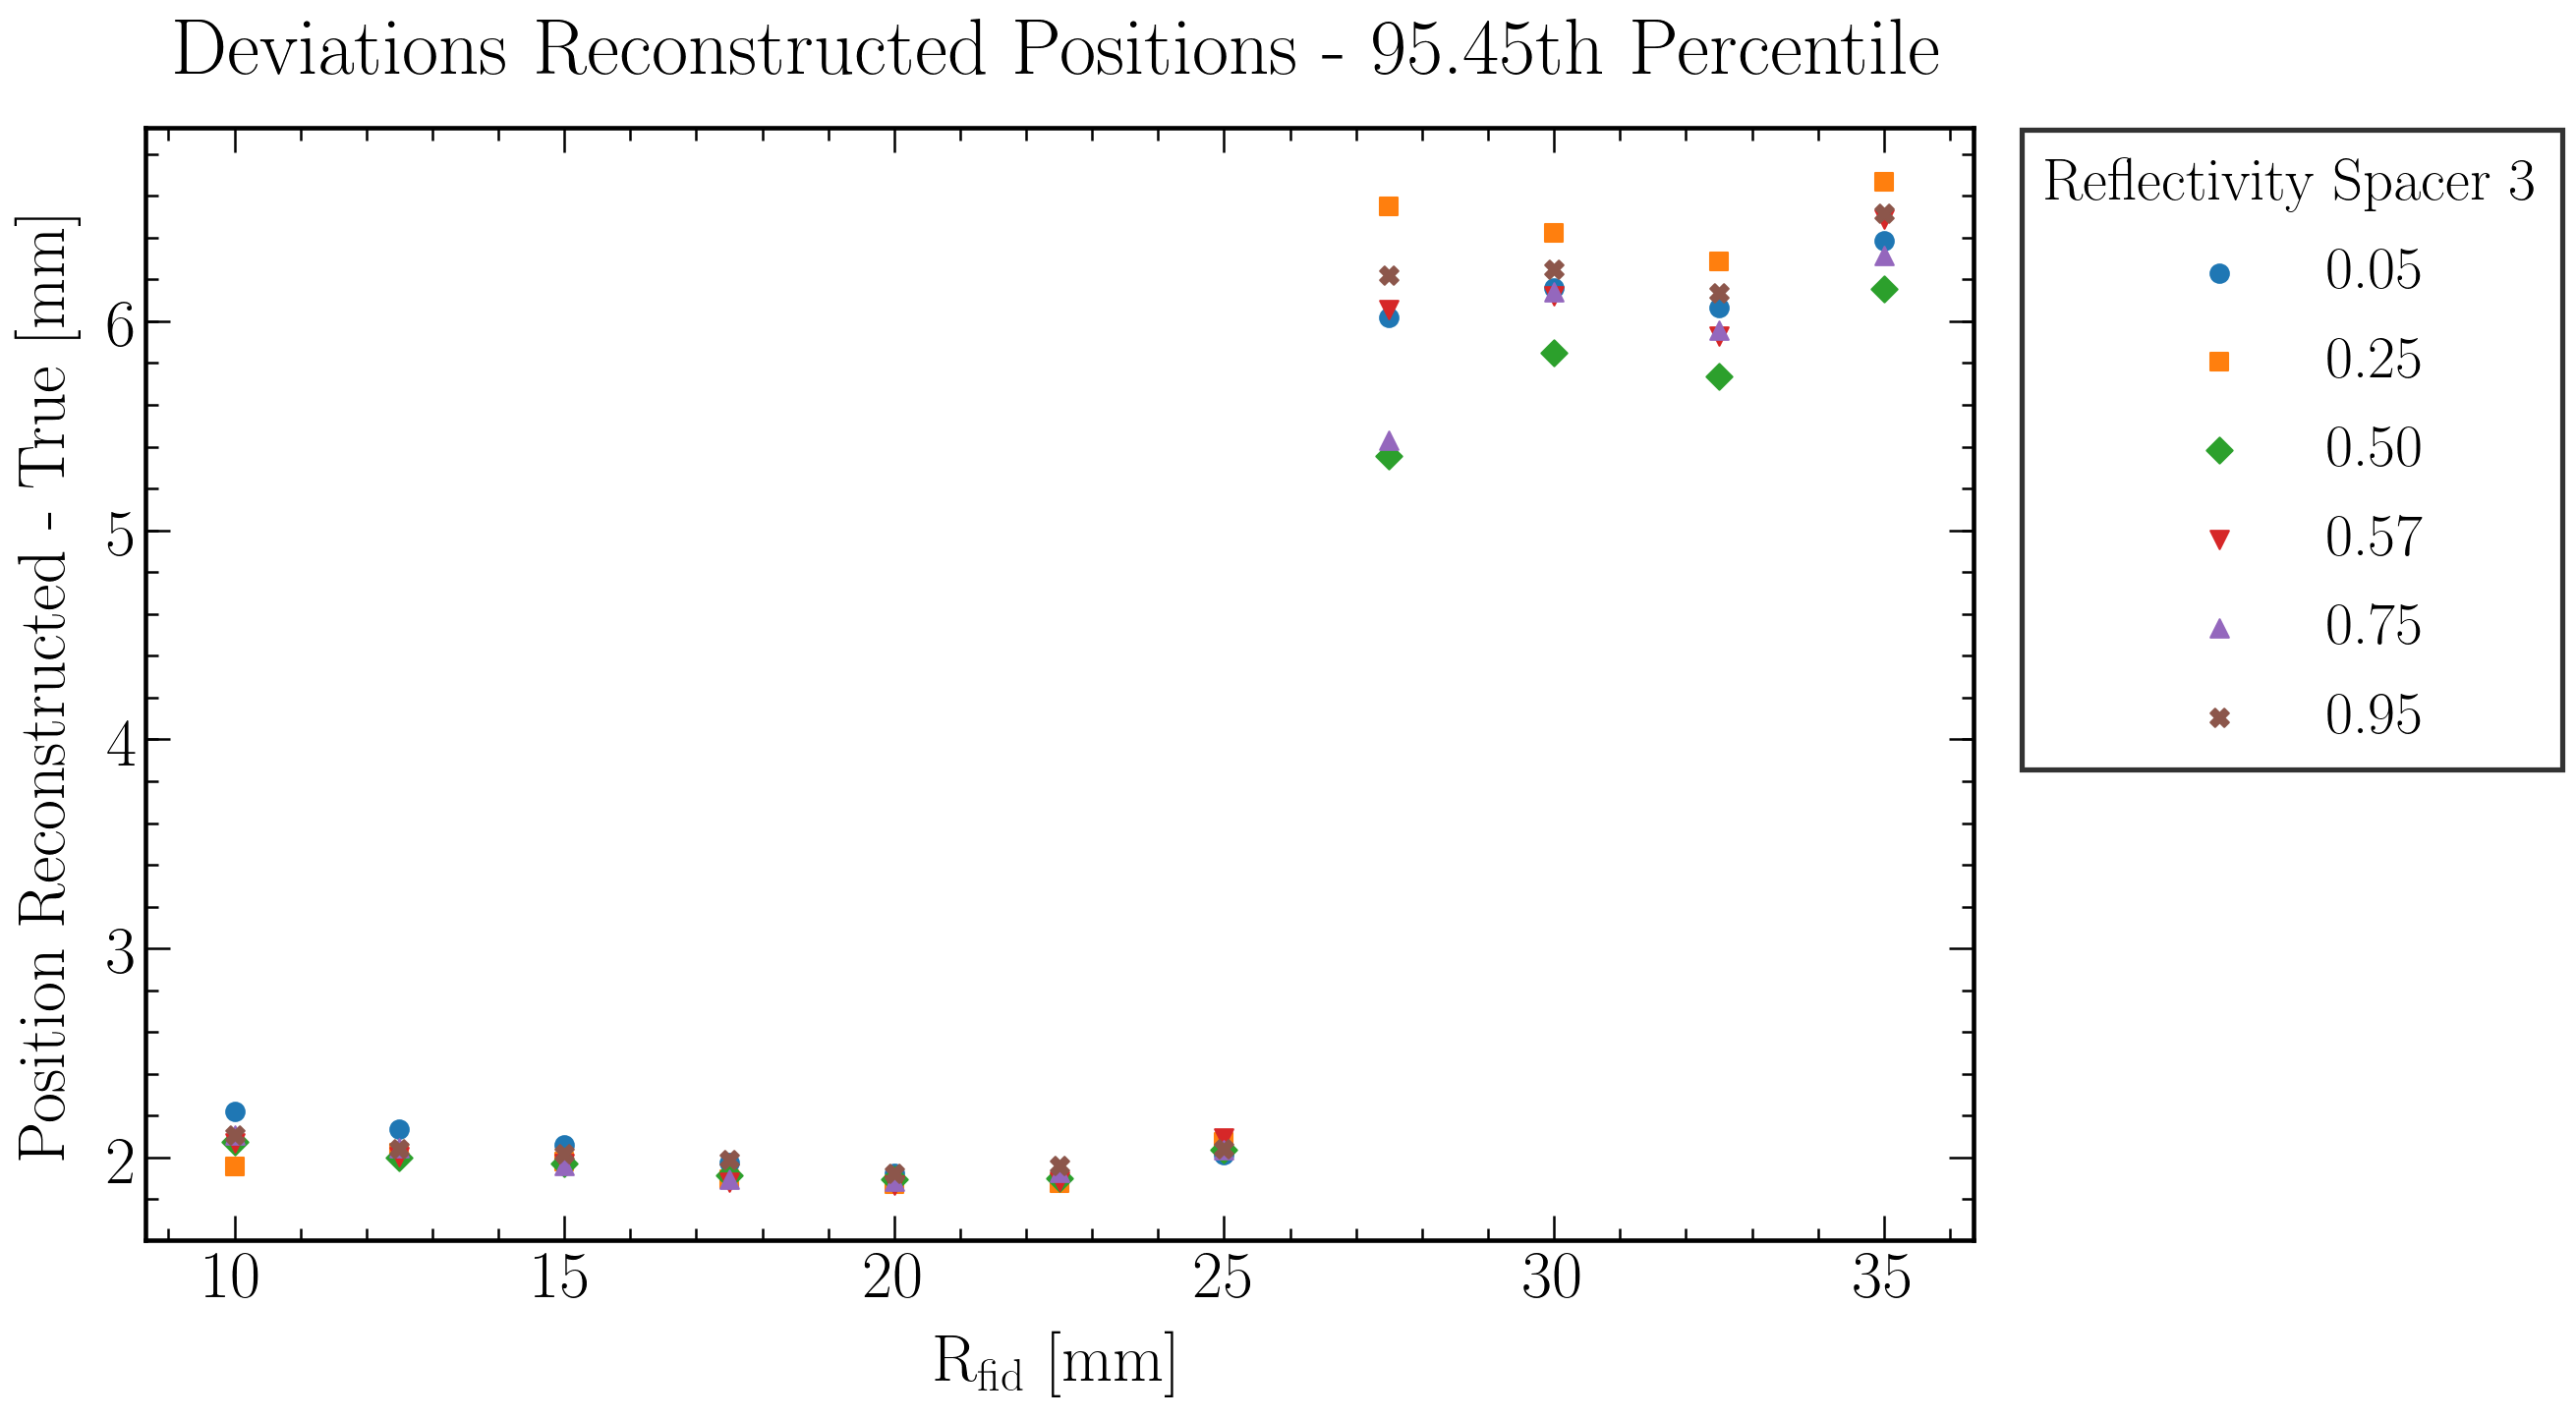

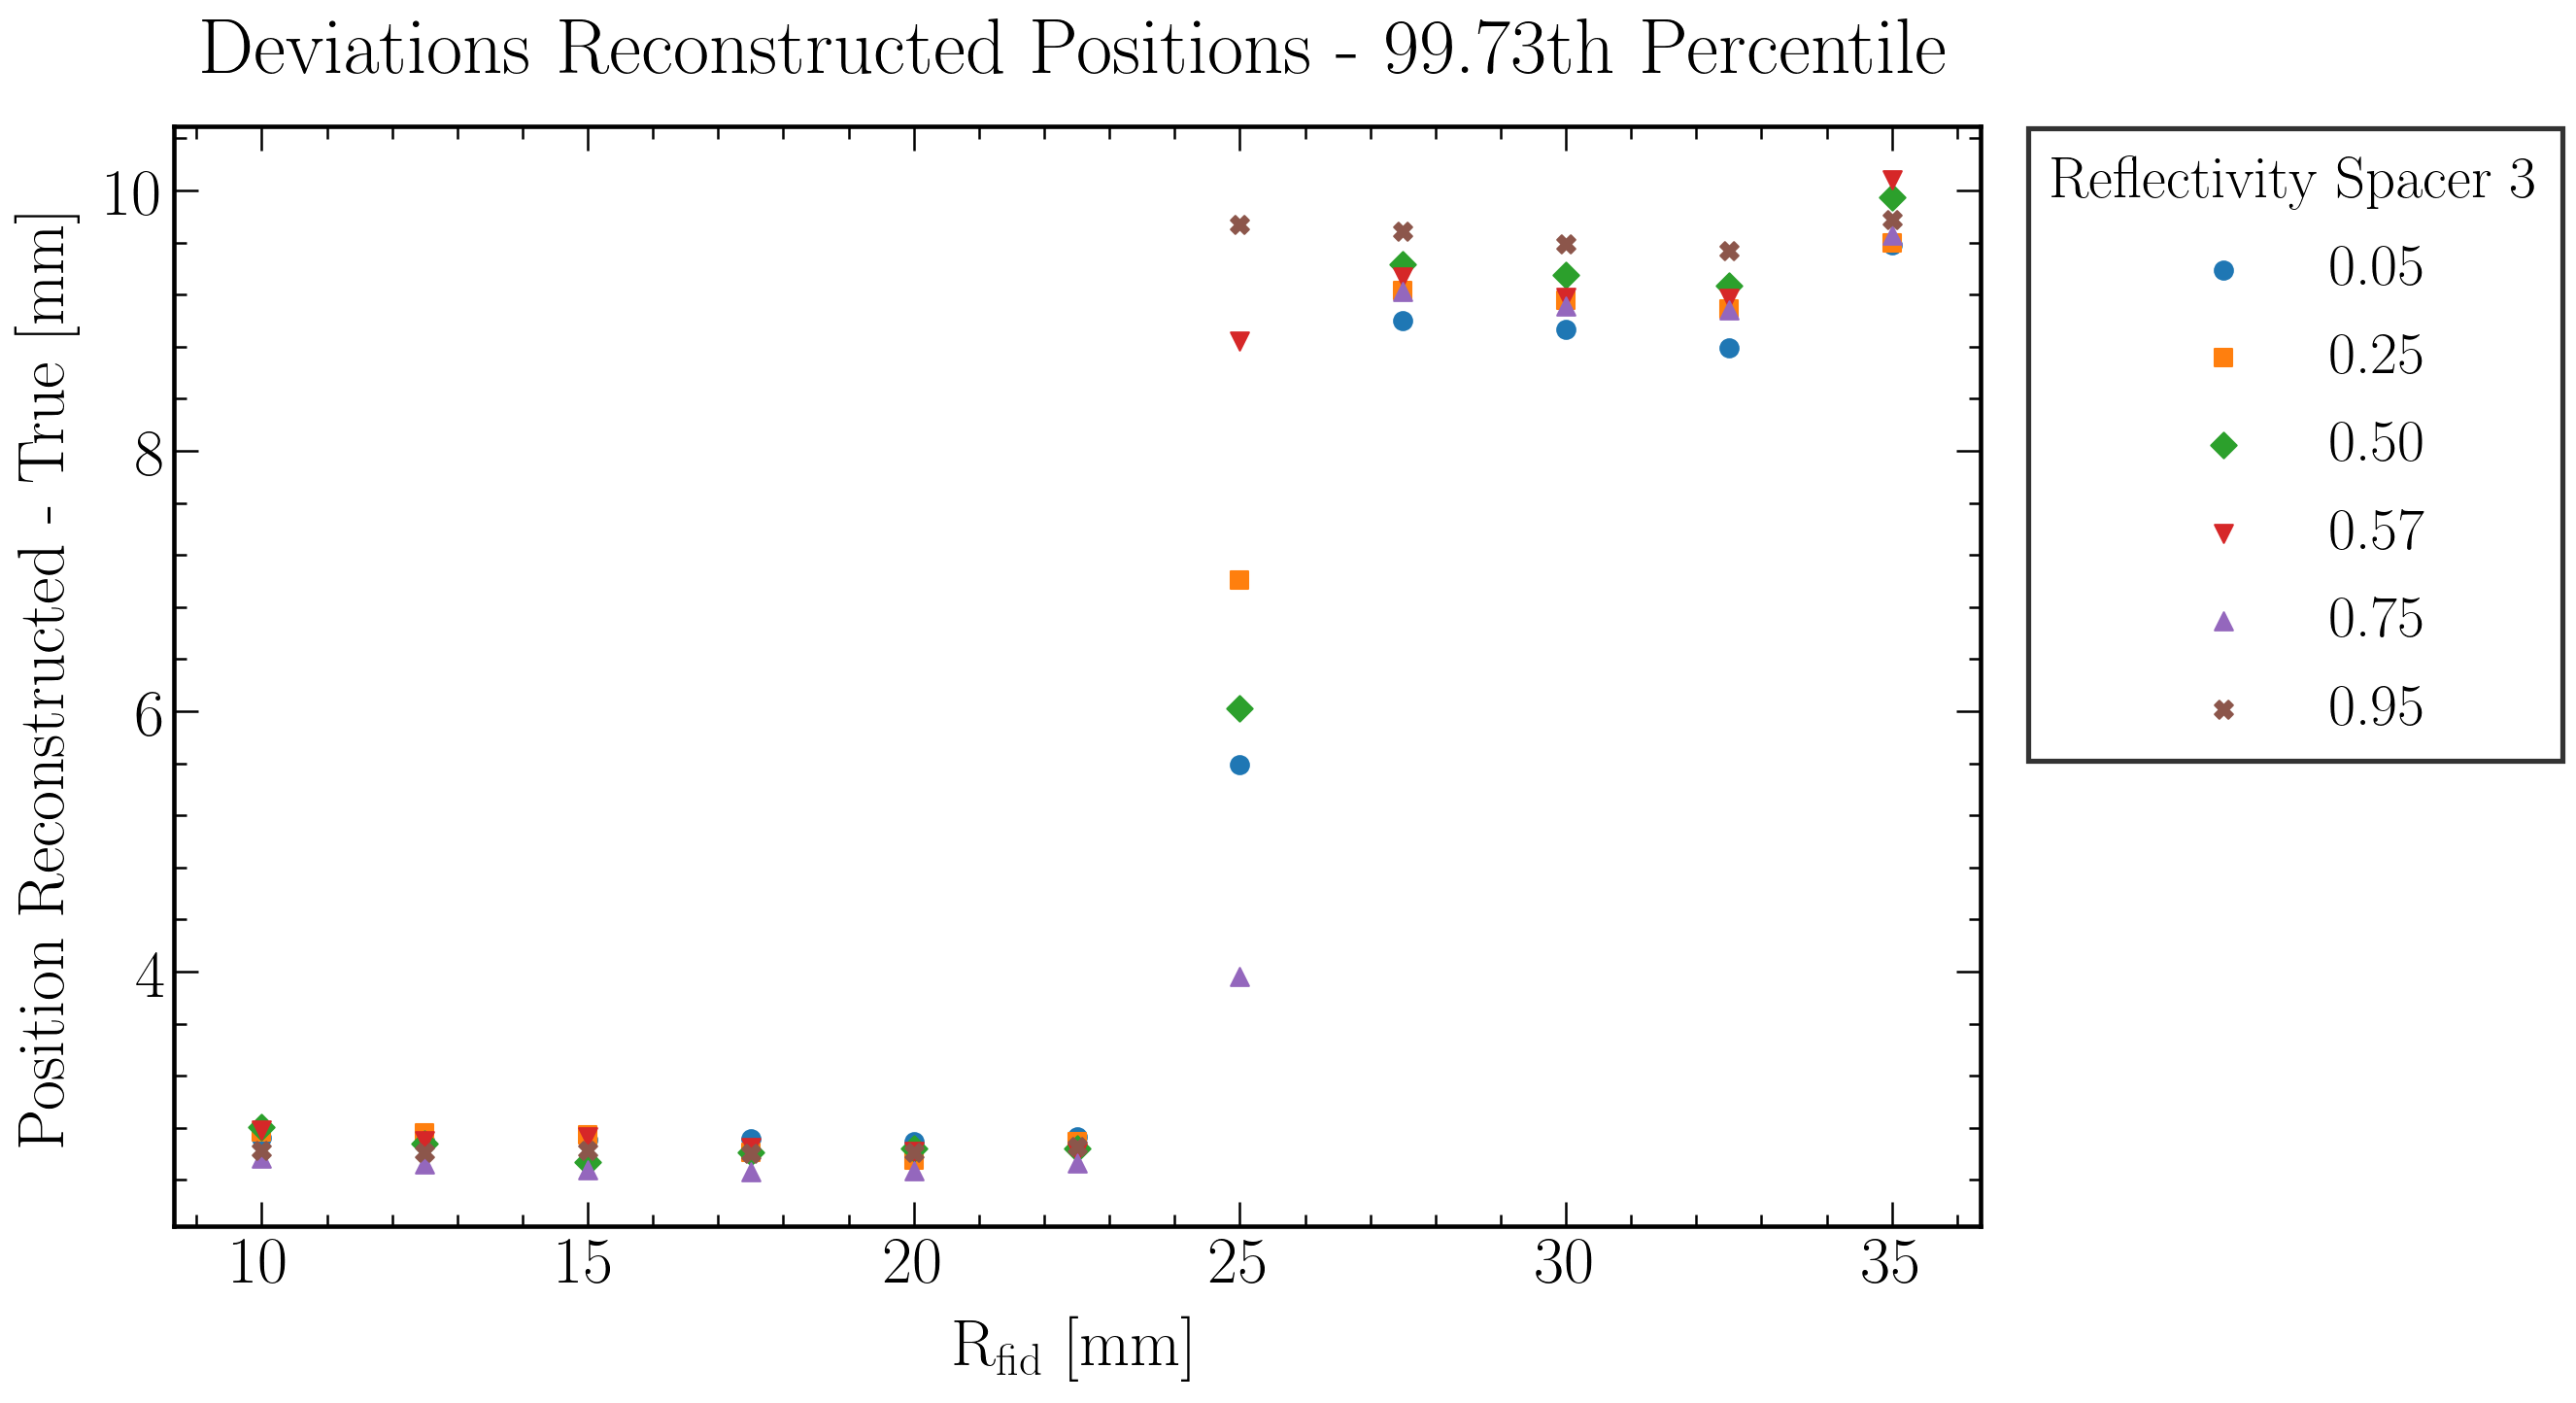

In [17]:
percentile_value_list = [50, 68.27, 95, 95.45, 99.73]

for percentile_value in percentile_value_list: 

    #############################################
    ## Set plot styles:
    #############################################

    fig=plt.figure(figsize=(16, 10), dpi=150)

    # Text options
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')

    # Labels
    label_size = 32.5 #25
    label_pad = 13 #10
    title_size = 39 #30
    title_pad = 26 #20

    # Axes Parameters
    axes = plt.gca()
    axes.tick_params(axis='both') 

    # Axes ---> Linewidth
    for axis in ['top','bottom','left','right']:
        axes.spines[axis].set_linewidth(2.2)

    # Axes ---> Ticks
    axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
    plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
    axes.yaxis.set_minor_locator(AutoMinorLocator(5))
    plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
    plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

    # Grid
    #plt.grid(True)

    #############################################
    ## Plot specific settings and plot data
    #############################################

    # Data plot

    x = df_PTFE005['fid']
    y = df_PTFE005['delta_'+str(percentile_value)+'_percentile']
    plt.scatter(x, y, label = '0.05', color = 'C0', marker = 'o', s = 80)

    x = df_PTFE025['fid']
    y = df_PTFE025['delta_'+str(percentile_value)+'_percentile']
    plt.scatter(x, y, label = '0.25', color = 'C1', marker = 's', s = 80)

    x = df_PTFE050['fid']
    y = df_PTFE050['delta_'+str(percentile_value)+'_percentile']
    plt.scatter(x, y, label = '0.50', color = 'C2', marker = 'D', s = 80)

    x = df_PTFE057['fid']
    y = df_PTFE057['delta_'+str(percentile_value)+'_percentile']
    plt.scatter(x, y, label = '0.57', color = 'C3', marker = 'v', s = 80)

    x = df_PTFE075['fid']
    y = df_PTFE075['delta_'+str(percentile_value)+'_percentile']
    plt.scatter(x, y, label = '0.75', color = 'C4', marker = '^', s = 80)

    x = df_PTFE095['fid']
    y = df_PTFE095['delta_'+str(percentile_value)+'_percentile']
    plt.scatter(x, y, label = '0.95', color = 'C5', marker = 'X', s = 80)

    plt.ylabel('Position Reconstructed - True [mm]', fontsize = label_size, labelpad = label_pad)
    plt.xlabel('$\mathrm{R}_{\mathrm{fid}}$ [mm]', fontsize = label_size, labelpad = label_pad)
    plt.title('Deviations Reconstructed Positions - '+str(percentile_value)+'th Percentile', fontsize = title_size, pad = title_pad)

    # Legend
    leg = plt.legend(loc=2, bbox_to_anchor=(1.01,1.025), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
    leg.set_title("Reflectivity Spacer 3", prop = {'size':0.9*label_size})
    for line in leg.get_lines(): # enumerated
        line.set_linewidth(4)
    leg.get_frame().set_linewidth(2.5)

    fig.savefig("Comparison_Spacer3Reflectivity_LRF_ReconstructedPosition_Deviations_"+str(percentile_value)+"Percentiles.png", bbox_inches = "tight")
    plt.show()

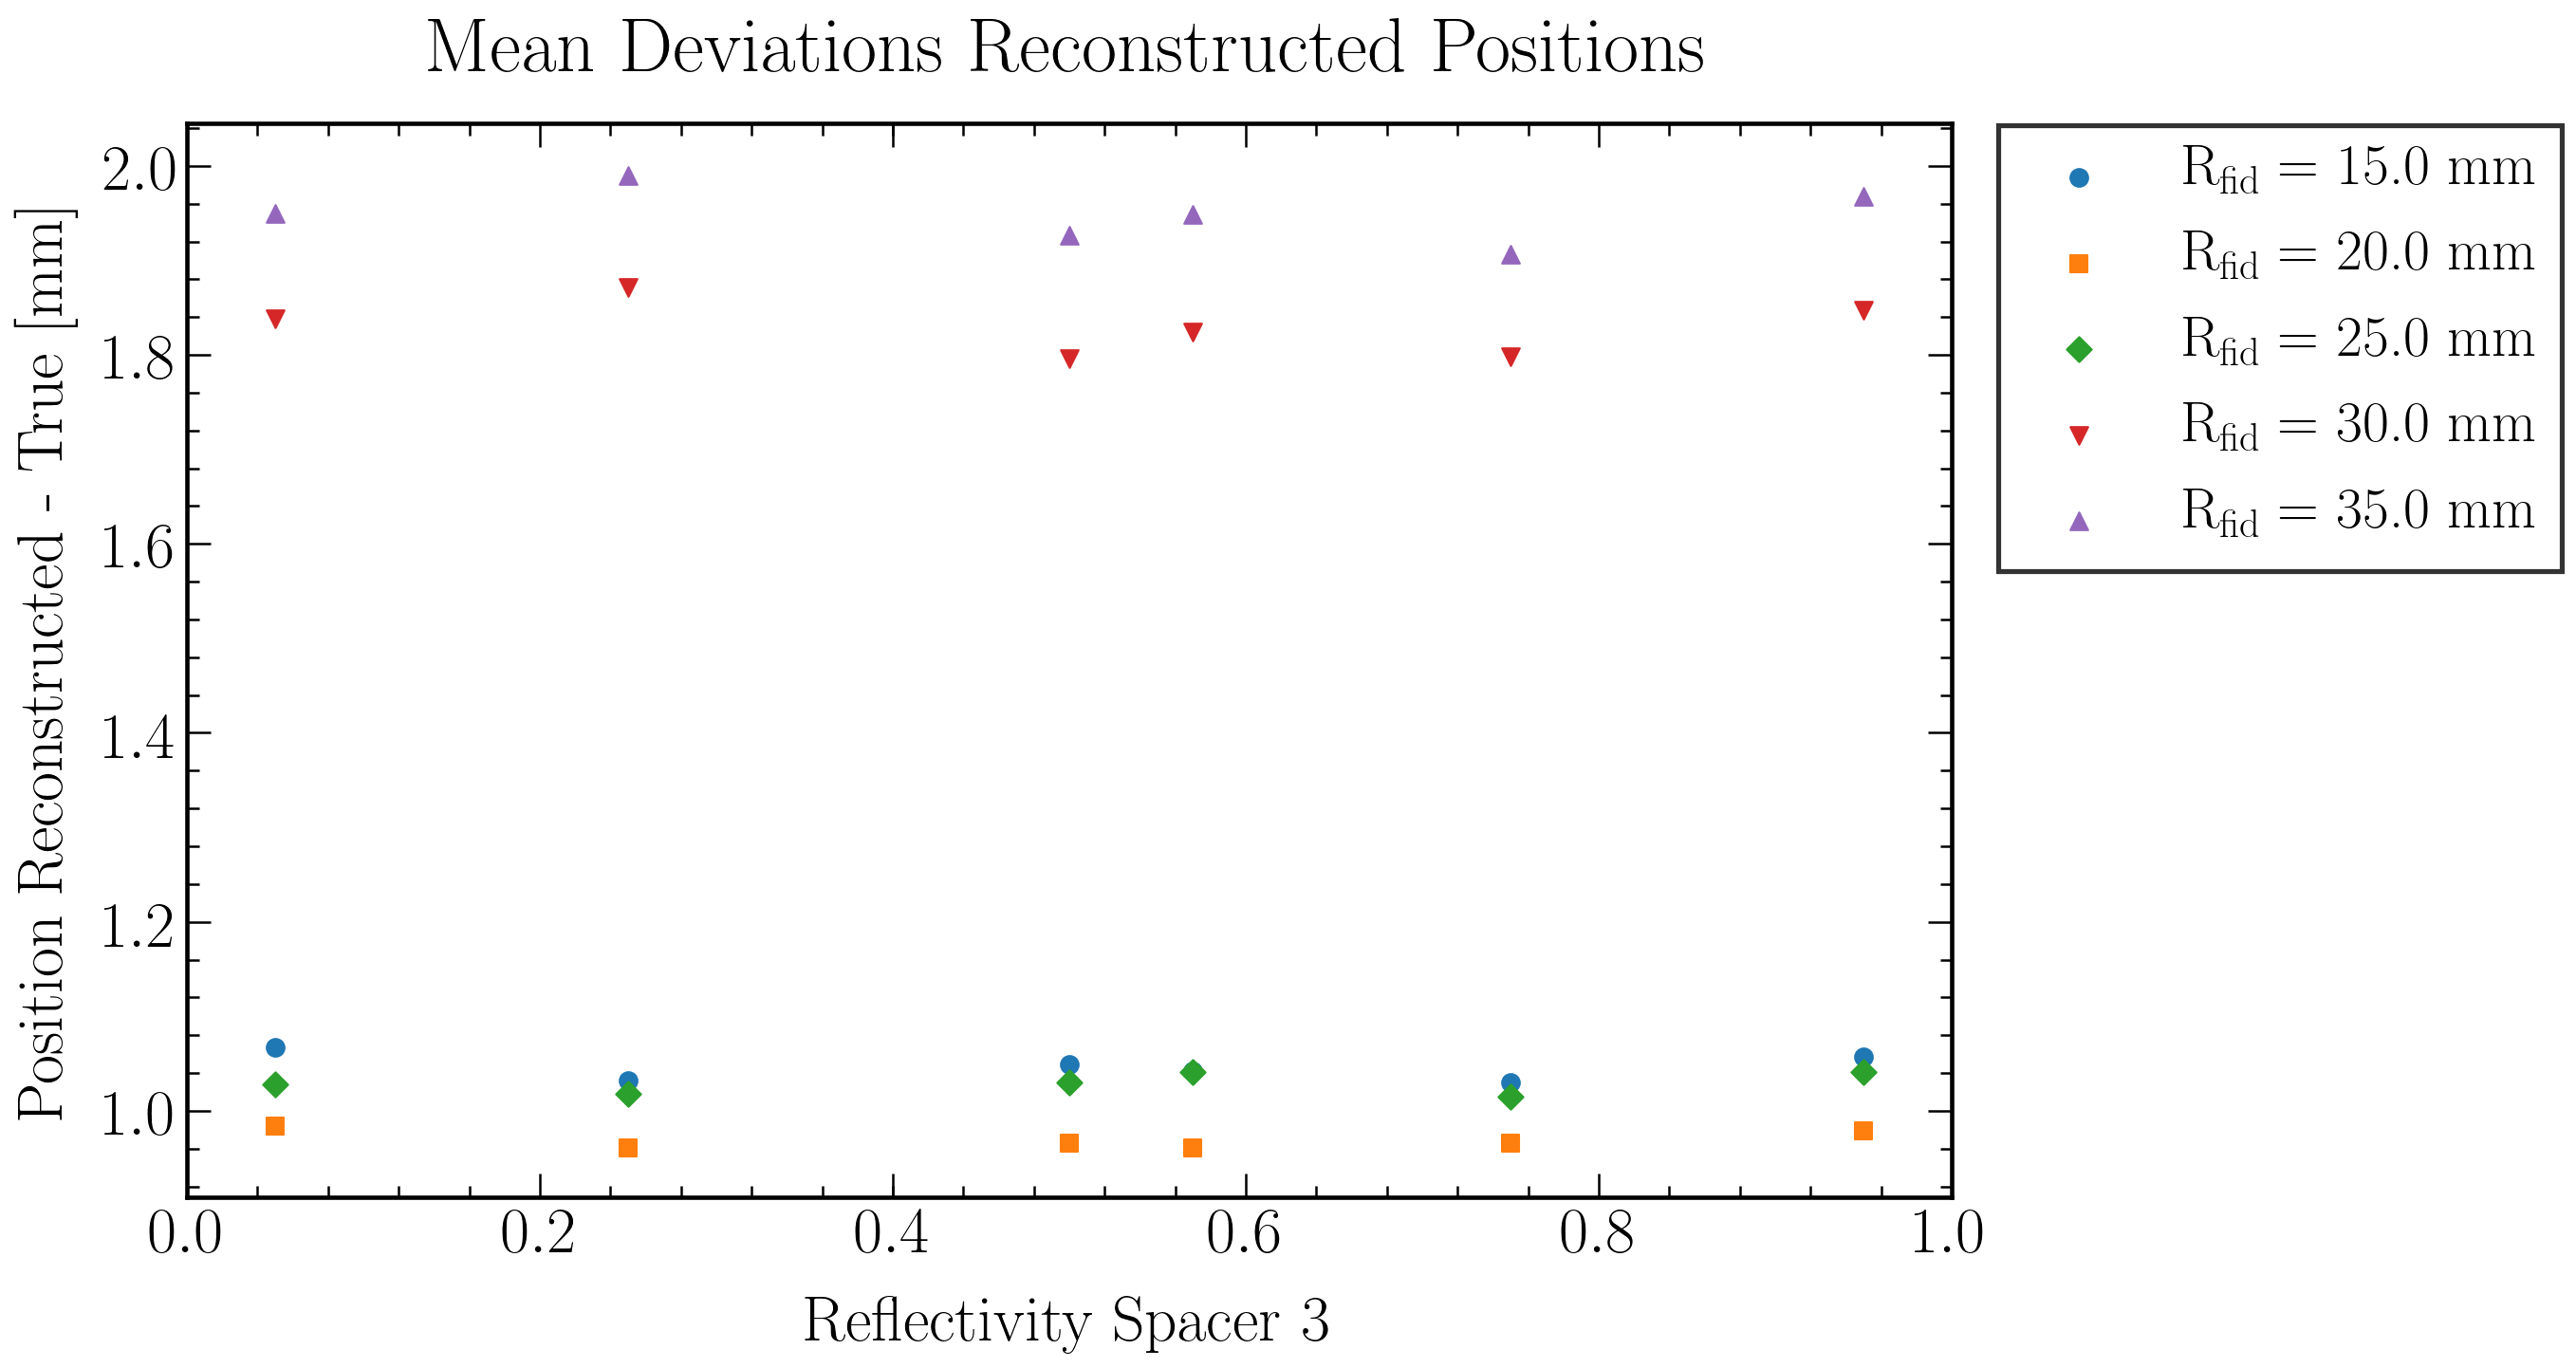

In [18]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

ref_list = [0.05, 0.25, 0.50, 0.57, 0.75, 0.95]
x = ref_list

rfi = 2
y = [df_PTFE005['delta_mean'][rfi], df_PTFE025['delta_mean'][rfi], df_PTFE050['delta_mean'][rfi], df_PTFE057['delta_mean'][rfi], df_PTFE075['delta_mean'][rfi], df_PTFE095['delta_mean'][rfi]]
plt.scatter(x, y, label = 'R$_{\mathrm{fid}} = $ '+str(df_PTFE005['fid'][rfi])+' mm', 
            color = 'C0', marker = 'o', s = 80)

rfi = 4
y = [df_PTFE005['delta_mean'][rfi], df_PTFE025['delta_mean'][rfi], df_PTFE050['delta_mean'][rfi], df_PTFE057['delta_mean'][rfi], df_PTFE075['delta_mean'][rfi], df_PTFE095['delta_mean'][rfi]]
plt.scatter(x, y, label = 'R$_{\mathrm{fid}} = $ '+str(df_PTFE005['fid'][rfi])+' mm', 
            color = 'C1', marker = 's', s = 80)

rfi = 6
y = [df_PTFE005['delta_mean'][rfi], df_PTFE025['delta_mean'][rfi], df_PTFE050['delta_mean'][rfi], df_PTFE057['delta_mean'][rfi], df_PTFE075['delta_mean'][rfi], df_PTFE095['delta_mean'][rfi]]
plt.scatter(x, y, label = 'R$_{\mathrm{fid}} = $ '+str(df_PTFE005['fid'][rfi])+' mm', 
            color = 'C2', marker = 'D', s = 80)

rfi = 8
y = [df_PTFE005['delta_mean'][rfi], df_PTFE025['delta_mean'][rfi], df_PTFE050['delta_mean'][rfi], df_PTFE057['delta_mean'][rfi], df_PTFE075['delta_mean'][rfi], df_PTFE095['delta_mean'][rfi]]
plt.scatter(x, y, label = 'R$_{\mathrm{fid}} = $ '+str(df_PTFE005['fid'][rfi])+' mm', 
            color = 'C3', marker = 'v', s = 80)

rfi = 10
y = [df_PTFE005['delta_mean'][rfi], df_PTFE025['delta_mean'][rfi], df_PTFE050['delta_mean'][rfi], df_PTFE057['delta_mean'][rfi], df_PTFE075['delta_mean'][rfi], df_PTFE095['delta_mean'][rfi]]
plt.scatter(x, y, label = 'R$_{\mathrm{fid}} = $ '+str(df_PTFE005['fid'][rfi])+' mm', 
            color = 'C4', marker = '^', s = 80)

    
plt.ylabel('Position Reconstructed - True [mm]', fontsize = label_size, labelpad = label_pad)
plt.xlabel('Reflectivity Spacer 3', fontsize = label_size, labelpad = label_pad)
plt.title('Mean Deviations Reconstructed Positions', fontsize = title_size, pad = title_pad)

plt.xlim(0,1)

# Legend
leg = plt.legend(loc=2, bbox_to_anchor=(1.01,1.025), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
#leg.set_title("Reflectivity Spacer 3", prop = {'size':0.9*label_size})
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

fig.savefig("Comparison_Spacer3Reflectivity_LRF_ReconstructedPosition_Deviations_Mean_inverted.png", bbox_inches = "tight")
plt.show()

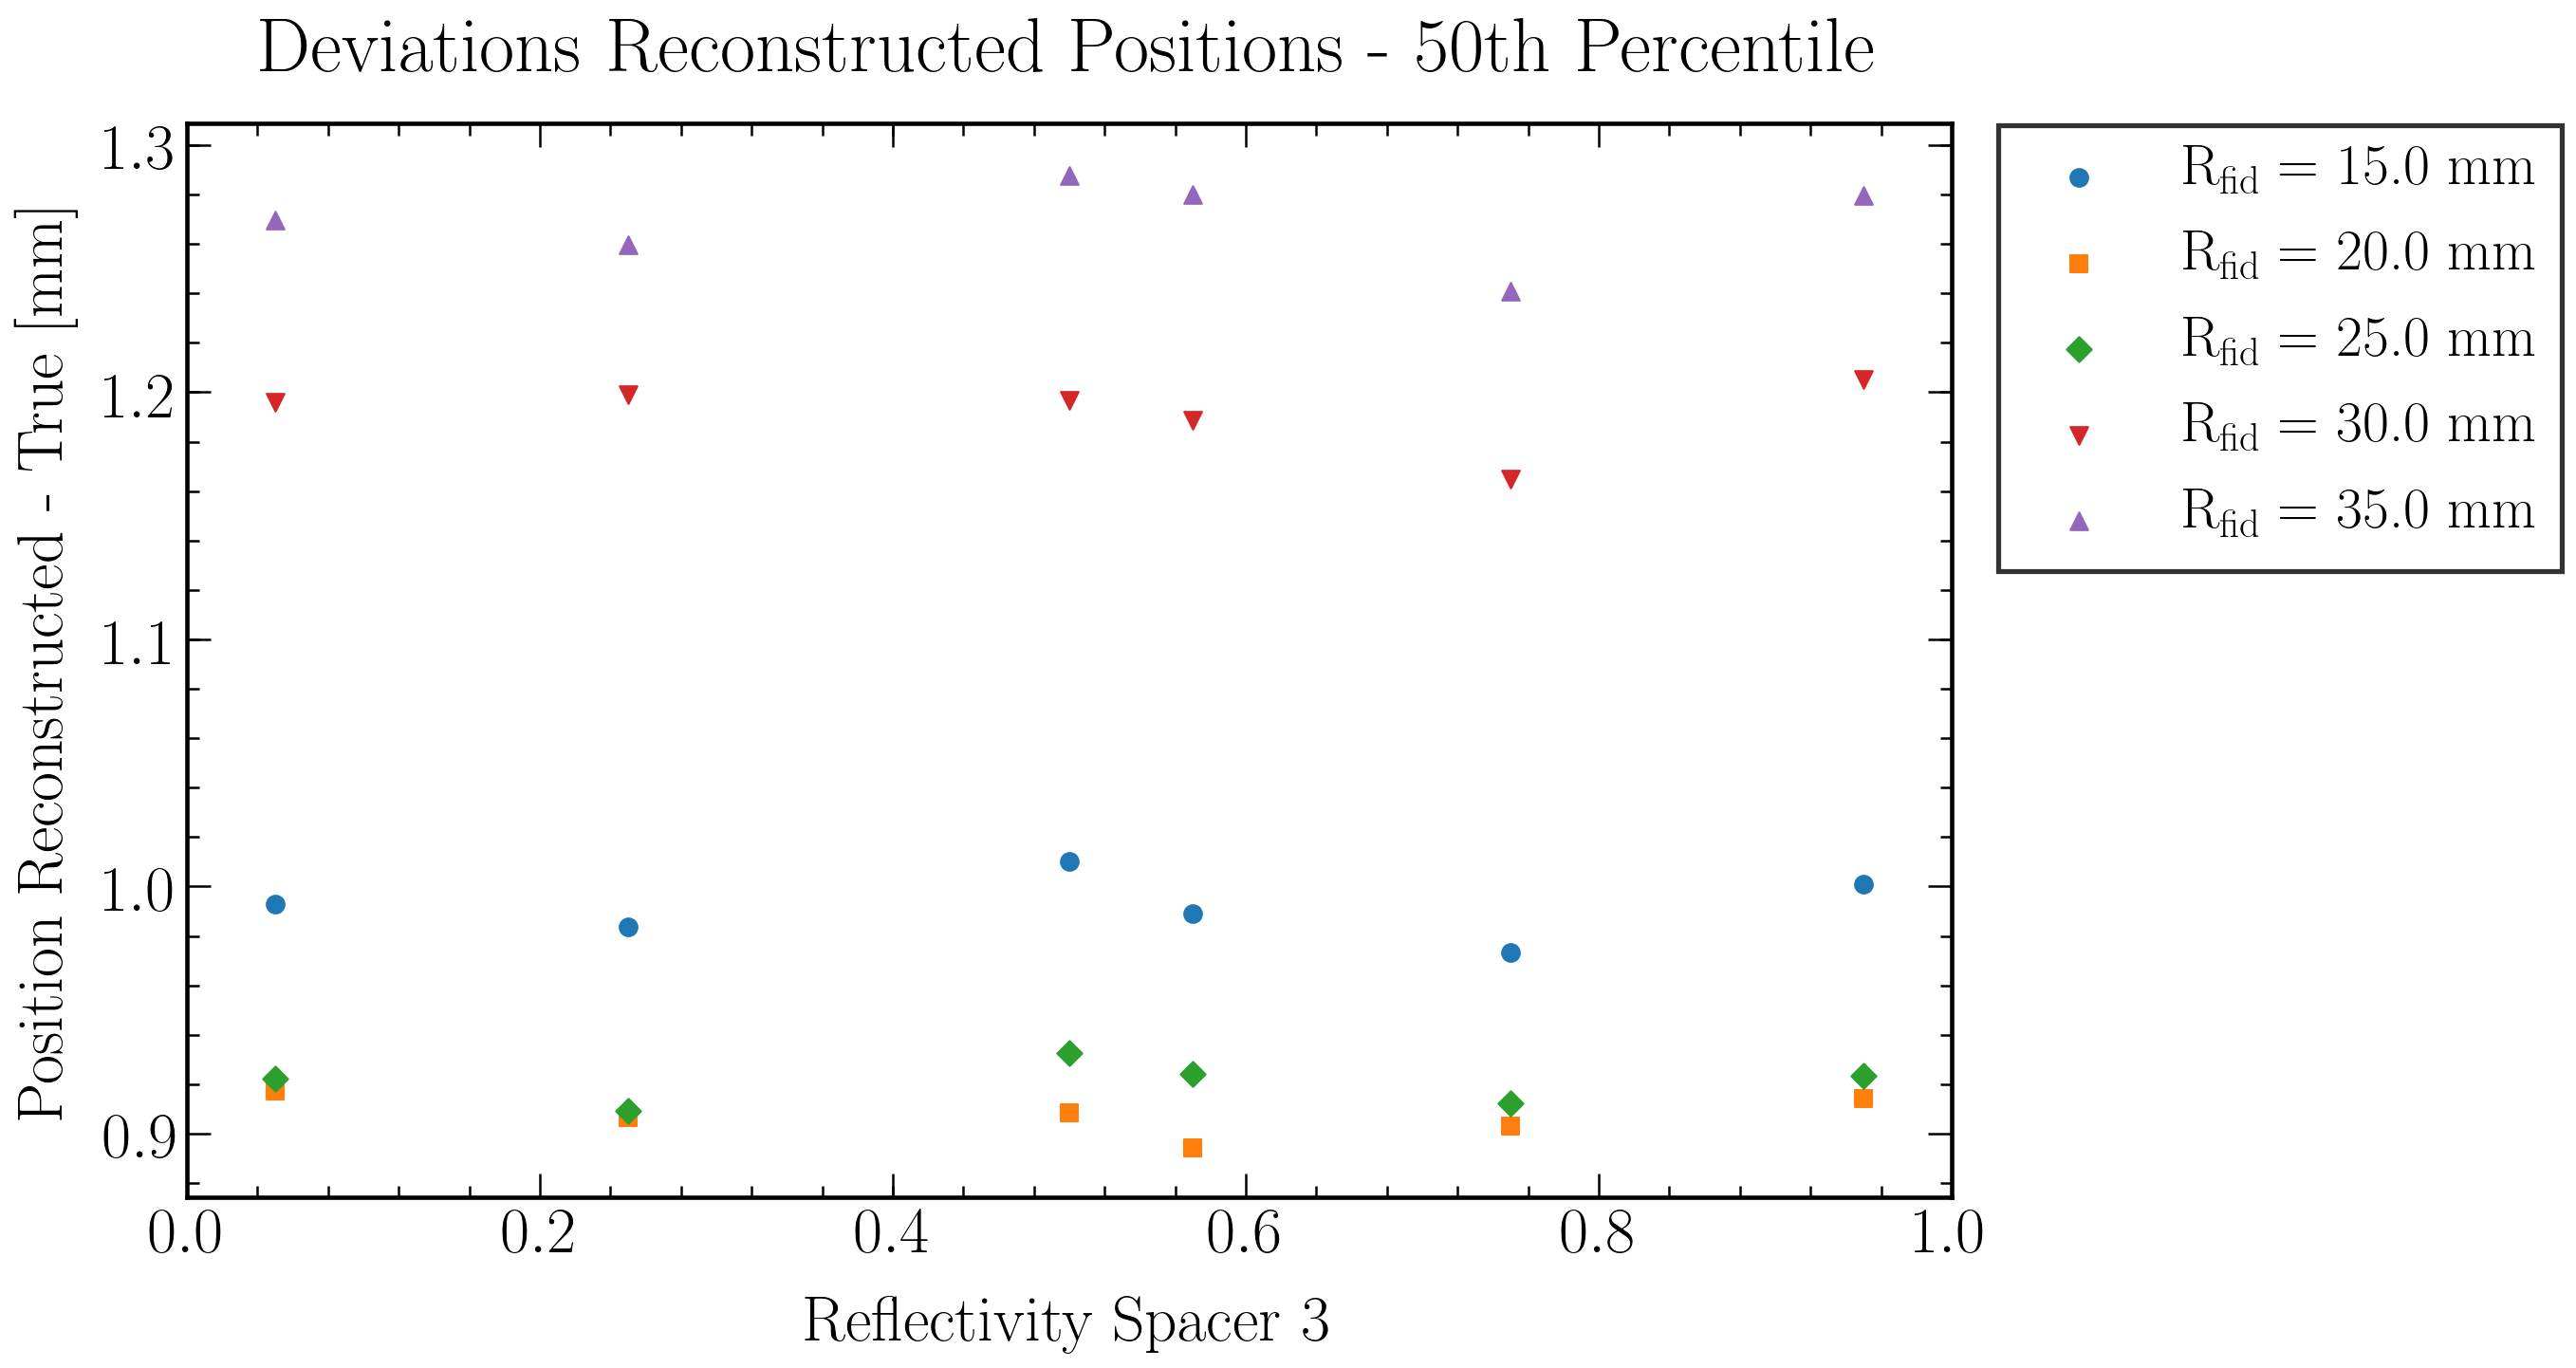

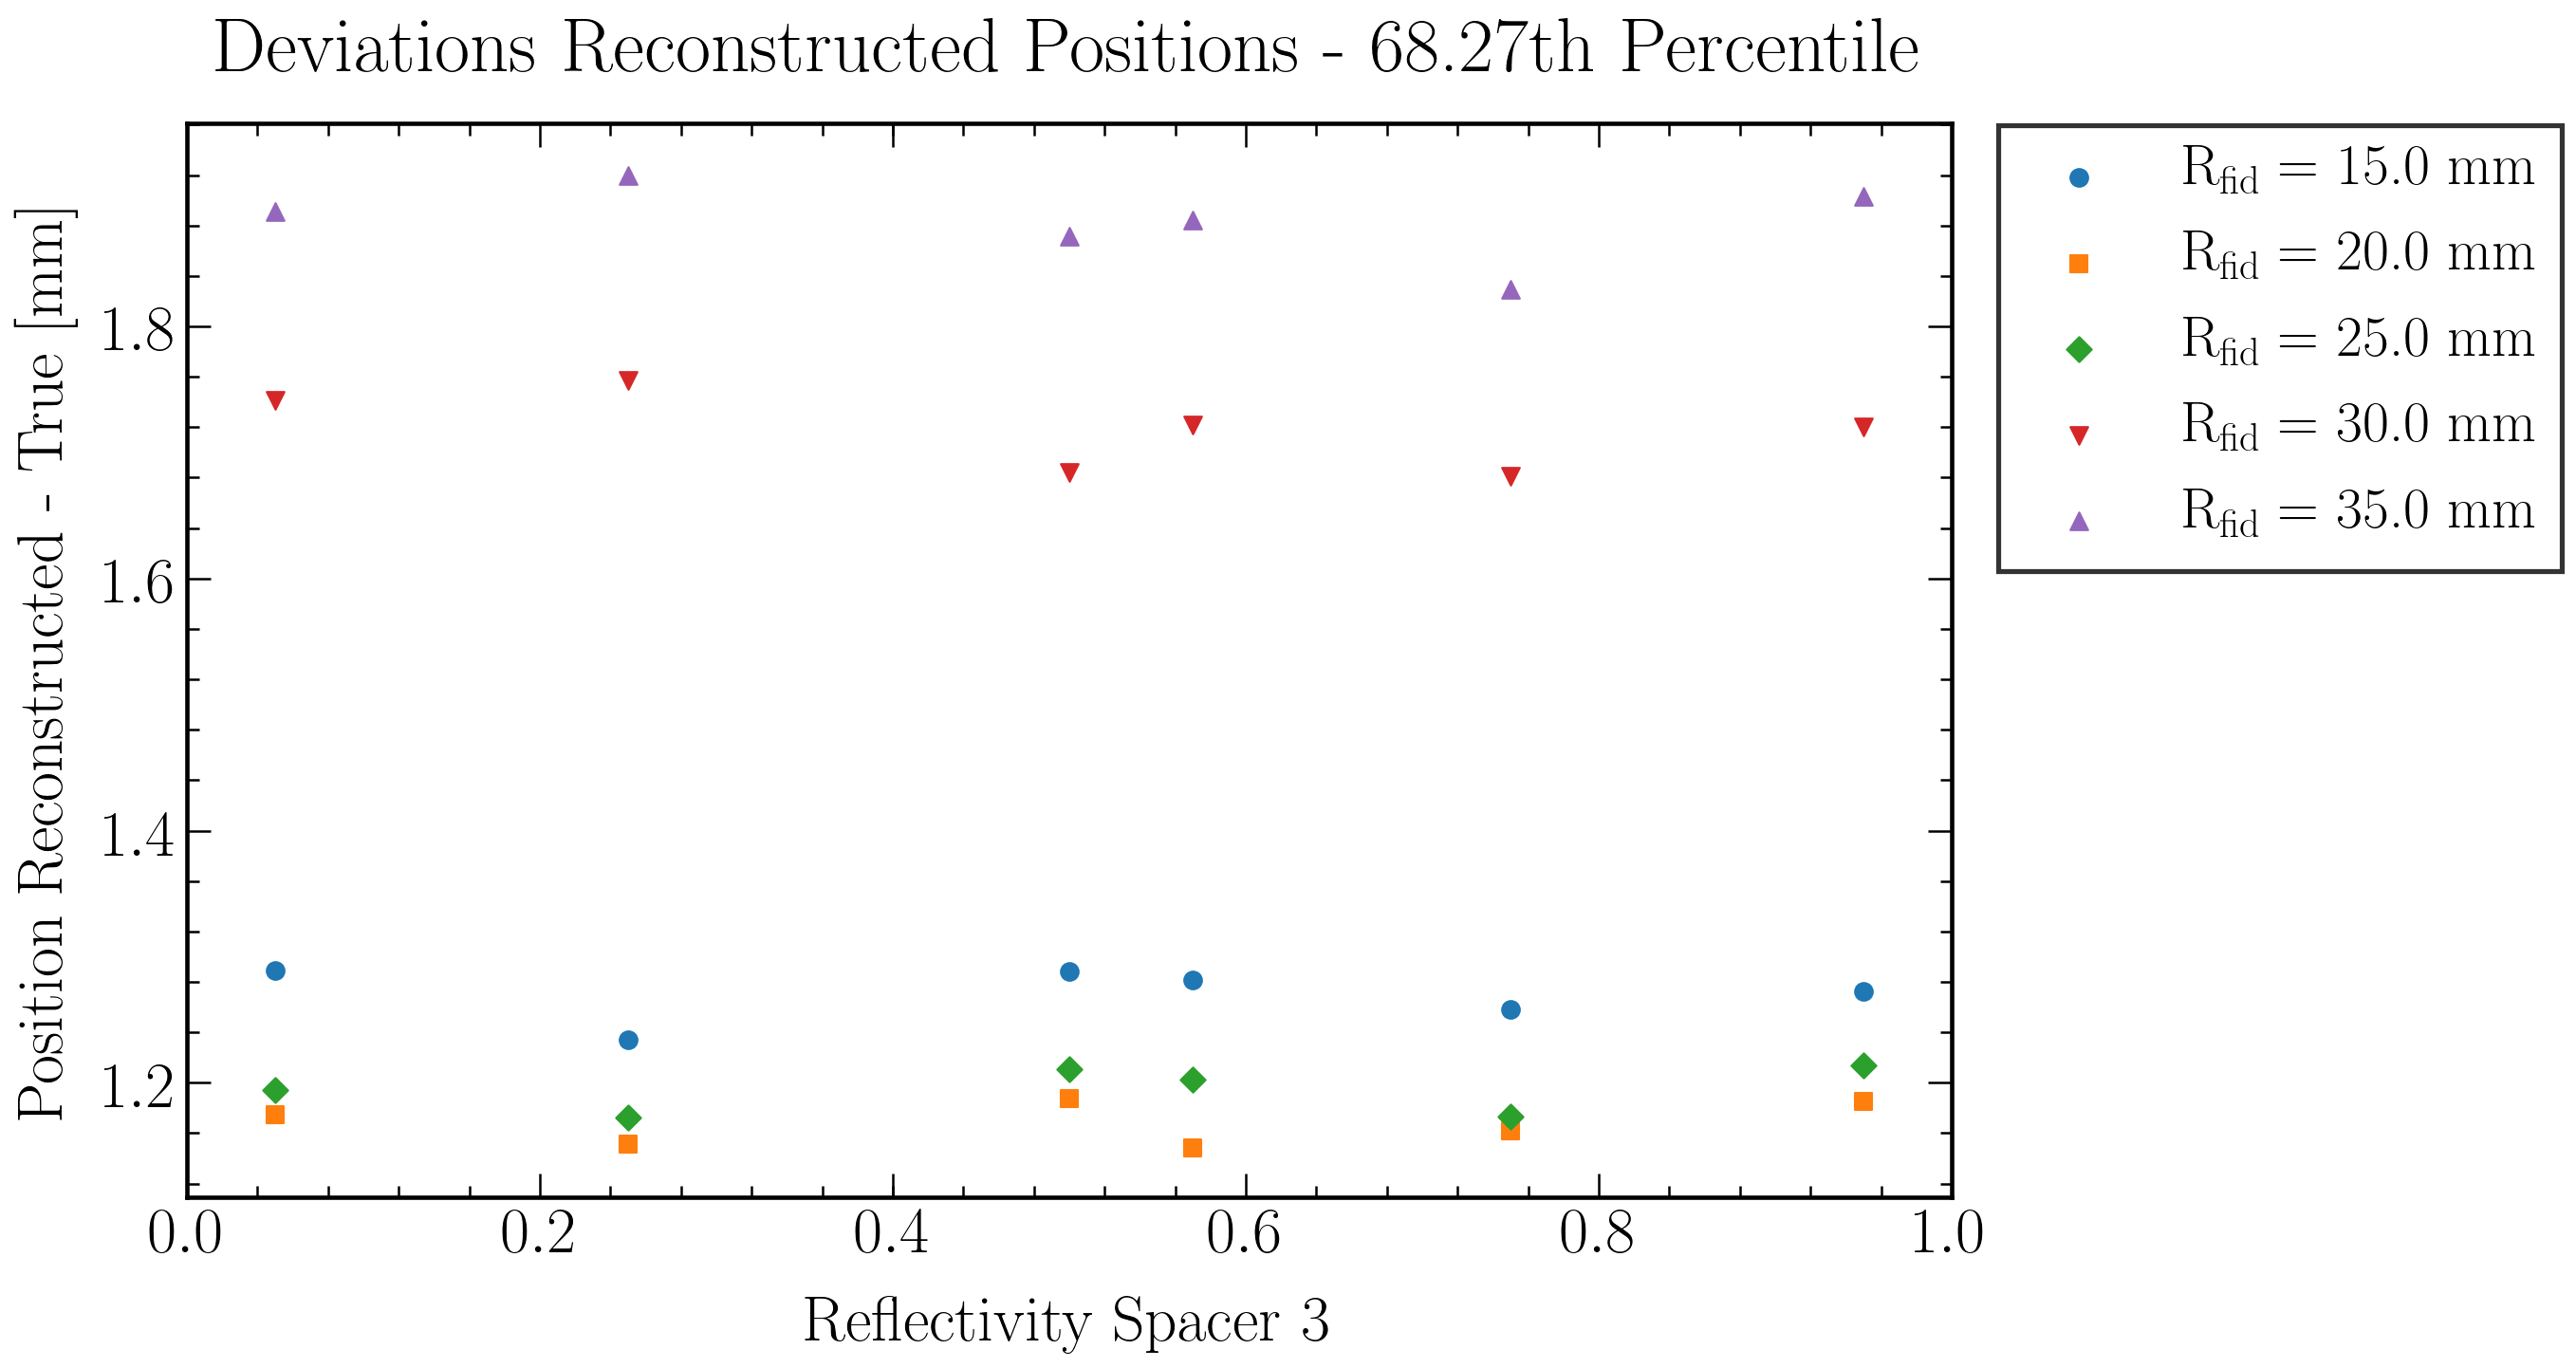

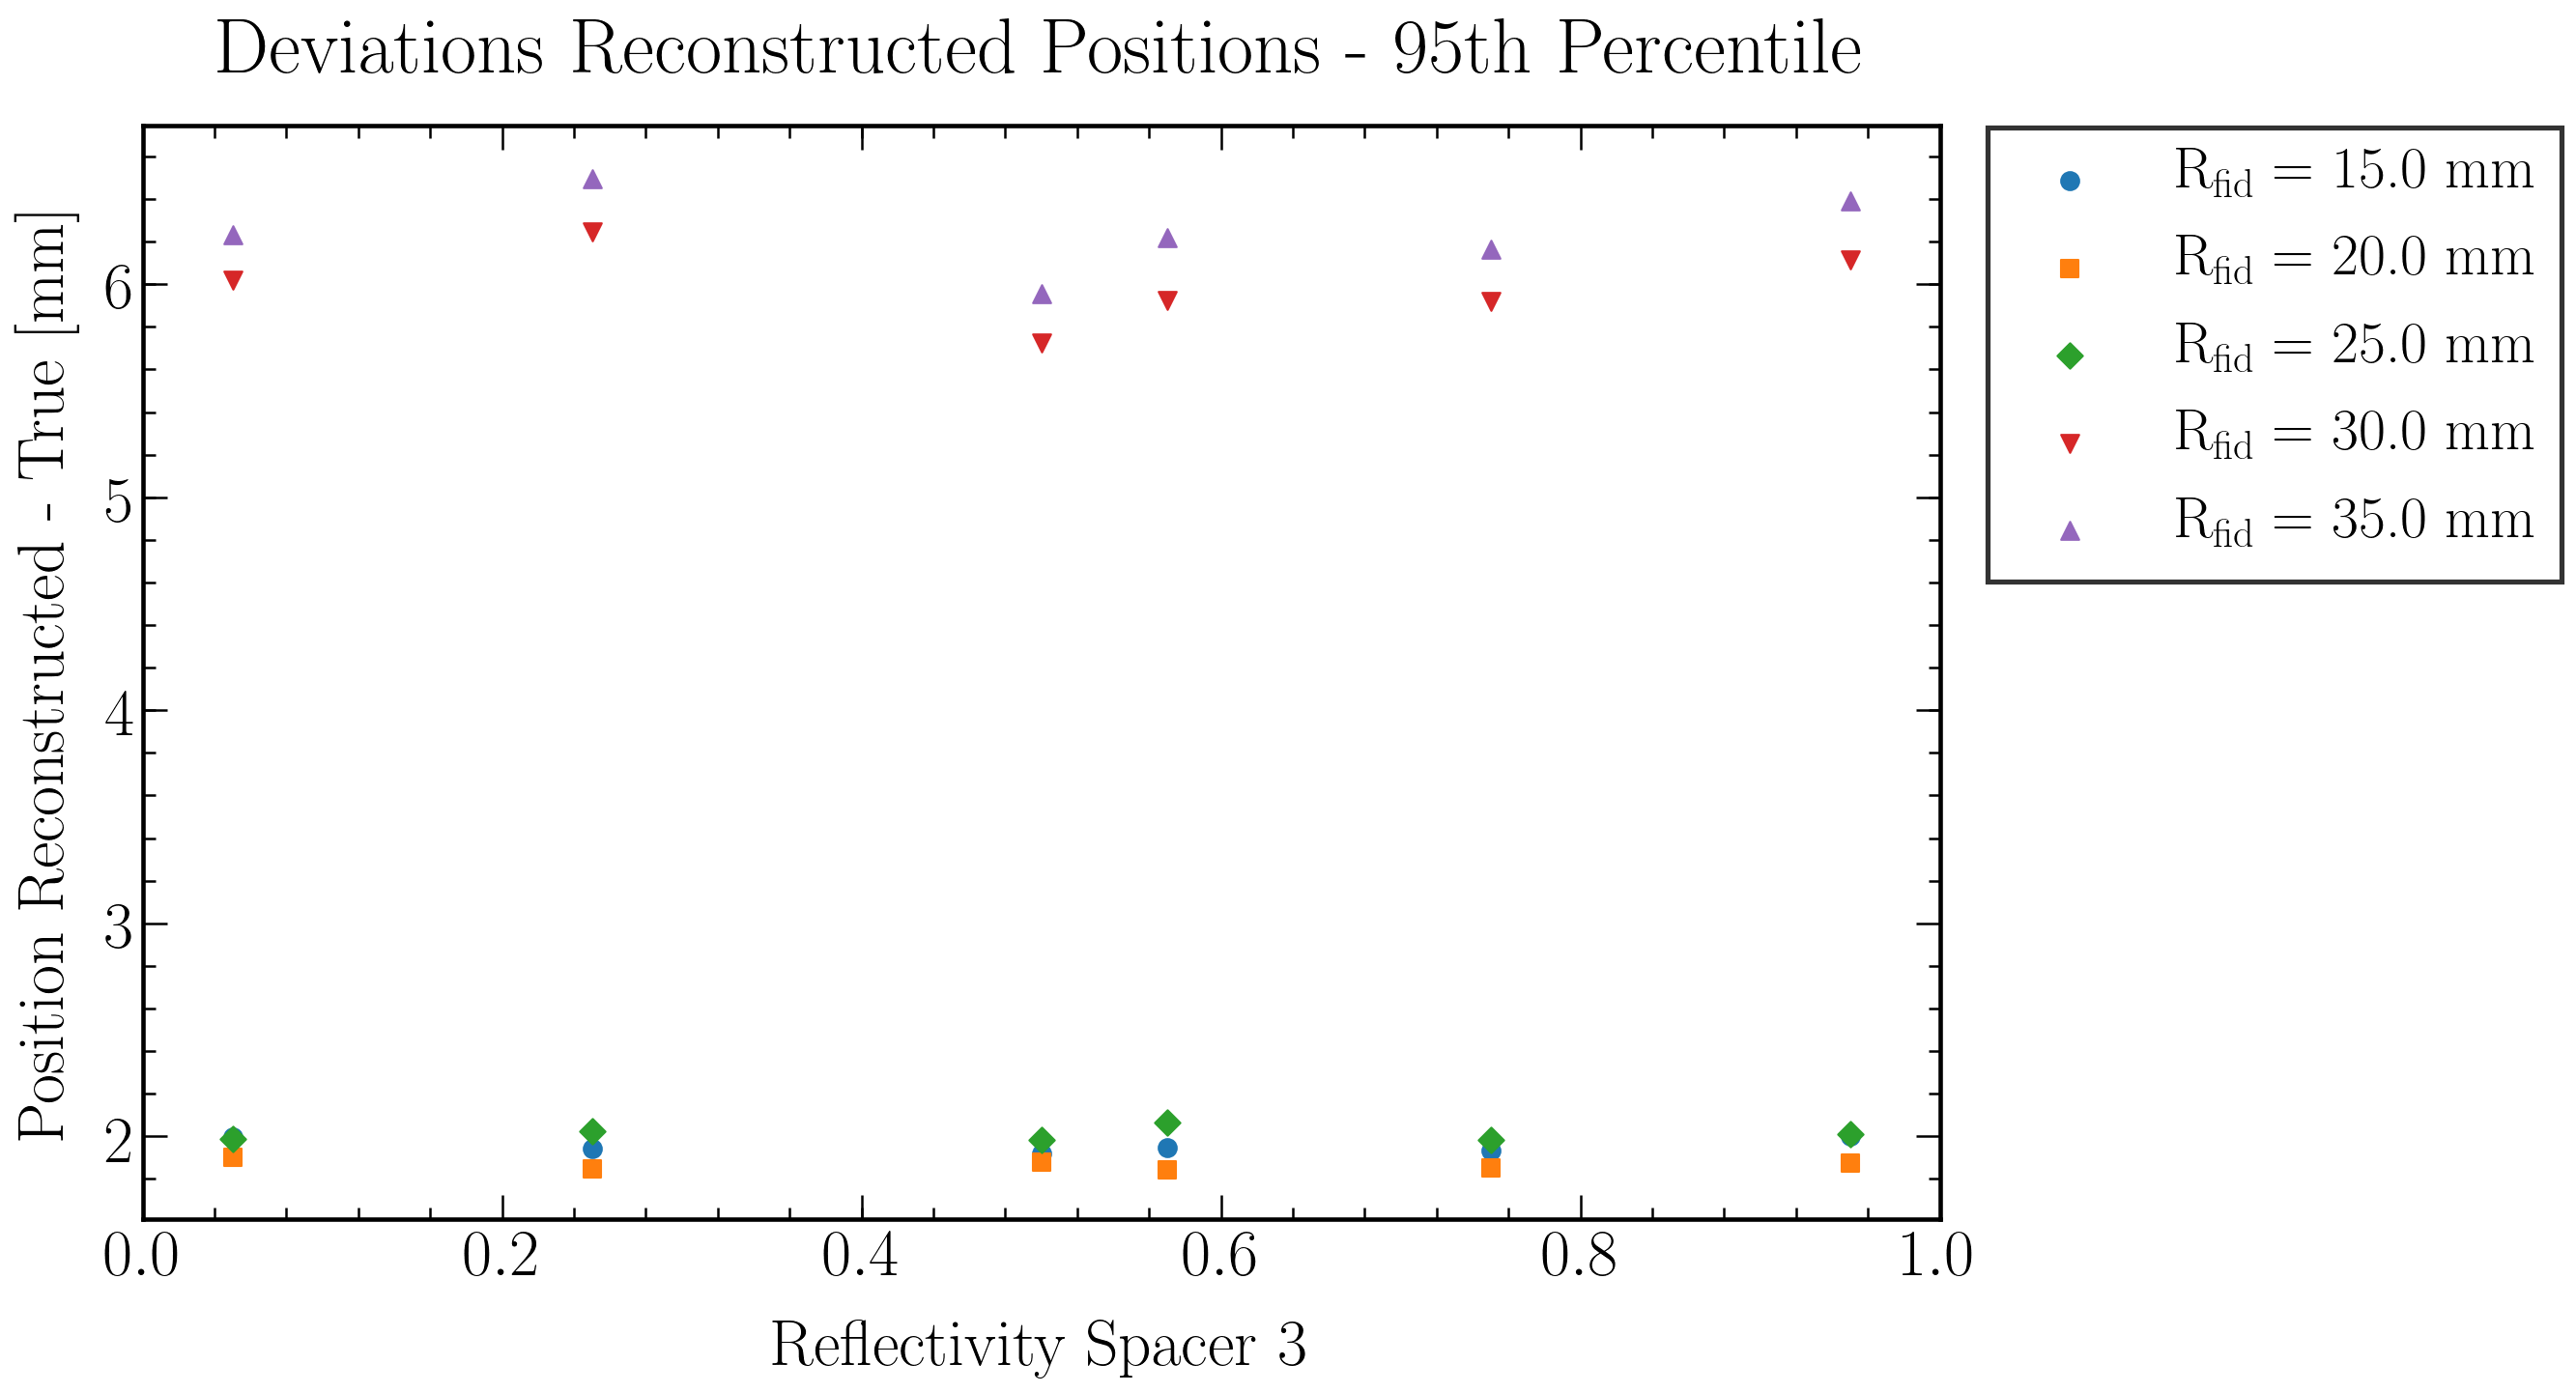

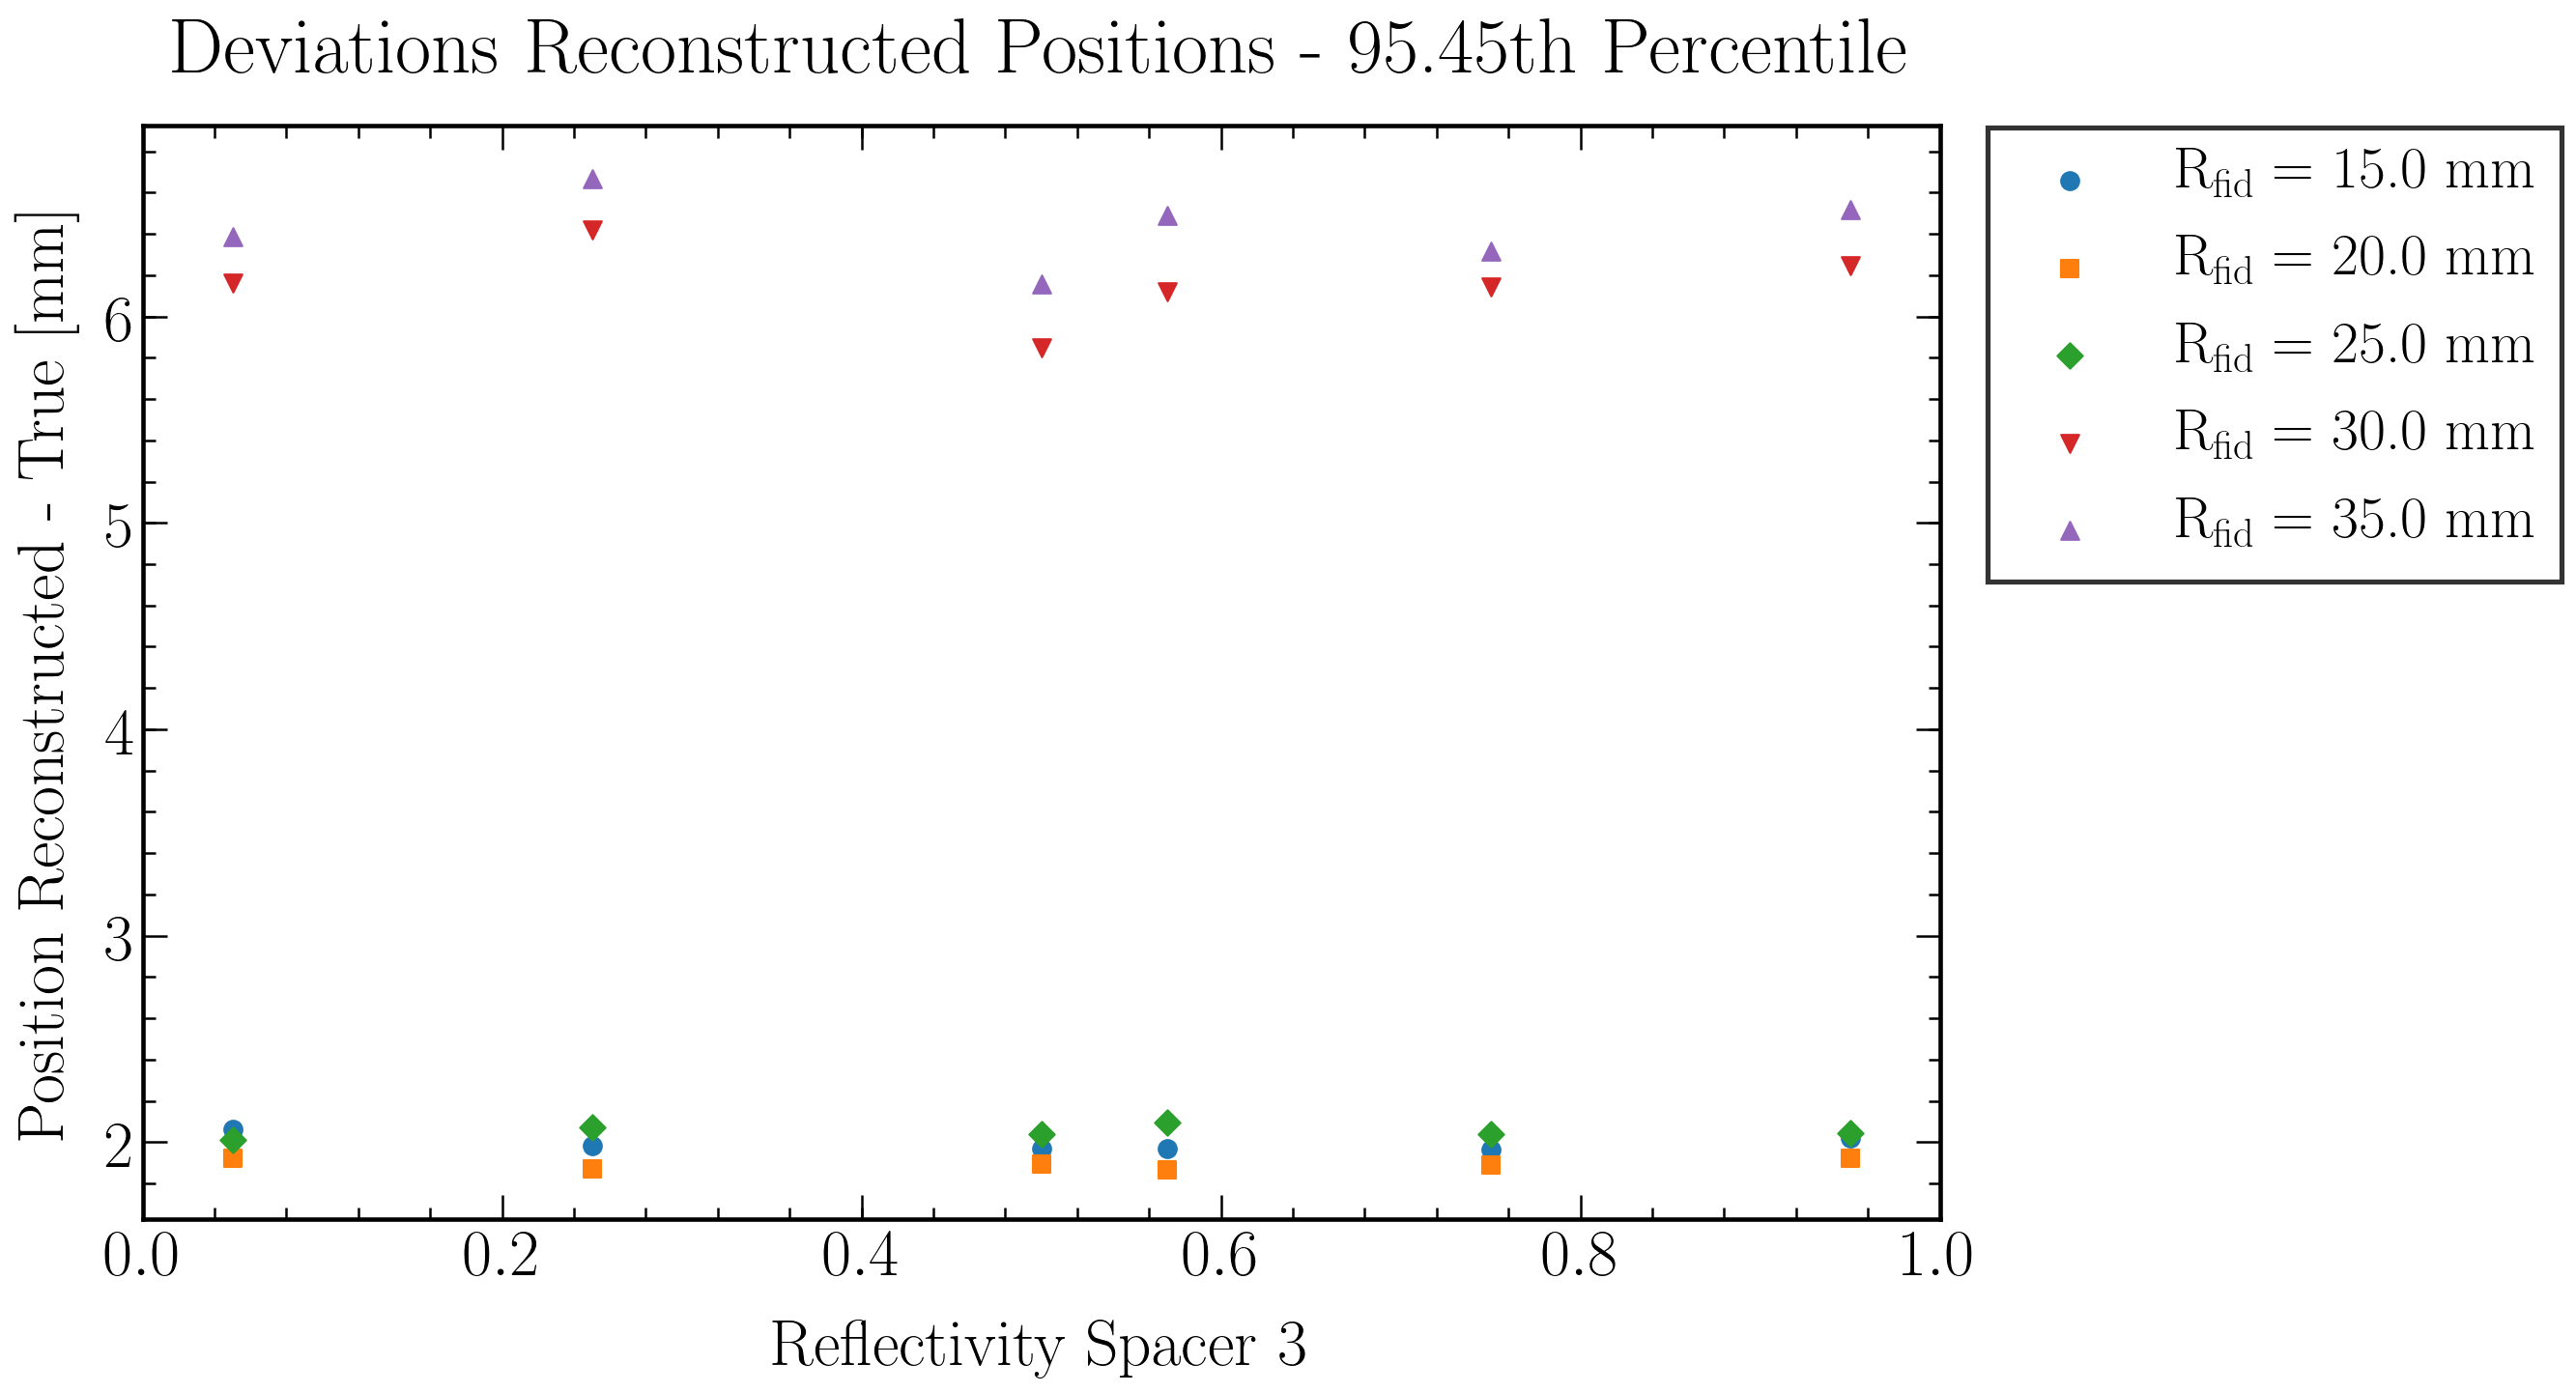

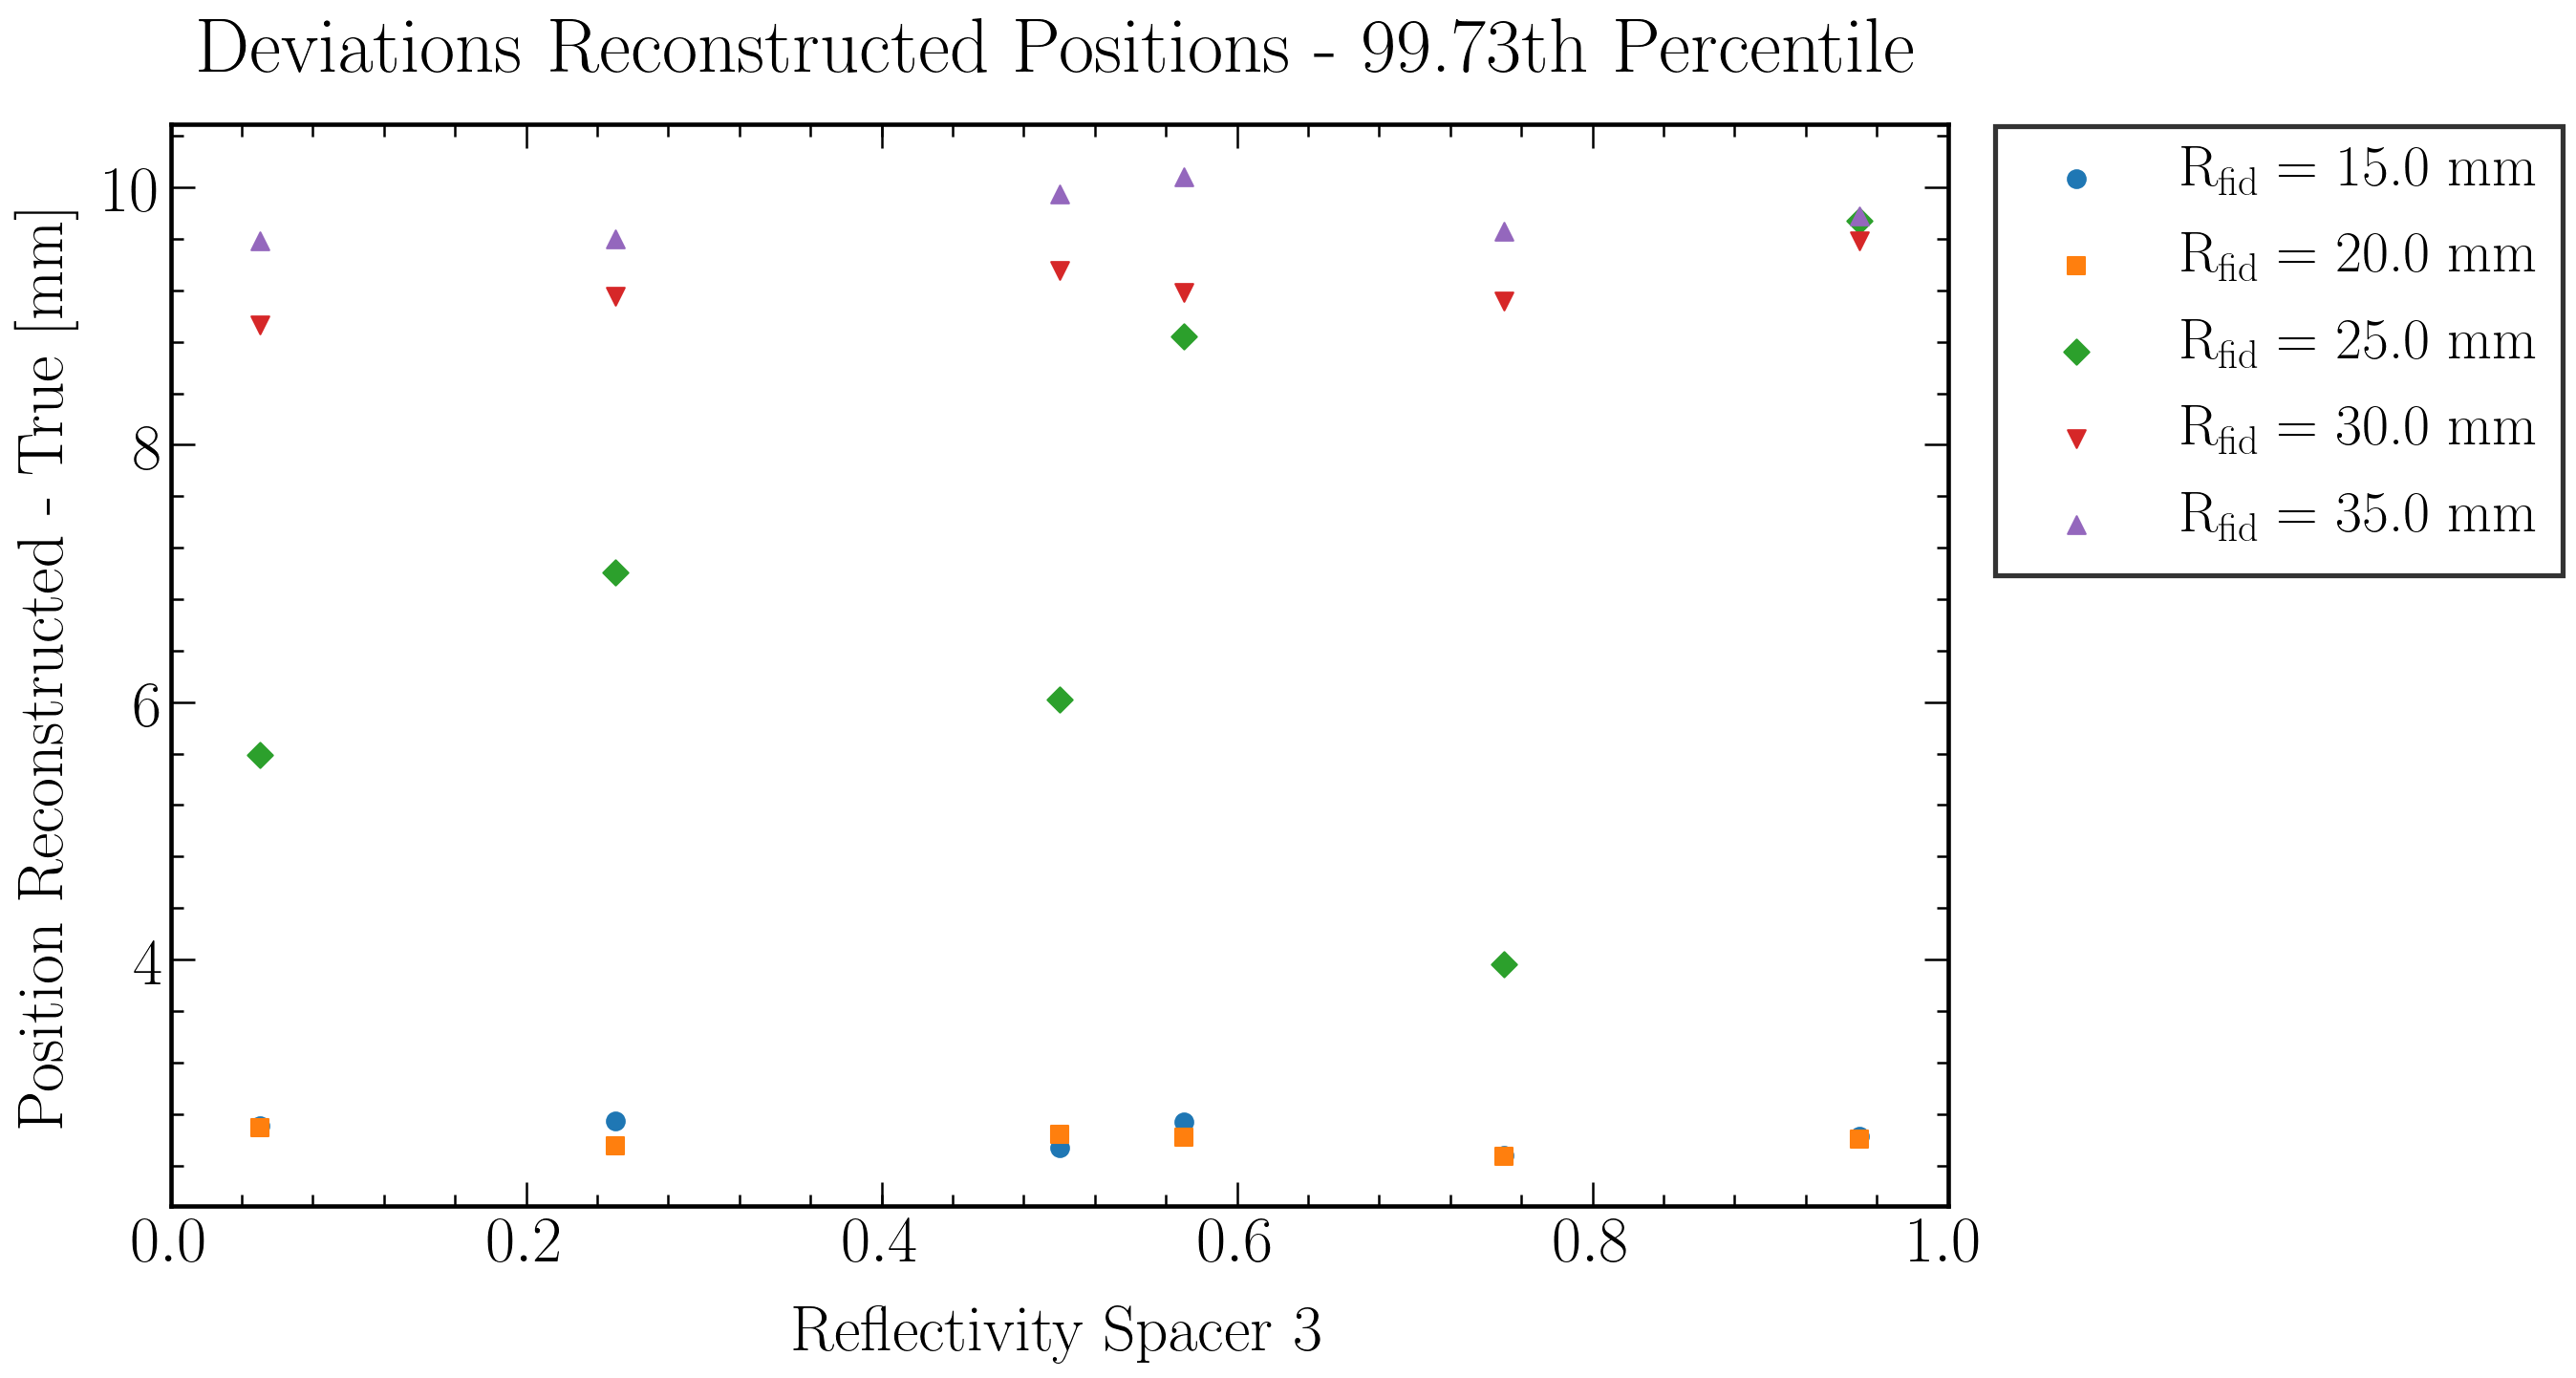

In [19]:
percentile_value_list = [50, 68.27, 95, 95.45, 99.73]

for percentile_value in percentile_value_list:     
    
    #############################################
    ## Set plot styles:
    #############################################

    fig=plt.figure(figsize=(16, 10), dpi=150)

    # Text options
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')

    # Labels
    label_size = 32.5 #25
    label_pad = 13 #10
    title_size = 39 #30
    title_pad = 26 #20

    # Axes Parameters
    axes = plt.gca()
    axes.tick_params(axis='both') 

    # Axes ---> Linewidth
    for axis in ['top','bottom','left','right']:
        axes.spines[axis].set_linewidth(2.2)

    # Axes ---> Ticks
    axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
    plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
    axes.yaxis.set_minor_locator(AutoMinorLocator(5))
    plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
    plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

    # Grid
    #plt.grid(True)

    #############################################
    ## Plot specific settings and plot data
    #############################################

    # Data plot

    ref_list = [0.05, 0.25, 0.50, 0.57, 0.75, 0.95]
    x = ref_list

    rfi = 2
    y = [df_PTFE005['delta_'+str(percentile_value)+'_percentile'][rfi], df_PTFE025['delta_'+str(percentile_value)+'_percentile'][rfi], df_PTFE050['delta_'+str(percentile_value)+'_percentile'][rfi], df_PTFE057['delta_'+str(percentile_value)+'_percentile'][rfi], df_PTFE075['delta_'+str(percentile_value)+'_percentile'][rfi], df_PTFE095['delta_'+str(percentile_value)+'_percentile'][rfi]]
    plt.scatter(x, y, label = 'R$_{\mathrm{fid}} = $ '+str(df_PTFE005['fid'][rfi])+' mm', 
                color = 'C0', marker = 'o', s = 80)

    rfi = 4
    y = [df_PTFE005['delta_'+str(percentile_value)+'_percentile'][rfi], df_PTFE025['delta_'+str(percentile_value)+'_percentile'][rfi], df_PTFE050['delta_'+str(percentile_value)+'_percentile'][rfi], df_PTFE057['delta_'+str(percentile_value)+'_percentile'][rfi], df_PTFE075['delta_'+str(percentile_value)+'_percentile'][rfi], df_PTFE095['delta_'+str(percentile_value)+'_percentile'][rfi]]
    plt.scatter(x, y, label = 'R$_{\mathrm{fid}} = $ '+str(df_PTFE005['fid'][rfi])+' mm', 
                color = 'C1', marker = 's', s = 80)

    rfi = 6
    y = [df_PTFE005['delta_'+str(percentile_value)+'_percentile'][rfi], df_PTFE025['delta_'+str(percentile_value)+'_percentile'][rfi], df_PTFE050['delta_'+str(percentile_value)+'_percentile'][rfi], df_PTFE057['delta_'+str(percentile_value)+'_percentile'][rfi], df_PTFE075['delta_'+str(percentile_value)+'_percentile'][rfi], df_PTFE095['delta_'+str(percentile_value)+'_percentile'][rfi]]
    plt.scatter(x, y, label = 'R$_{\mathrm{fid}} = $ '+str(df_PTFE005['fid'][rfi])+' mm', 
                color = 'C2', marker = 'D', s = 80)

    rfi = 8
    y = [df_PTFE005['delta_'+str(percentile_value)+'_percentile'][rfi], df_PTFE025['delta_'+str(percentile_value)+'_percentile'][rfi], df_PTFE050['delta_'+str(percentile_value)+'_percentile'][rfi], df_PTFE057['delta_'+str(percentile_value)+'_percentile'][rfi], df_PTFE075['delta_'+str(percentile_value)+'_percentile'][rfi], df_PTFE095['delta_'+str(percentile_value)+'_percentile'][rfi]]
    plt.scatter(x, y, label = 'R$_{\mathrm{fid}} = $ '+str(df_PTFE005['fid'][rfi])+' mm', 
                color = 'C3', marker = 'v', s = 80)

    rfi = 10
    y = [df_PTFE005['delta_'+str(percentile_value)+'_percentile'][rfi], df_PTFE025['delta_'+str(percentile_value)+'_percentile'][rfi], df_PTFE050['delta_'+str(percentile_value)+'_percentile'][rfi], df_PTFE057['delta_'+str(percentile_value)+'_percentile'][rfi], df_PTFE075['delta_'+str(percentile_value)+'_percentile'][rfi], df_PTFE095['delta_'+str(percentile_value)+'_percentile'][rfi]]
    plt.scatter(x, y, label = 'R$_{\mathrm{fid}} = $ '+str(df_PTFE005['fid'][rfi])+' mm', 
                color = 'C4', marker = '^', s = 80)


    plt.ylabel('Position Reconstructed - True [mm]', fontsize = label_size, labelpad = label_pad)
    plt.xlabel('Reflectivity Spacer 3', fontsize = label_size, labelpad = label_pad)
    plt.title('Deviations Reconstructed Positions - '+str(percentile_value)+'th Percentile', fontsize = title_size, pad = title_pad)

    plt.xlim(0,1)

    # Legend
    leg = plt.legend(loc=2, bbox_to_anchor=(1.01,1.025), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
    #leg.set_title("Reflectivity Spacer 3", prop = {'size':0.9*label_size})
    for line in leg.get_lines(): # enumerated
        line.set_linewidth(4)
    leg.get_frame().set_linewidth(2.5)

    fig.savefig("Comparison_Spacer3Reflectivity_LRF_ReconstructedPosition_Deviations_"+str(percentile_value)+"Percentiles.png", bbox_inches = "tight")
    plt.show()